In [1]:
##### Import packages
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Other packages
from memory_reduction_script import reduce_mem_usage_sd as mr # I'm using a memory reduction script to reduce DataFrame memory size
from sklearn.impute import SimpleImputer

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
##### Functions

# Create labels on charts
def autolabel(plot):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center',
                       fontsize = 18,
                       xytext = (0, 9), 
                       textcoords = 'offset points') 
        
def countplot(column, values = True):
    plt.figure(figsize=(35, 10))
    count = df[column].dropna().value_counts()[:15]
    plot = sns.barplot(count.index, count.values)
    plt.title(f'{column} variability', fontsize = 18)
    max_value = max(df[column].value_counts())
    plot.set(ylim = (None,(max_value+max_value*0.1)), ylabel = None, yticklabels = [])
    plot.tick_params(left=False)
    if max([len(str(i)) for i in count.index]) >= 6:
        plt.xticks(rotation=90, fontsize = 16)
    else:
        plt.xticks(fontsize = 16)
    if values == True:
        autolabel(plot)
    plt.tight_layout()
    plt.show()

In [3]:
##### Import data
# Dataset has a major size: 13647309 rows x 48 columns. 
# I'm reducing memory with safe downcast function. Then, I restart the kernel and re-uploading it with 'memred' version to avoid memory crashes.

# Check the csv's path before running it
# Choose between 'Reducing memory' or 'Upload dataset with memory reduction'

action_1 = 'Reducing memory'
action_2 = 'Upload dataset with memory reduction'

select = action_2

if select == 'Reducing memory':
    data = pd.read_csv('train_ver2.csv.zip',dtype={"sexo":str,
                                                                                    "ind_nuevo":str,
                                                                                    "ult_fec_cli_1t":str,
                                                                                    "indext":str})

    data = mr(data, verbose = False)
    data.to_pickle('data_memred.pkl')
    
elif select == 'Upload dataset with memory reduction':
    df = pd.read_pickle('data_memred.pkl')

In [4]:
##### Brief statistic of the dataset
# Using safe downcast function, we reduce datatframe memory usage to 1gb only.

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int32  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              object 
 8   antiguedad             object 
 9   indrel                 float16
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float16
 19  cod_prov               float16
 20  nomprov                object 
 21  ind_actividad_cliente  float16
 22  renta           

,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,13619575.0,13619574.0,13553718.0,13619575.0,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,13631246.0,13631246.0,1.364731e+07
mean,8.349042e+05,NaN,NaN,NaN,NaN,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,NaN,NaN,1.279162e-01
std,4.315650e+05,0.0,0.0,0.0,0.0,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,0.0,0.0,3.339965e-01
min,1.588900e+04,1.0,1.0,1.0,0.0,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
25%,4.528130e+05,1.0,1.0,15.0,0.0,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
50%,9.318930e+05,1.0,1.0,28.0,0.0,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
75%,1.199286e+06,1.0,1.0,35.0,1.0,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
max,1.553689e+06,99.0,1.0,52.0,1.0,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.000000e+00


################## ind_empleado ##################


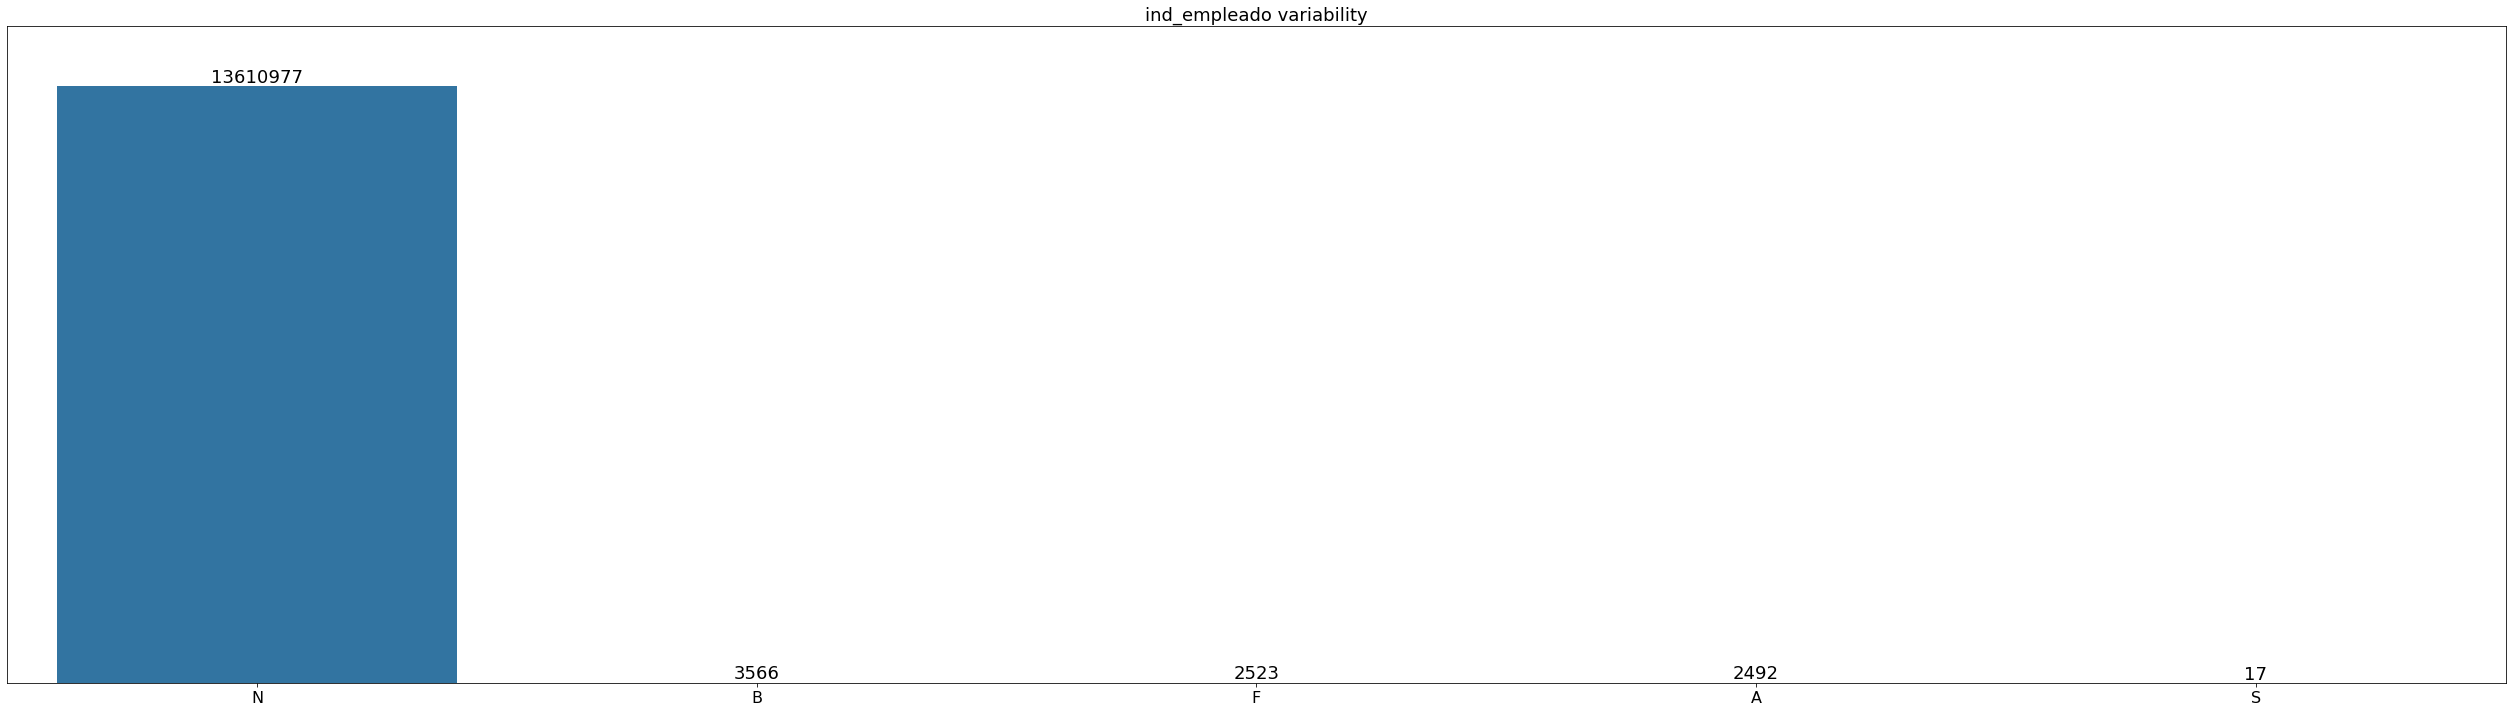

###################### sexo ######################


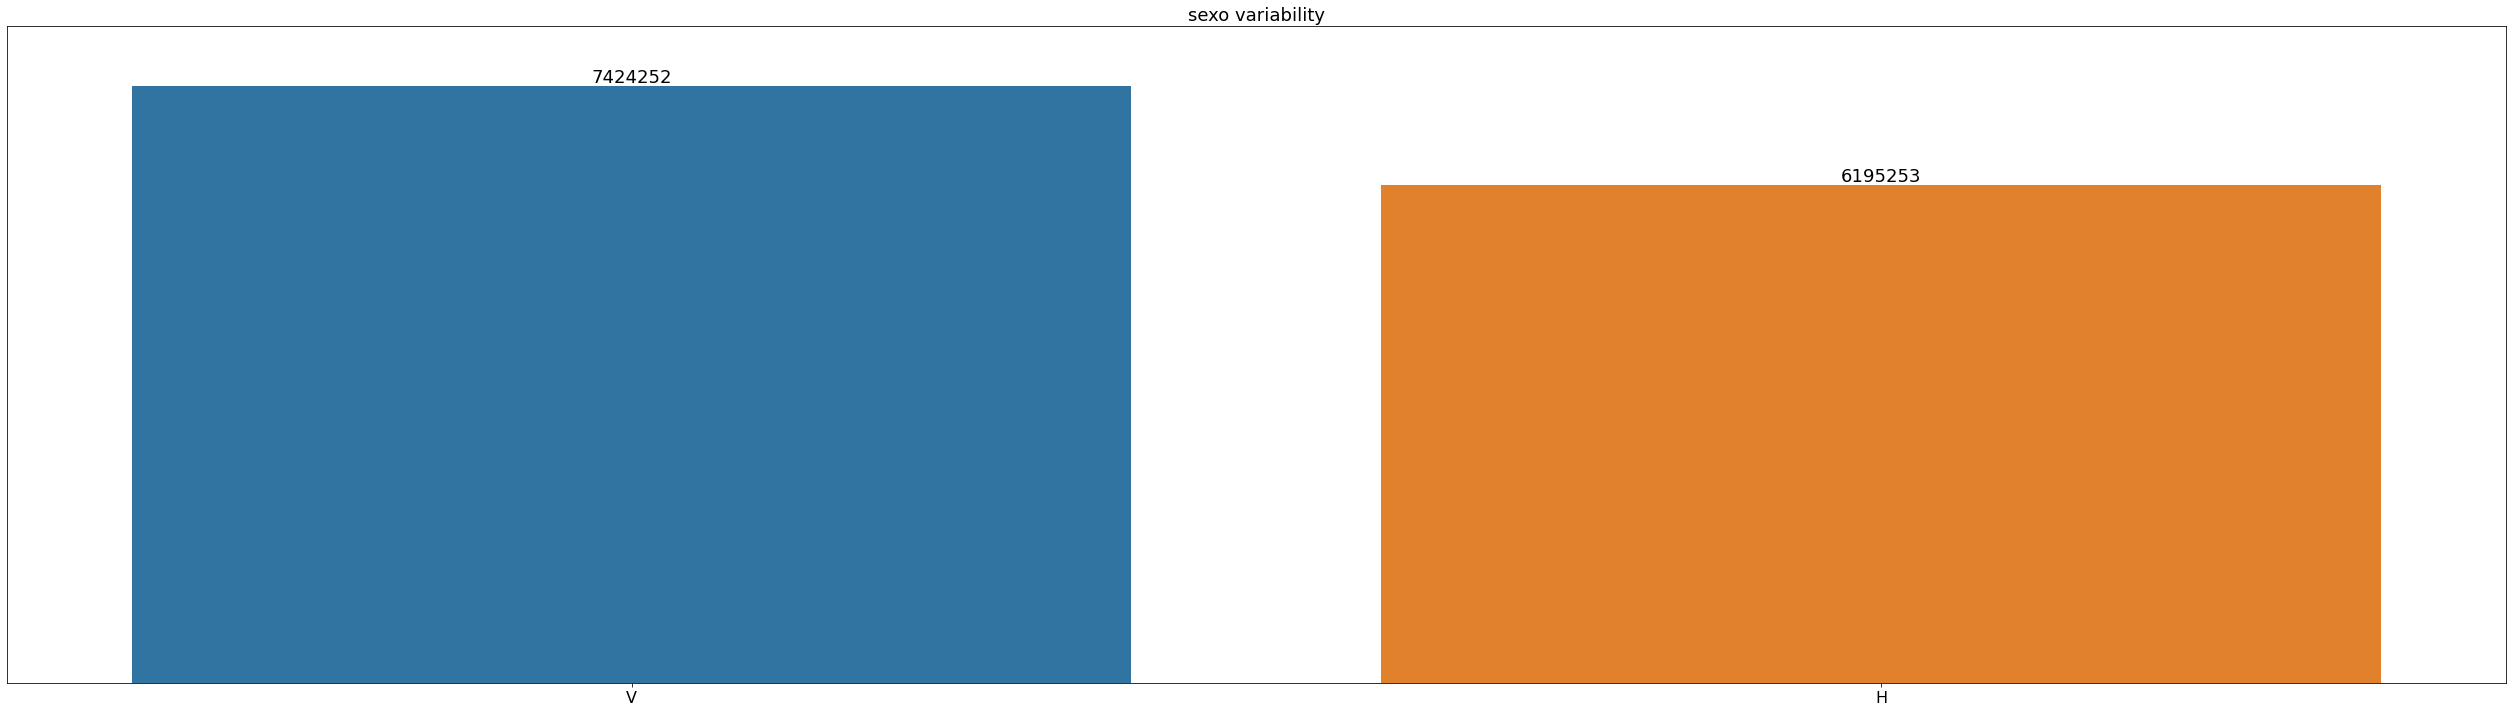

###################### age #######################


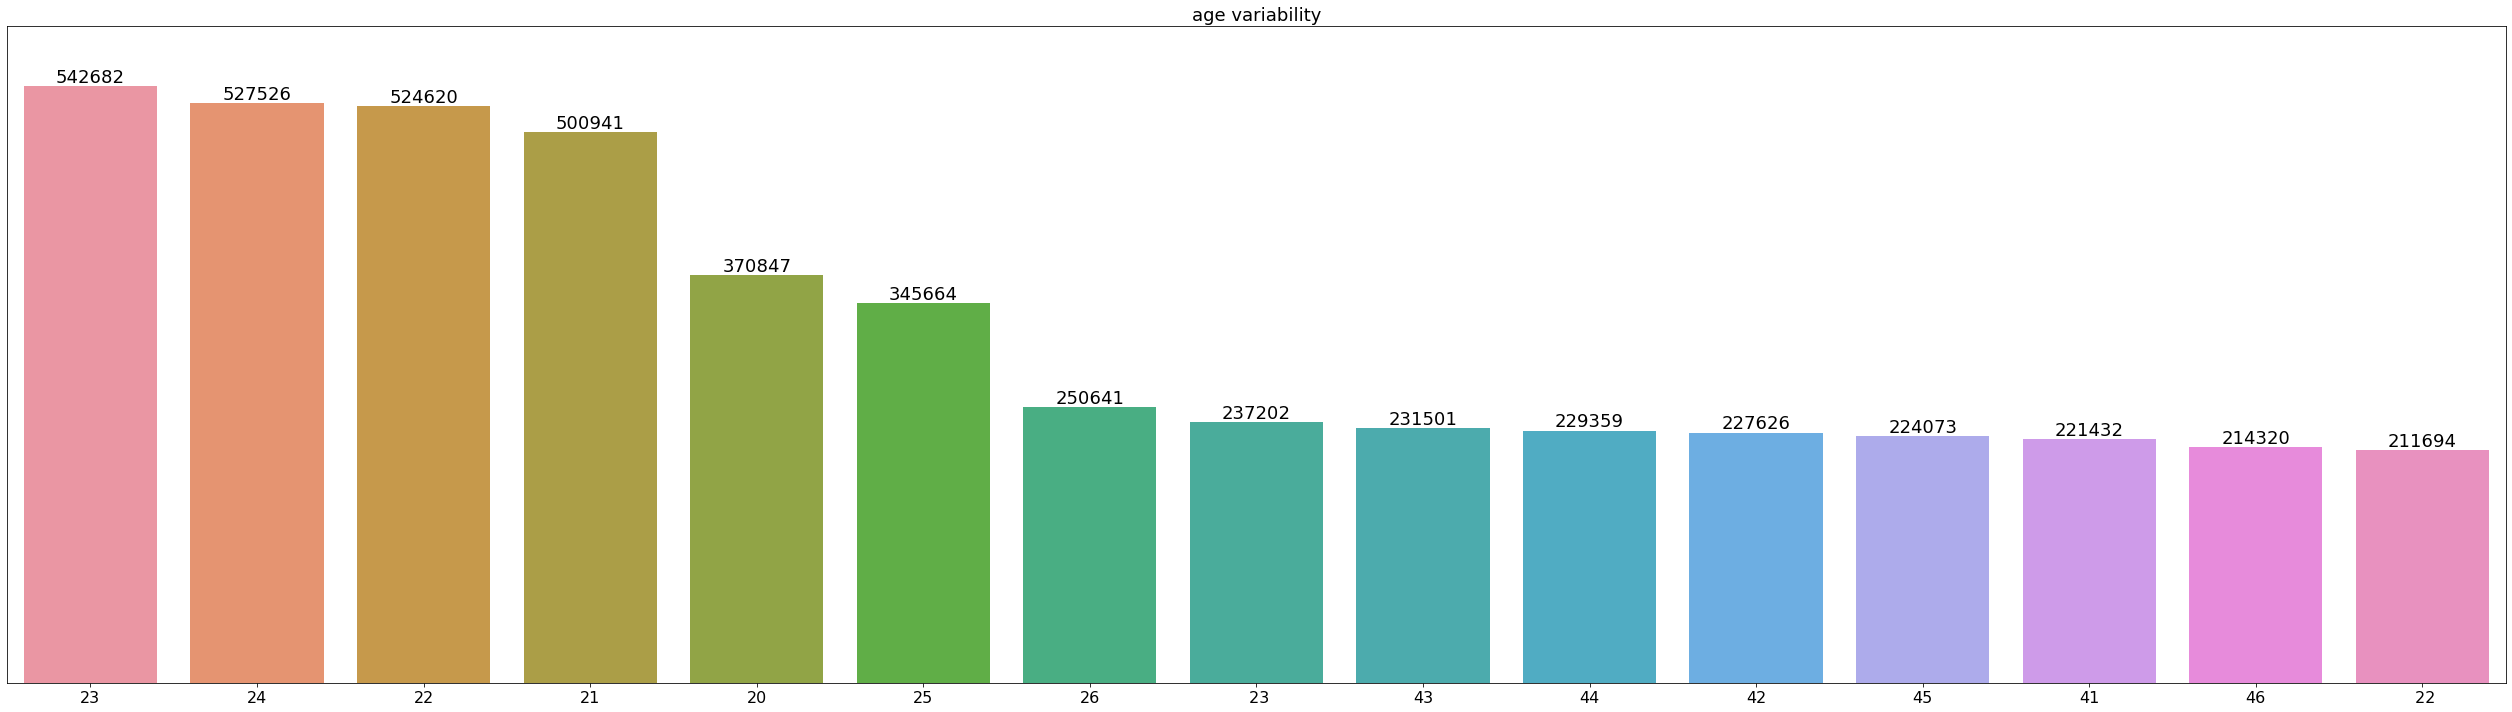

################### ind_nuevo ####################


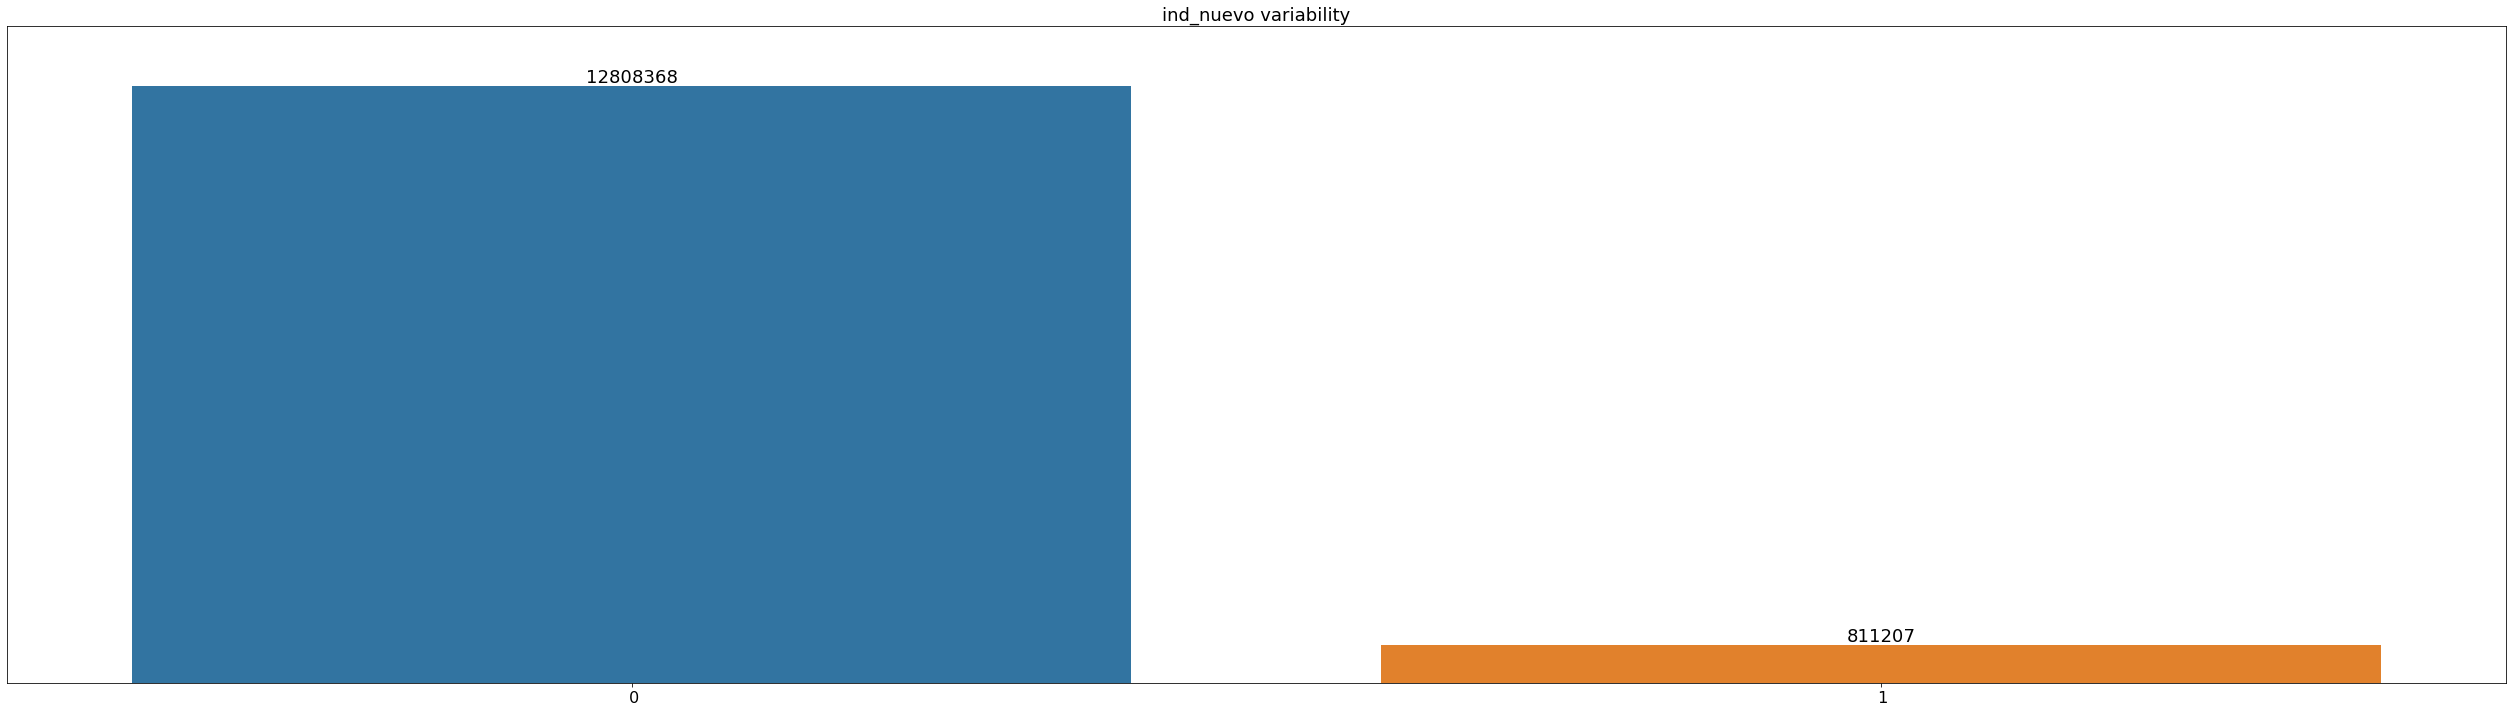

################### antiguedad ###################


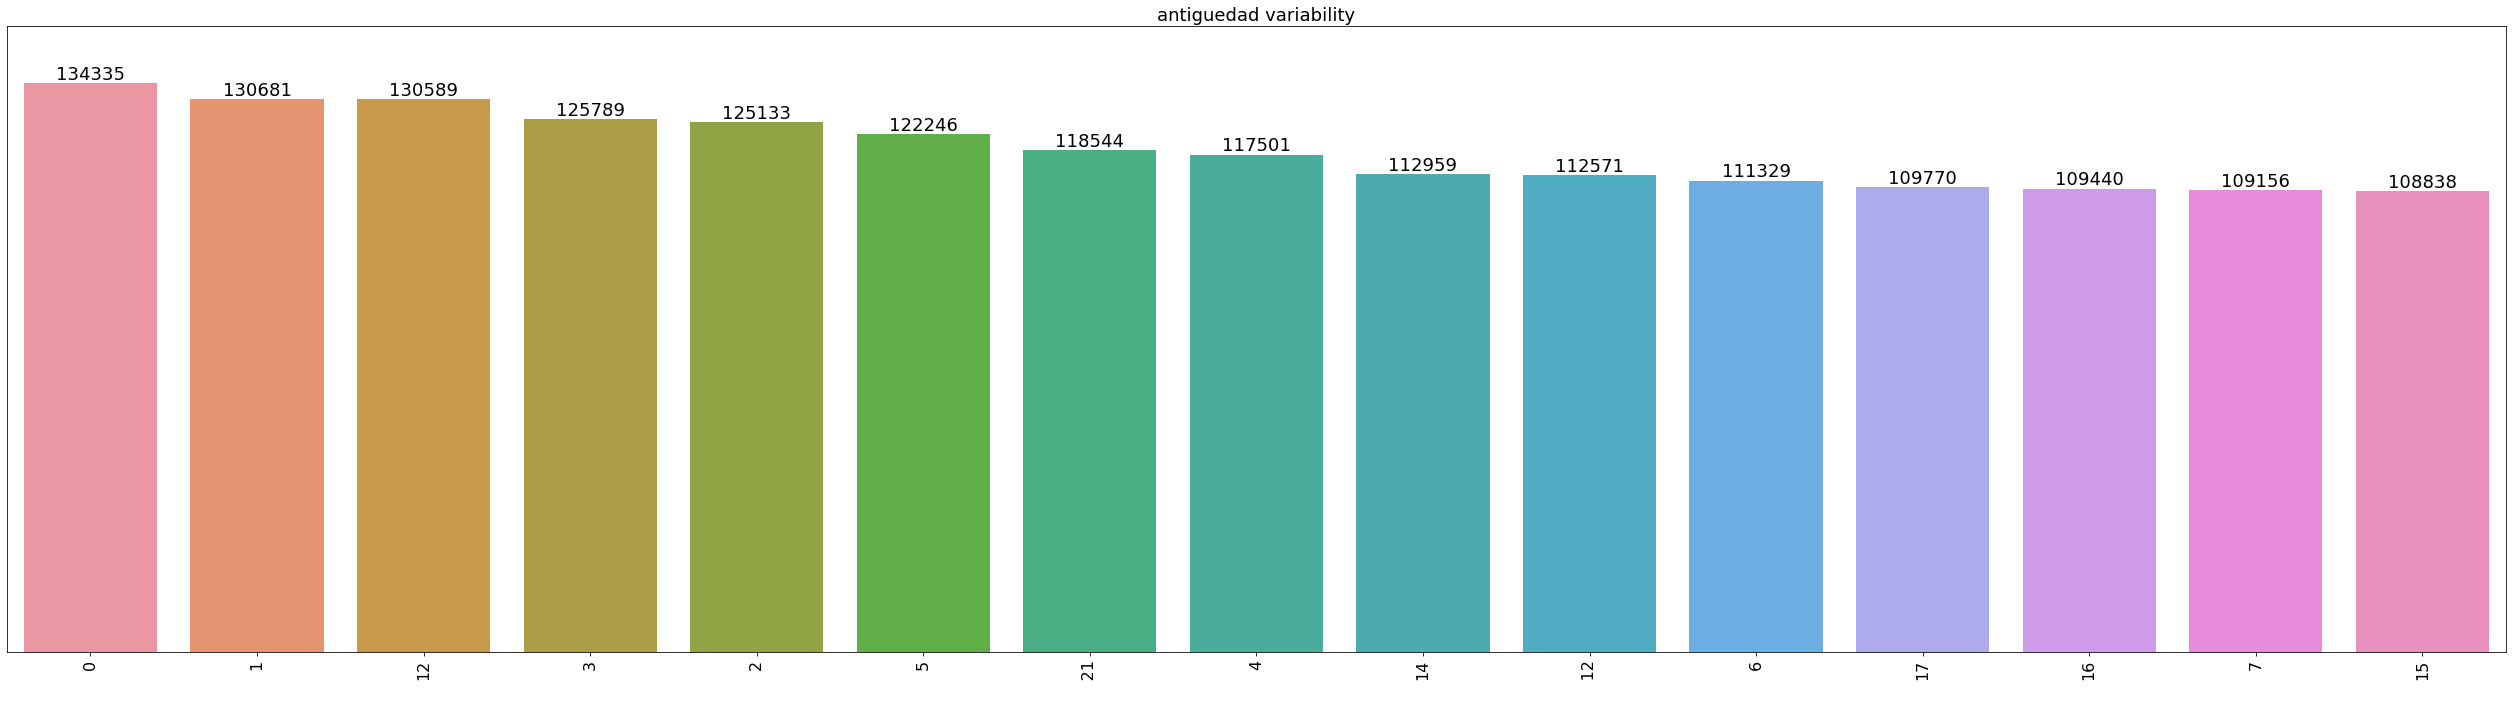

##################### indrel #####################


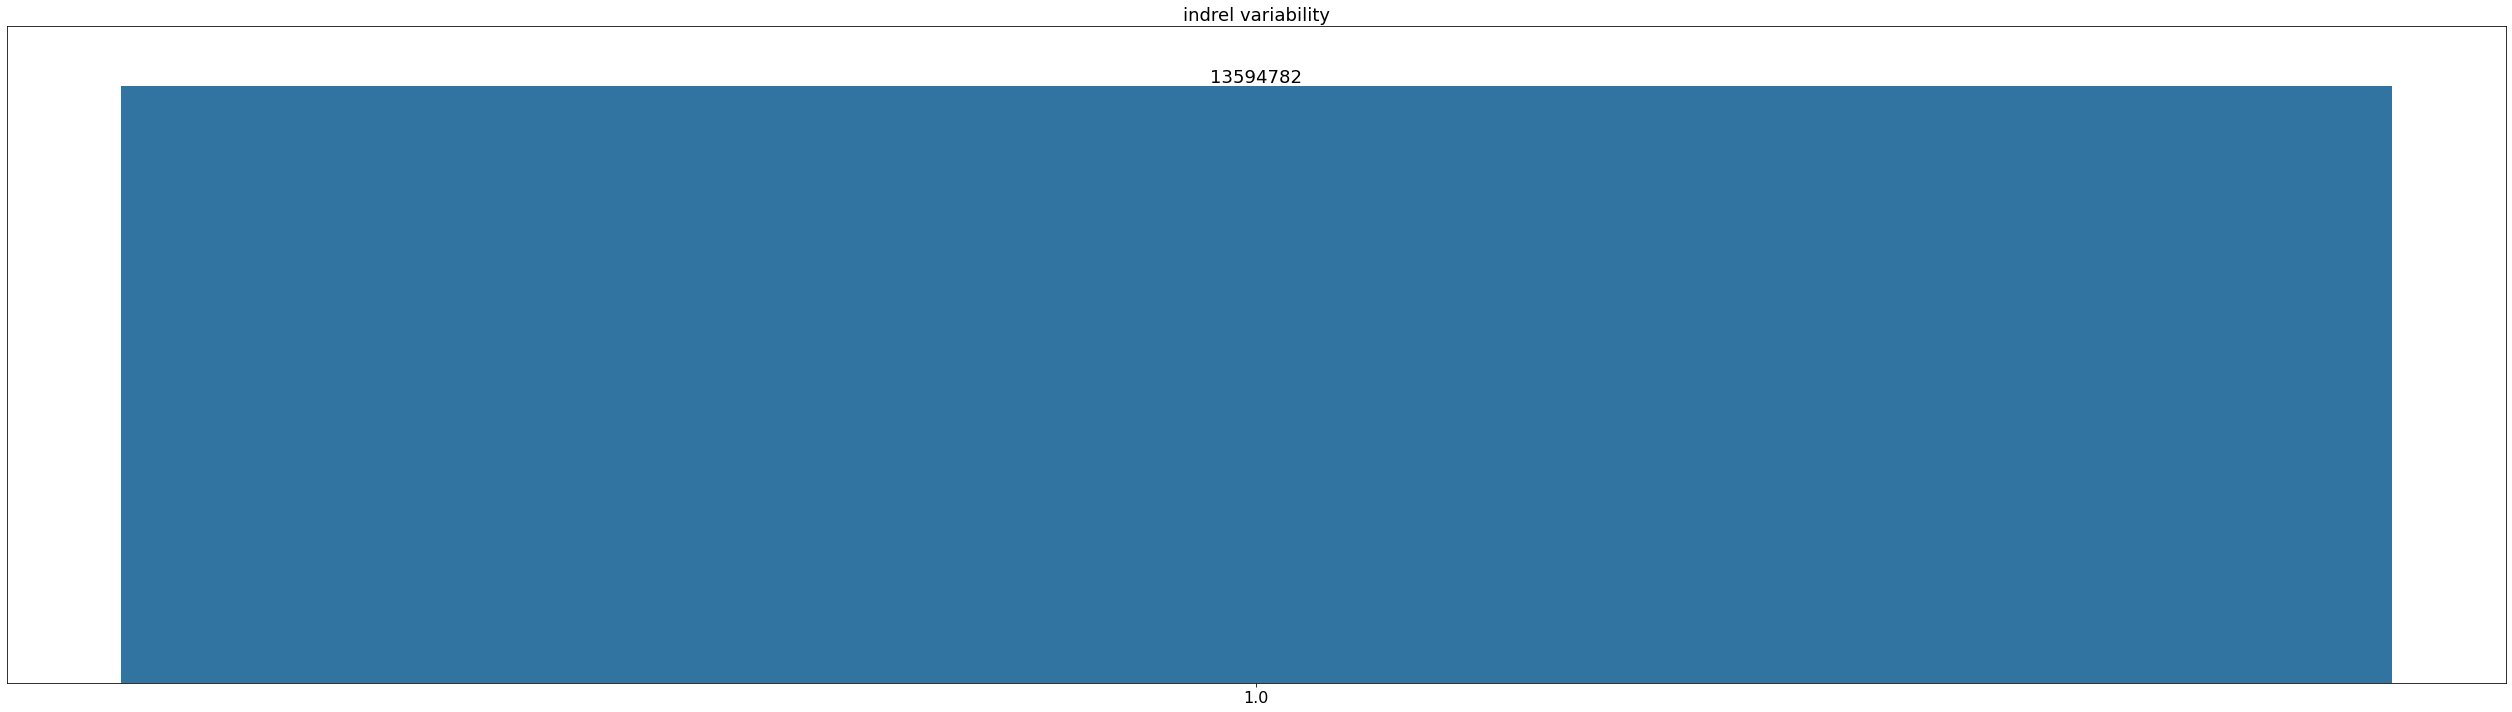

################# ult_fec_cli_1t #################


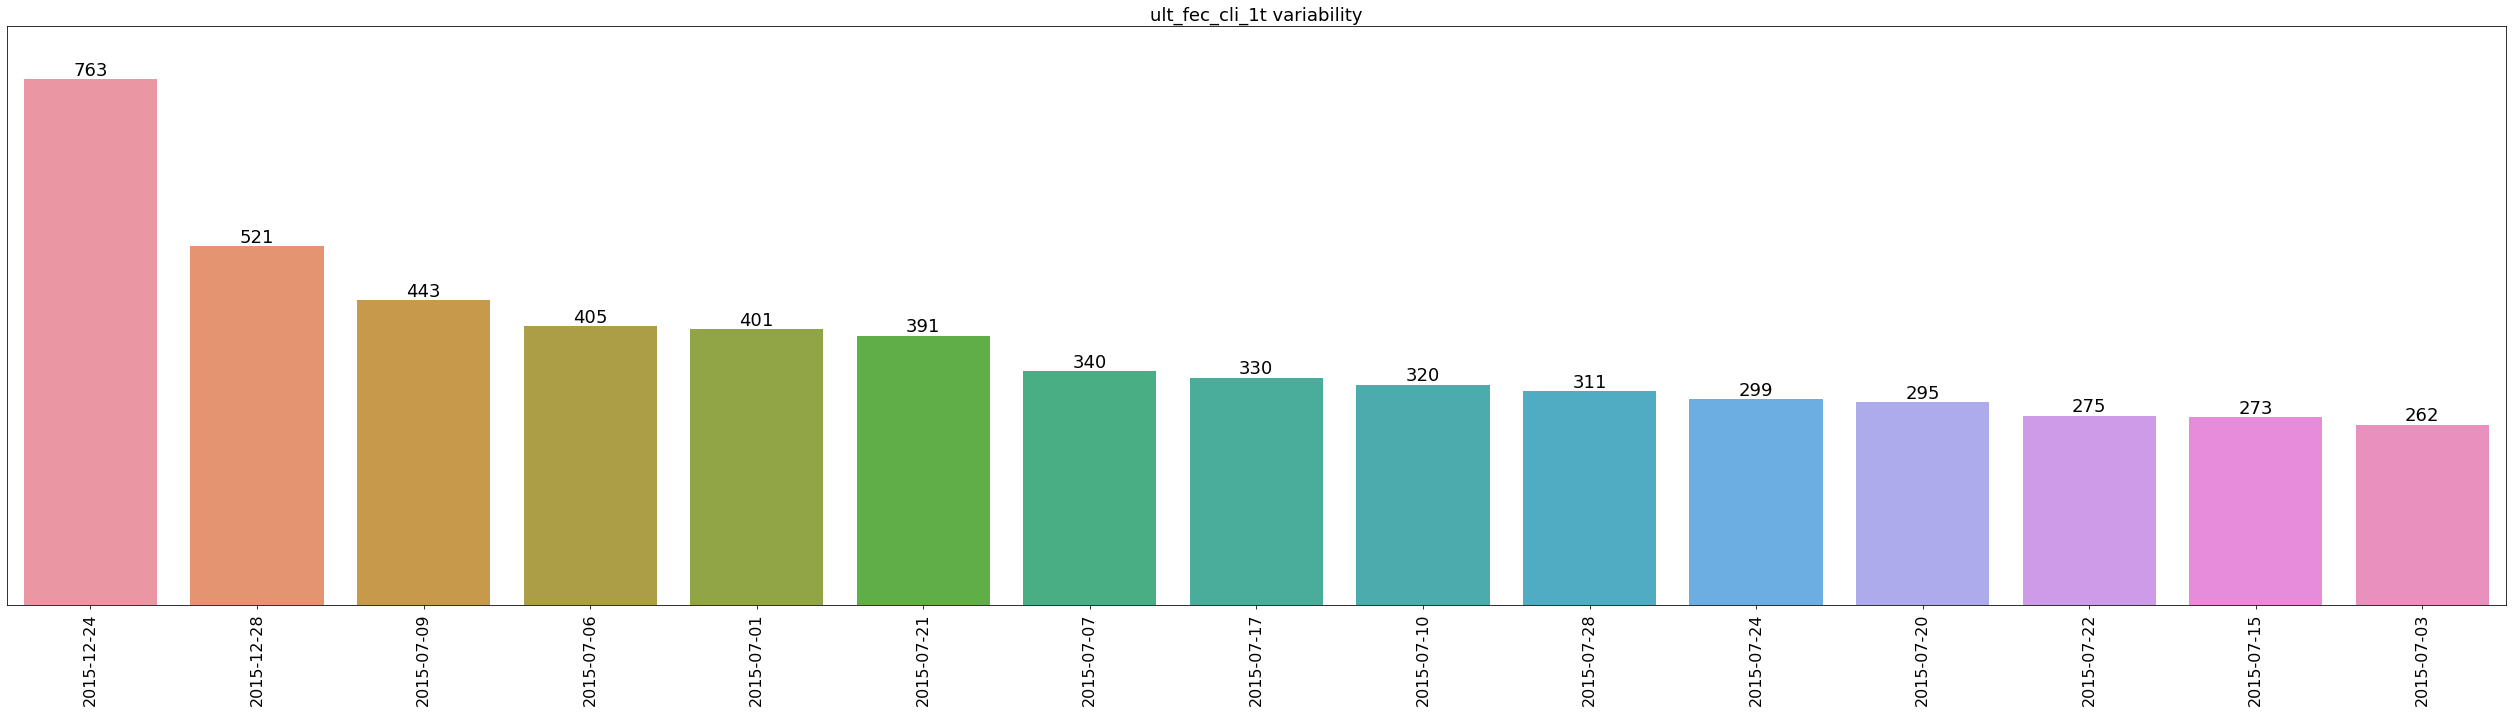

################## indrel_1mes ###################


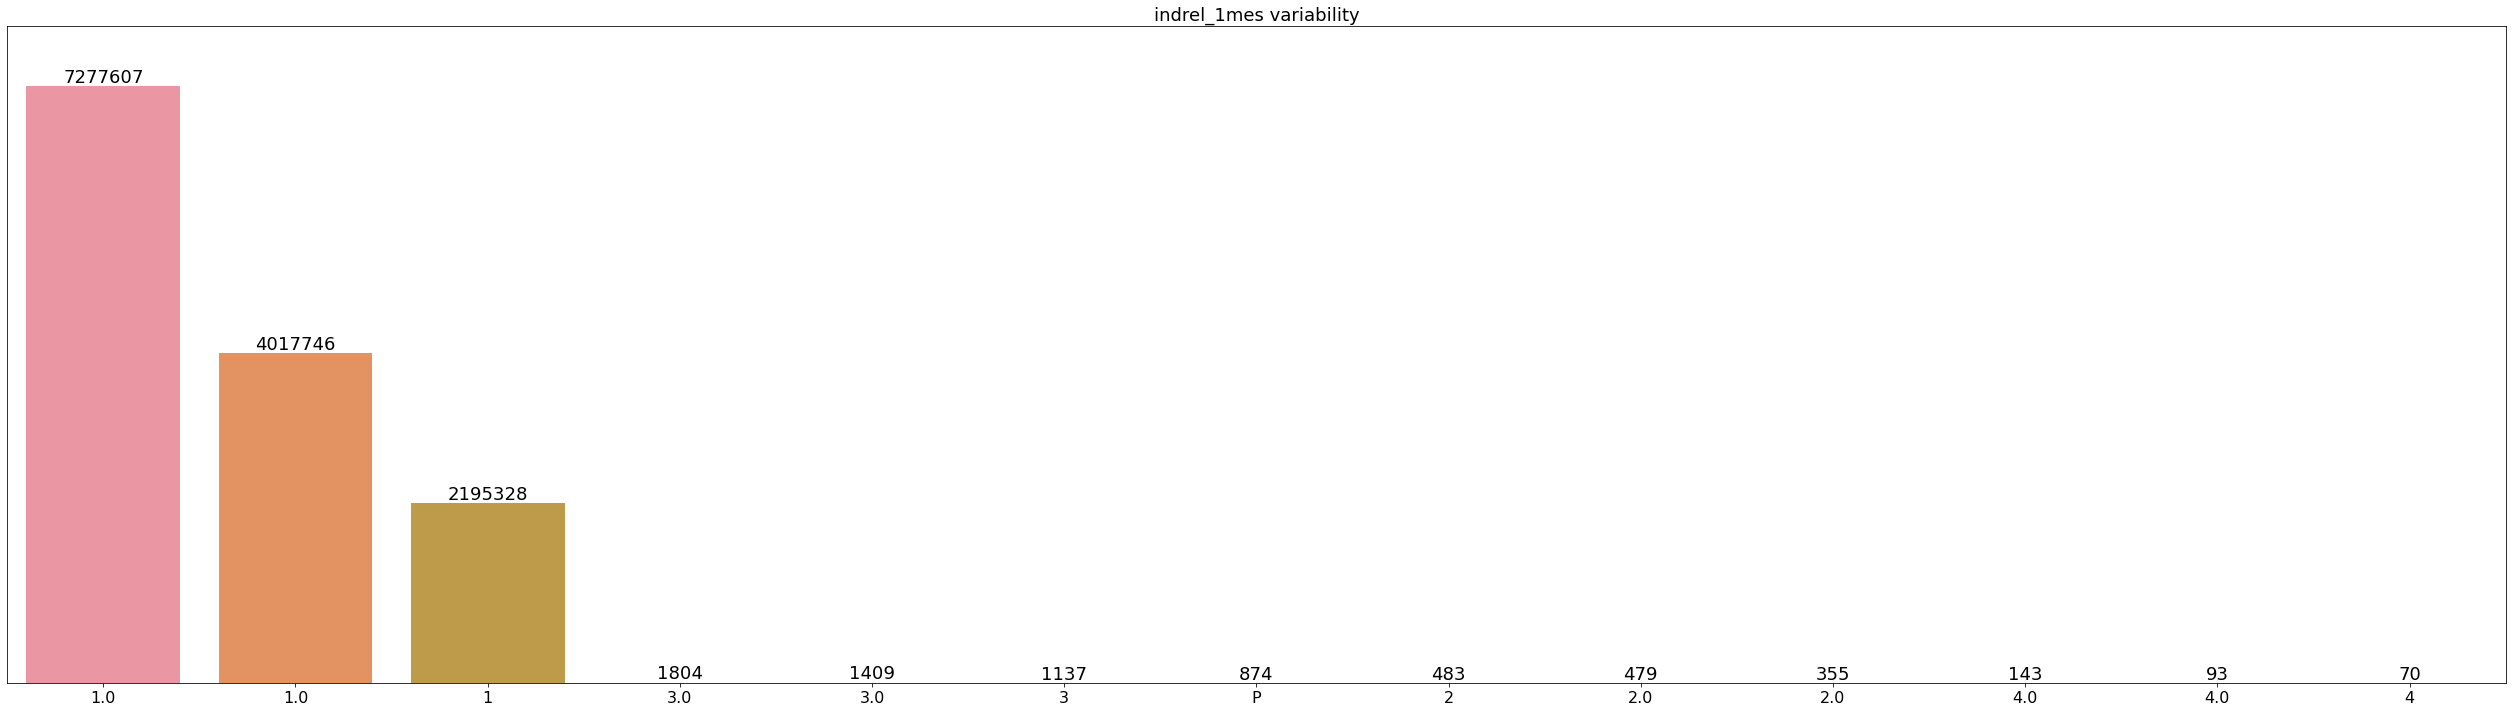

################## tiprel_1mes ###################


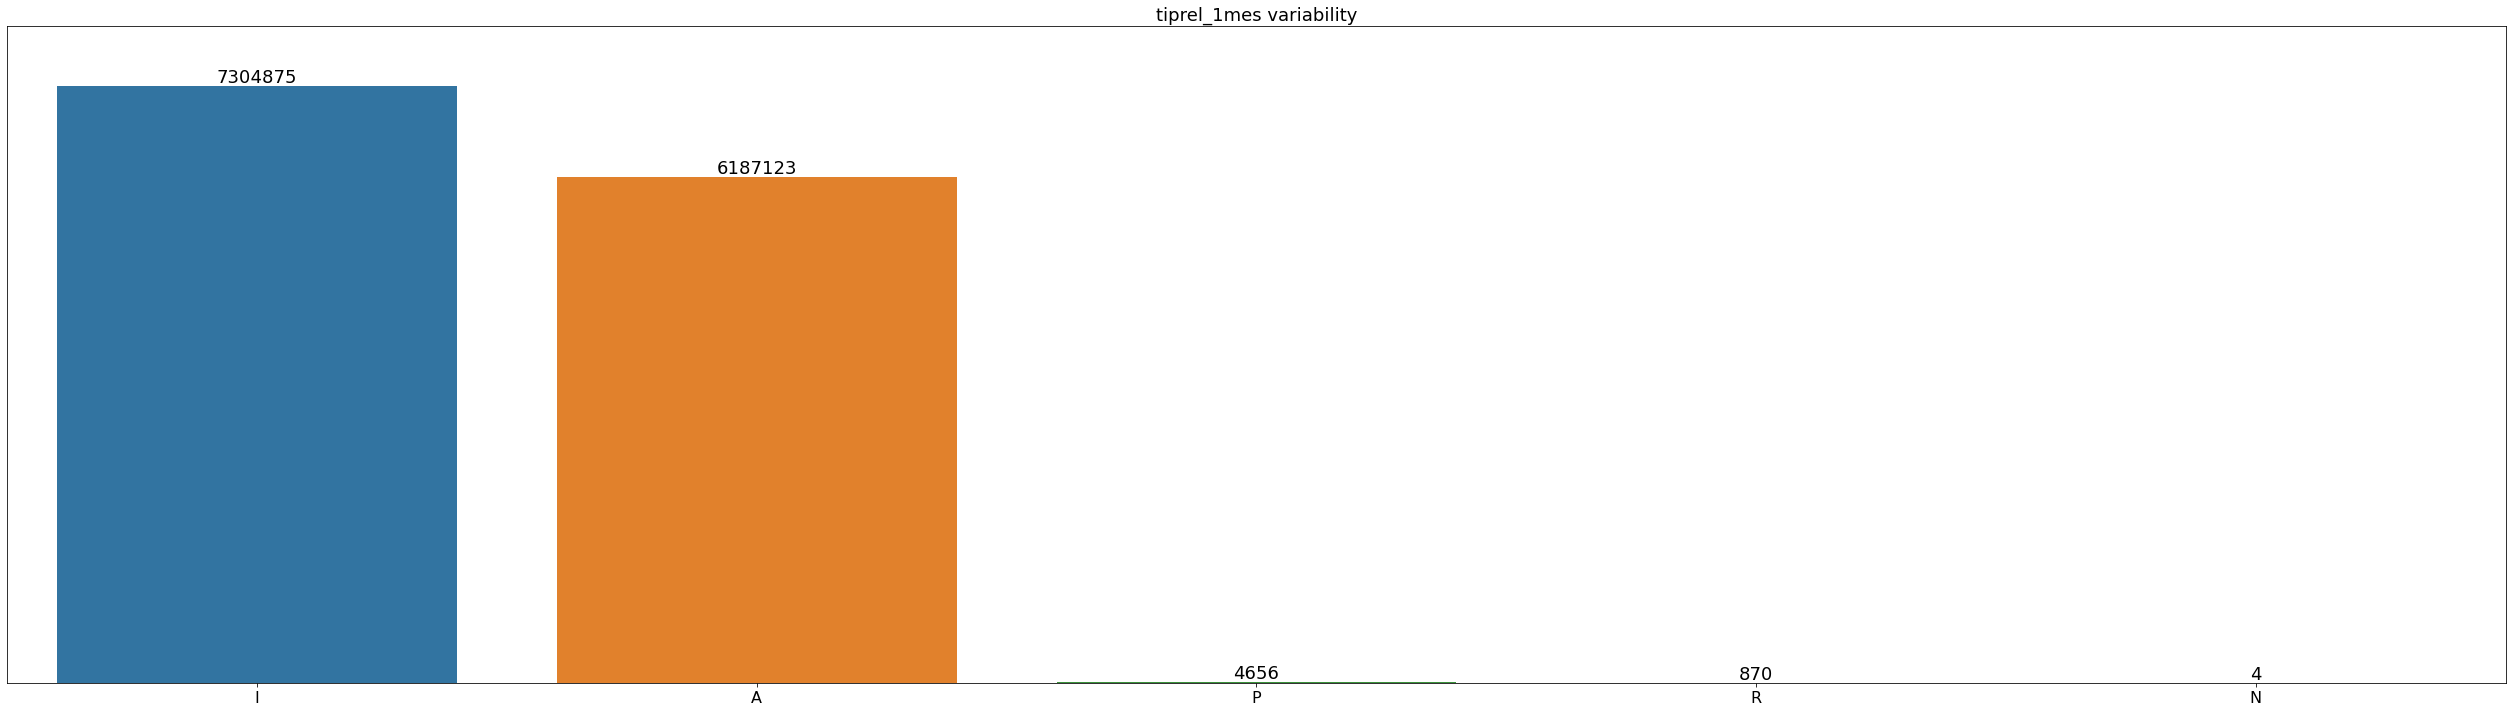

#################### indresi #####################


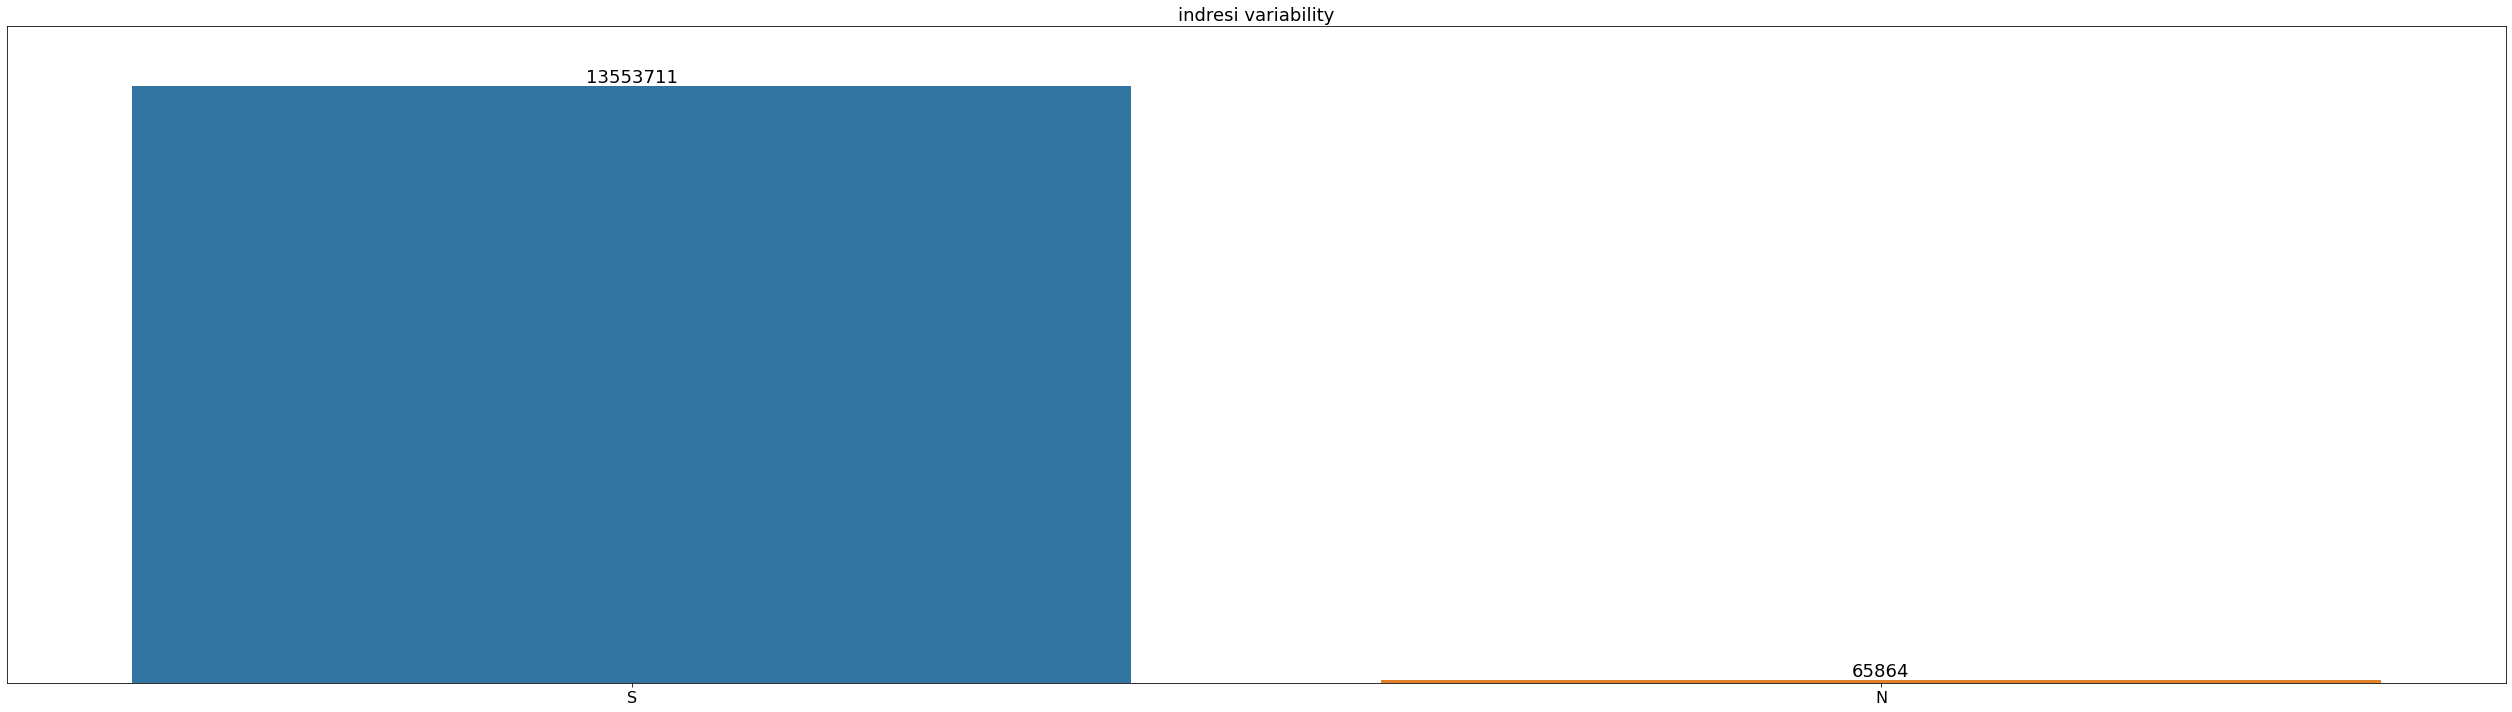

##################### indext #####################


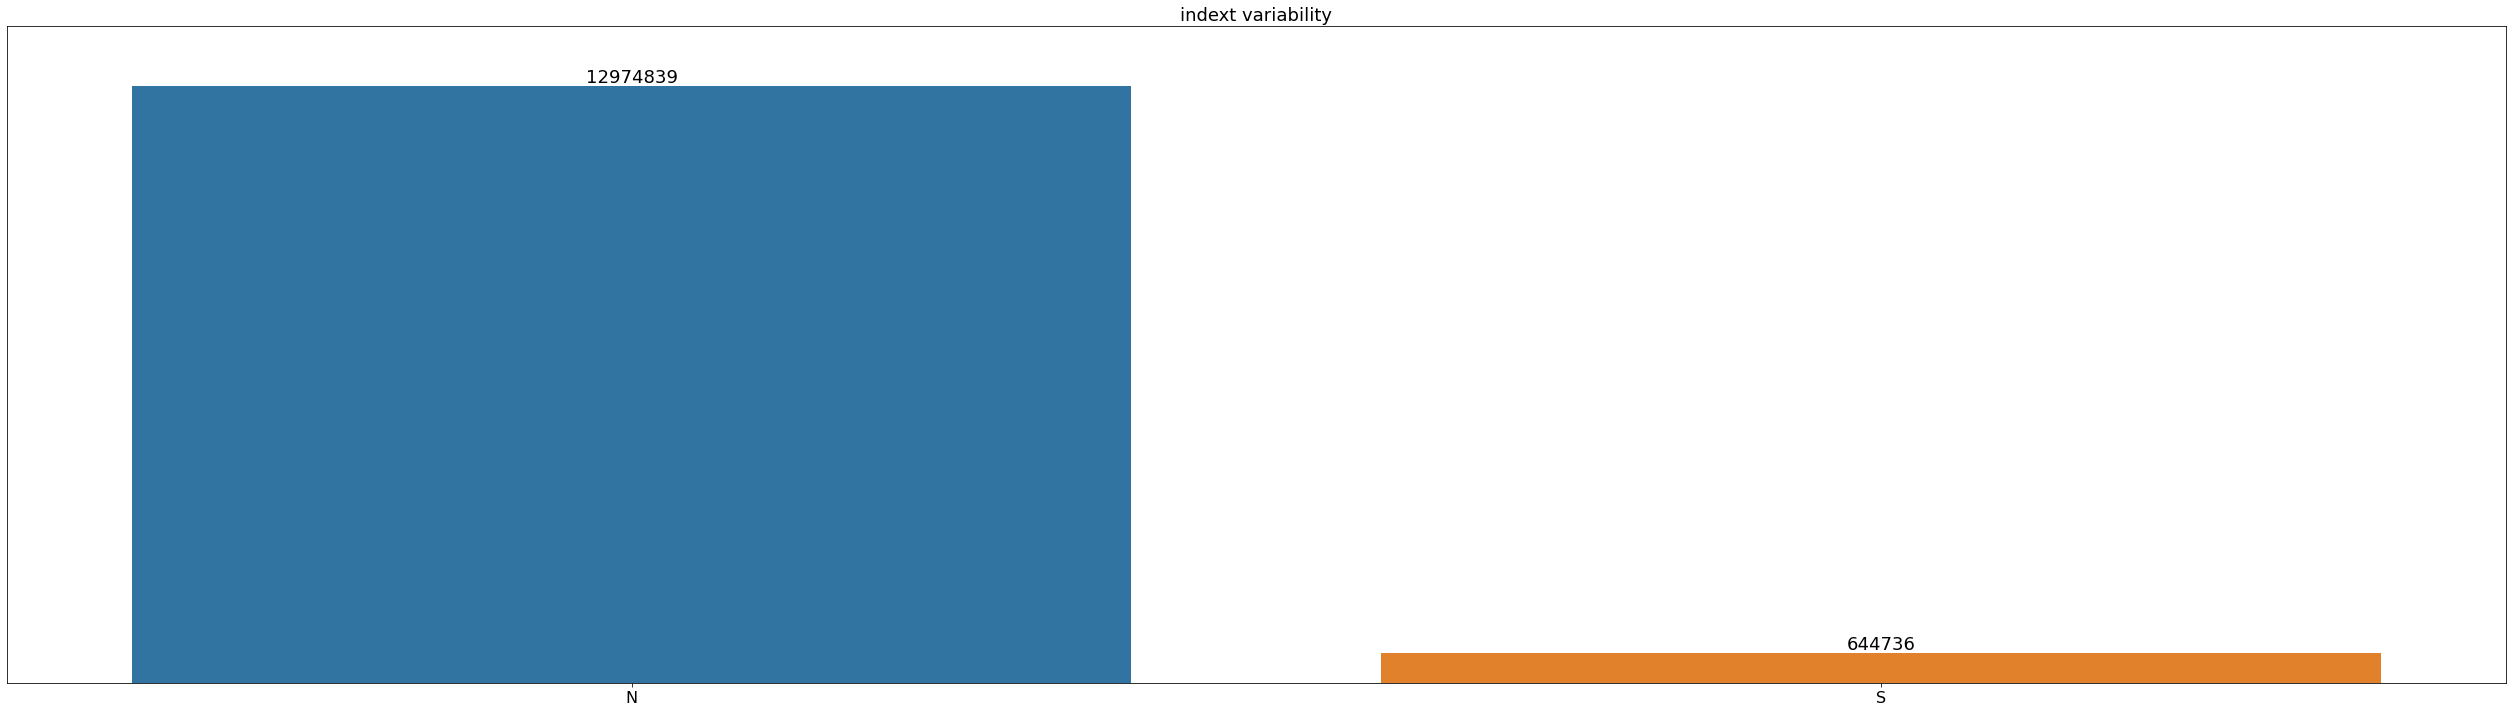

#################### conyuemp ####################


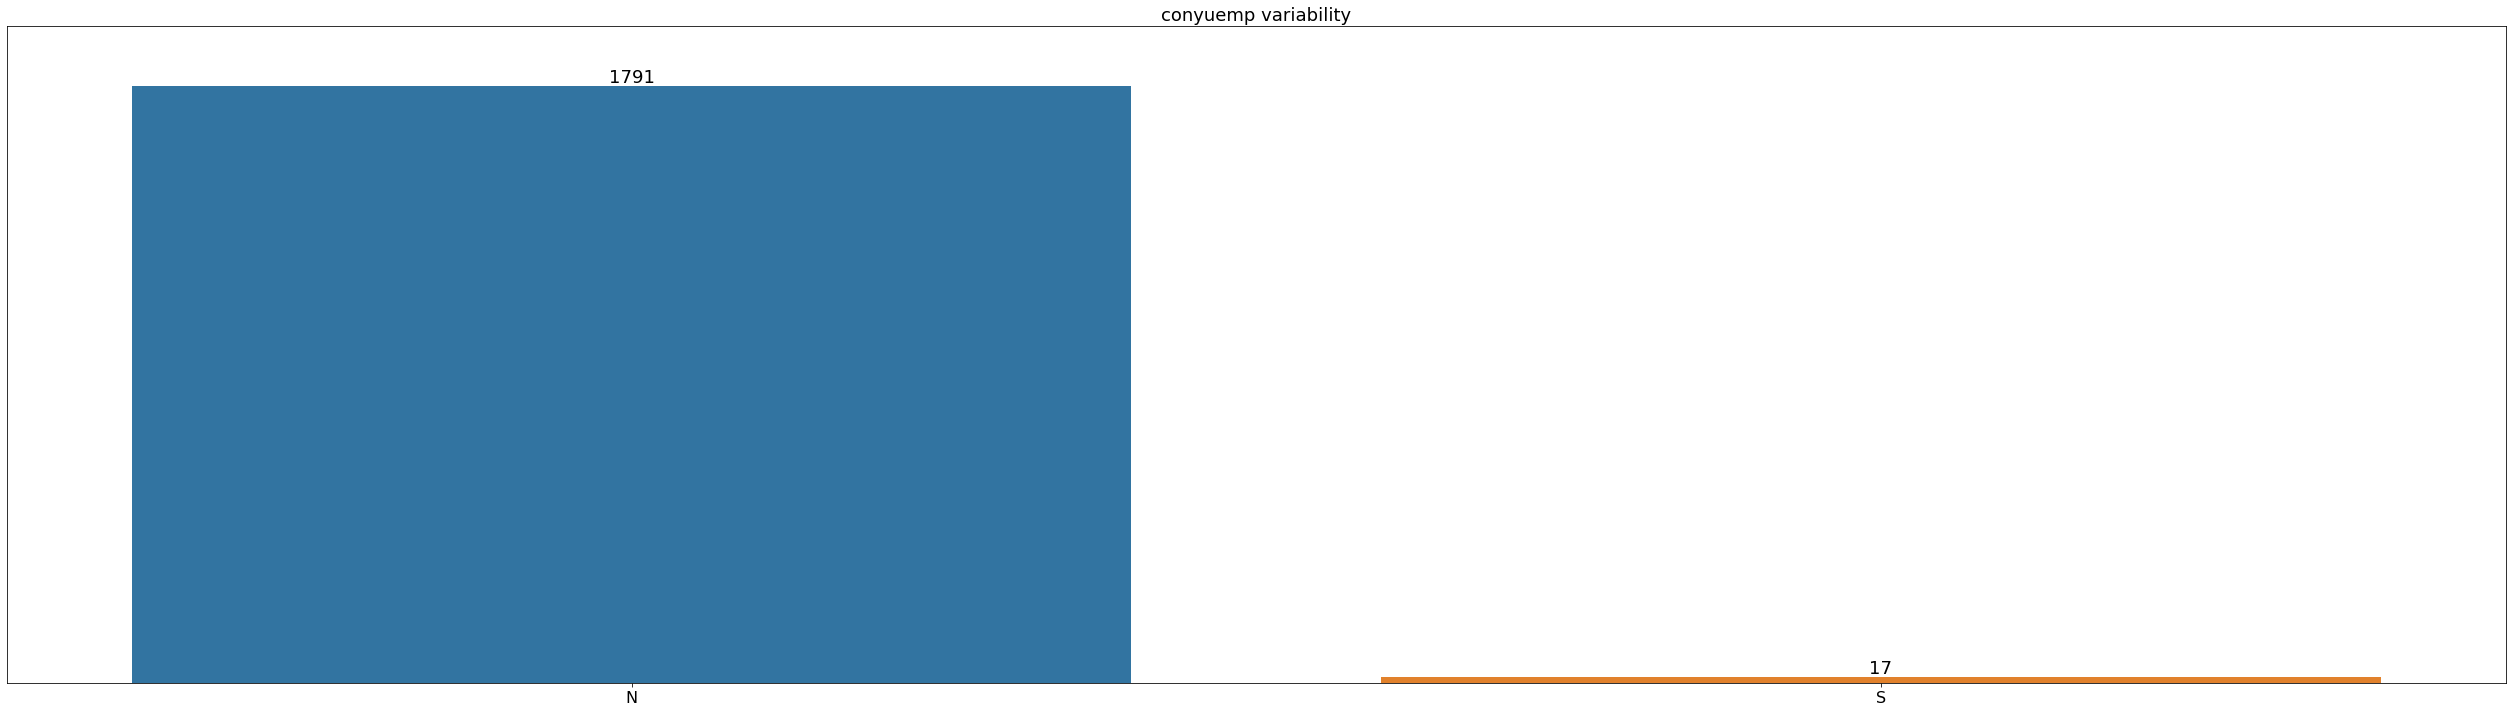

################# canal_entrada ##################


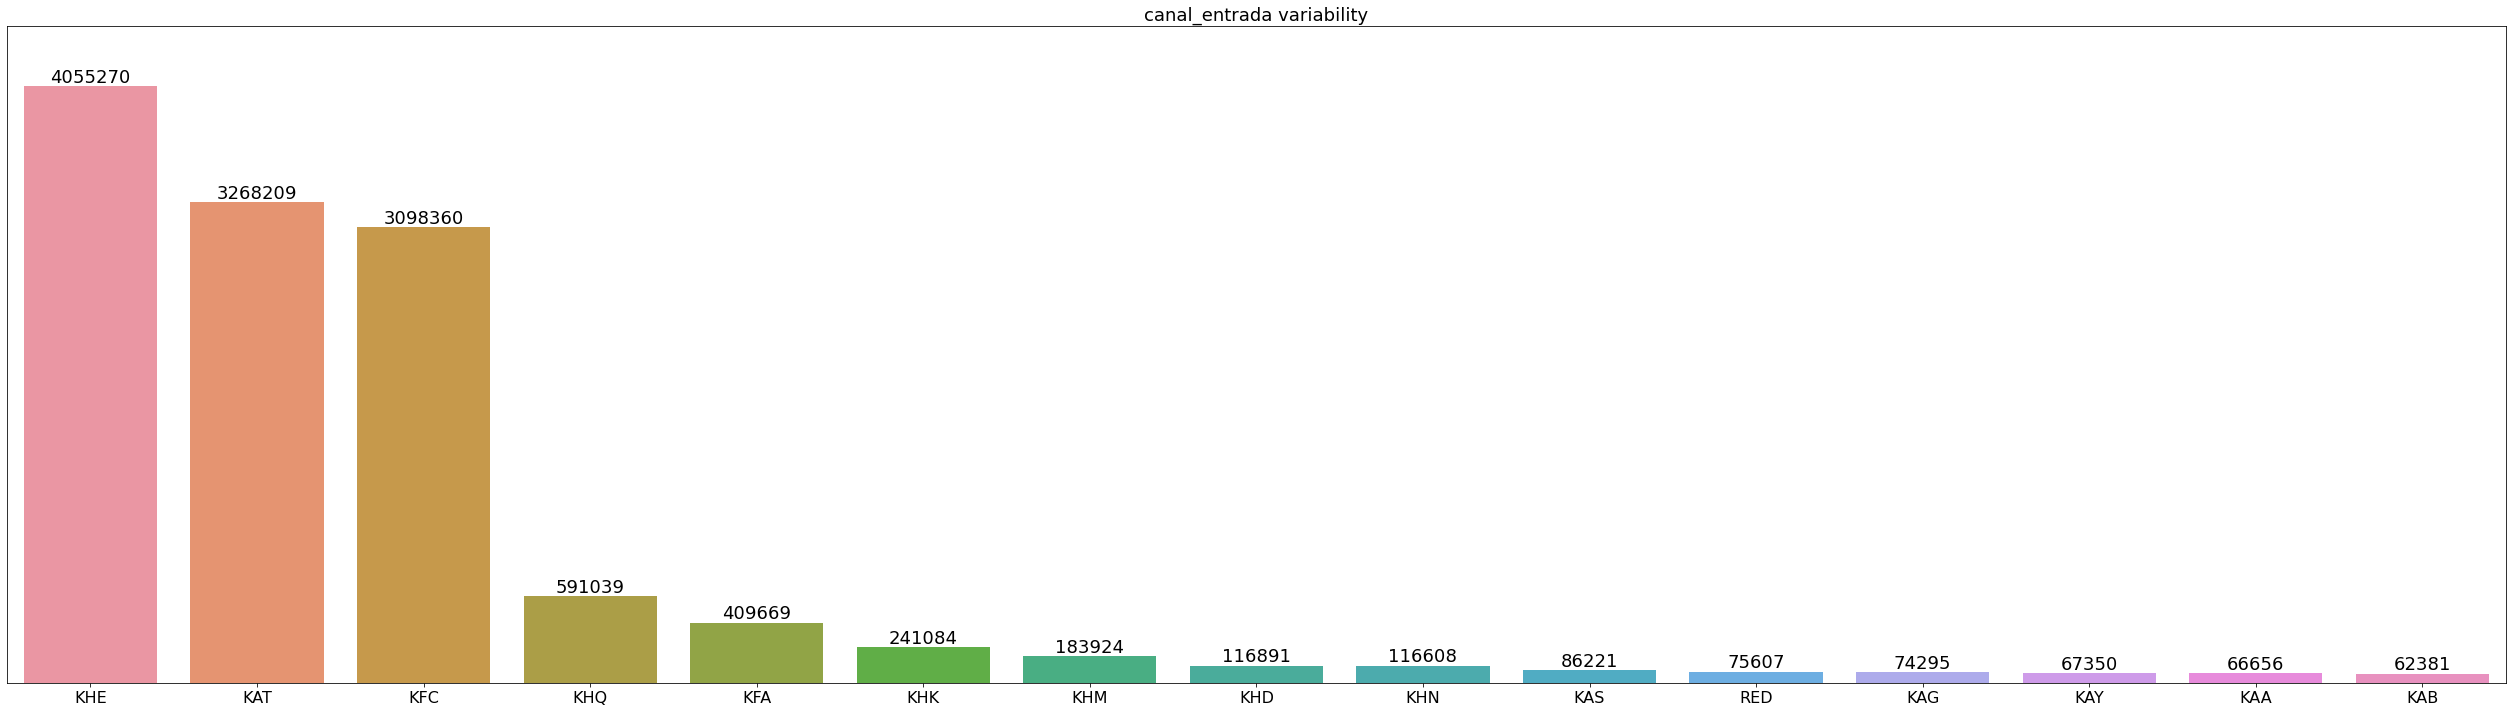

#################### indfall #####################


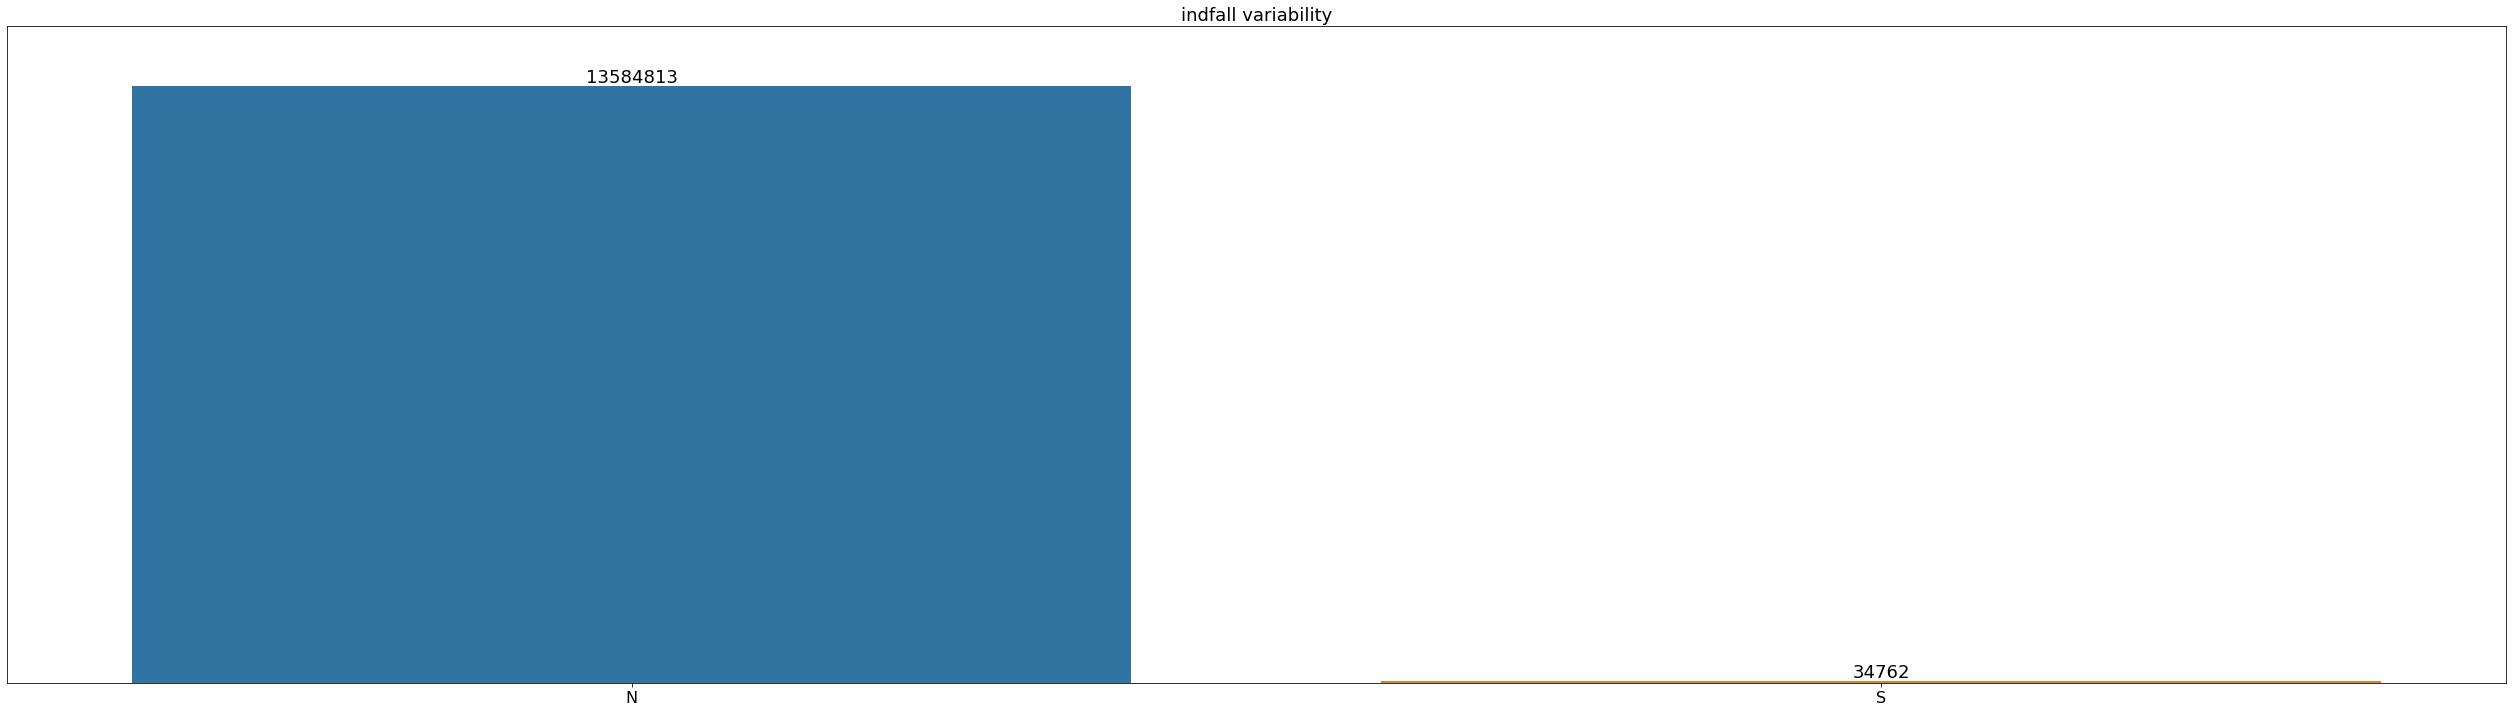

#################### tipodom #####################


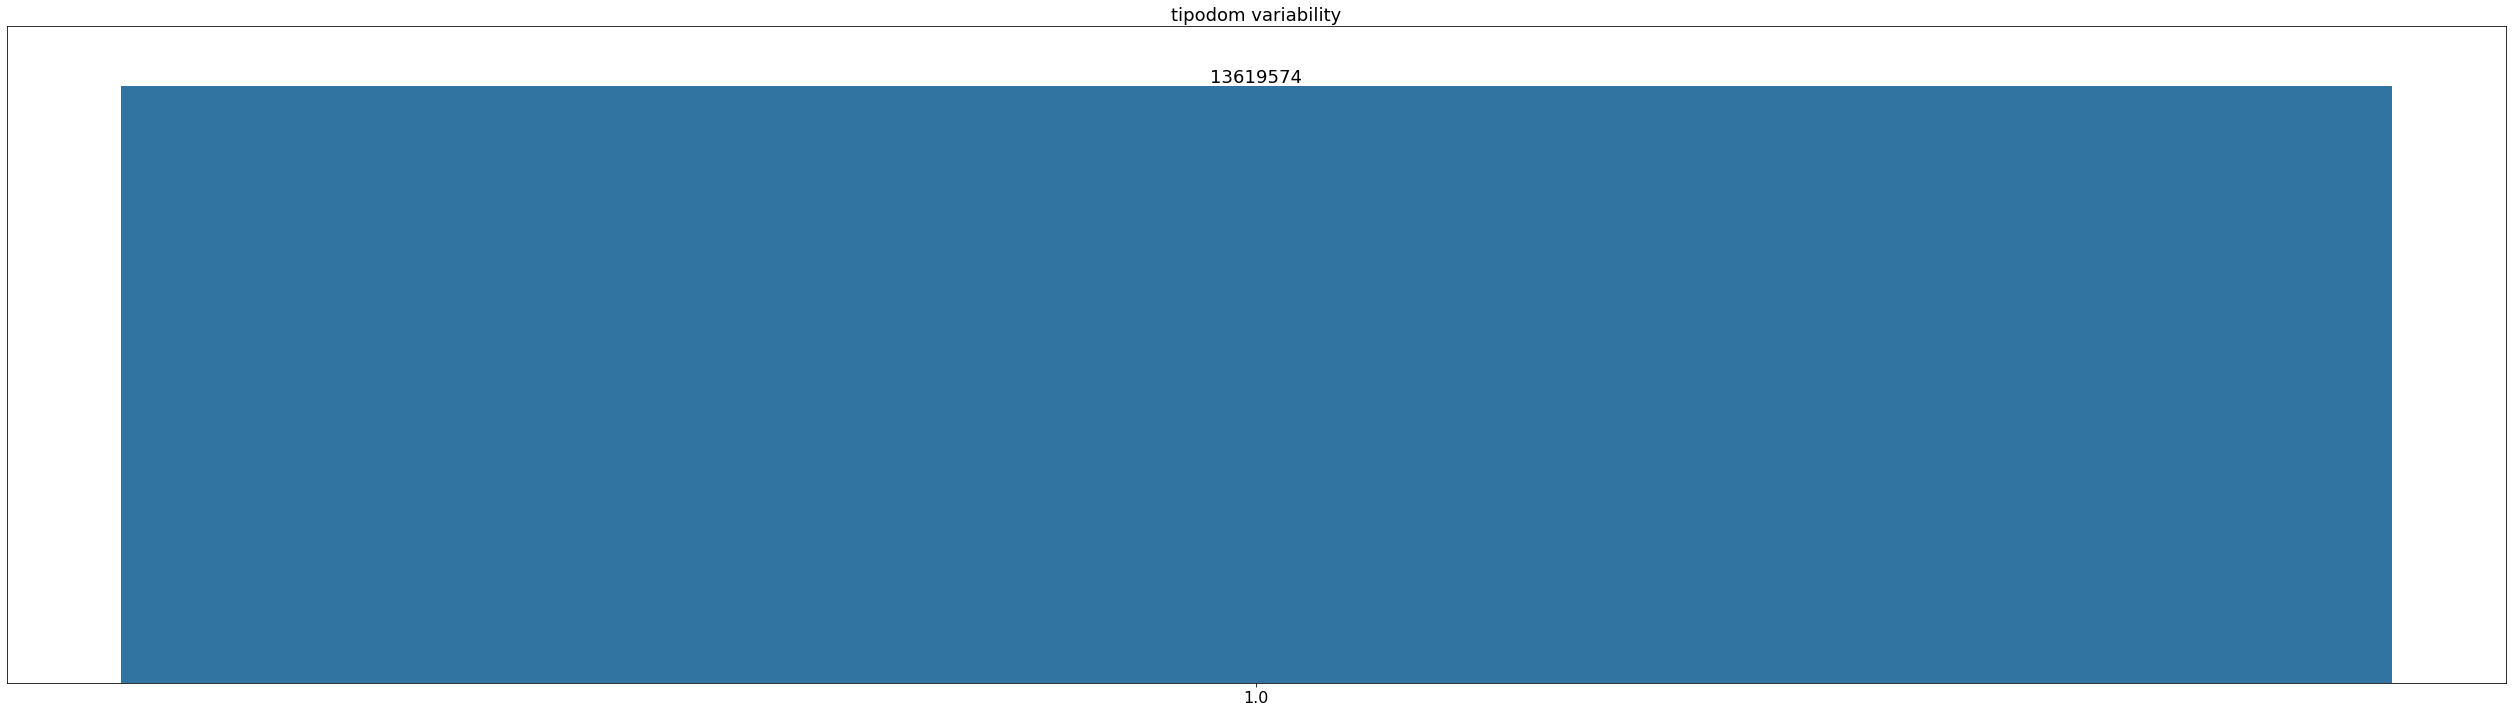

#################### cod_prov ####################


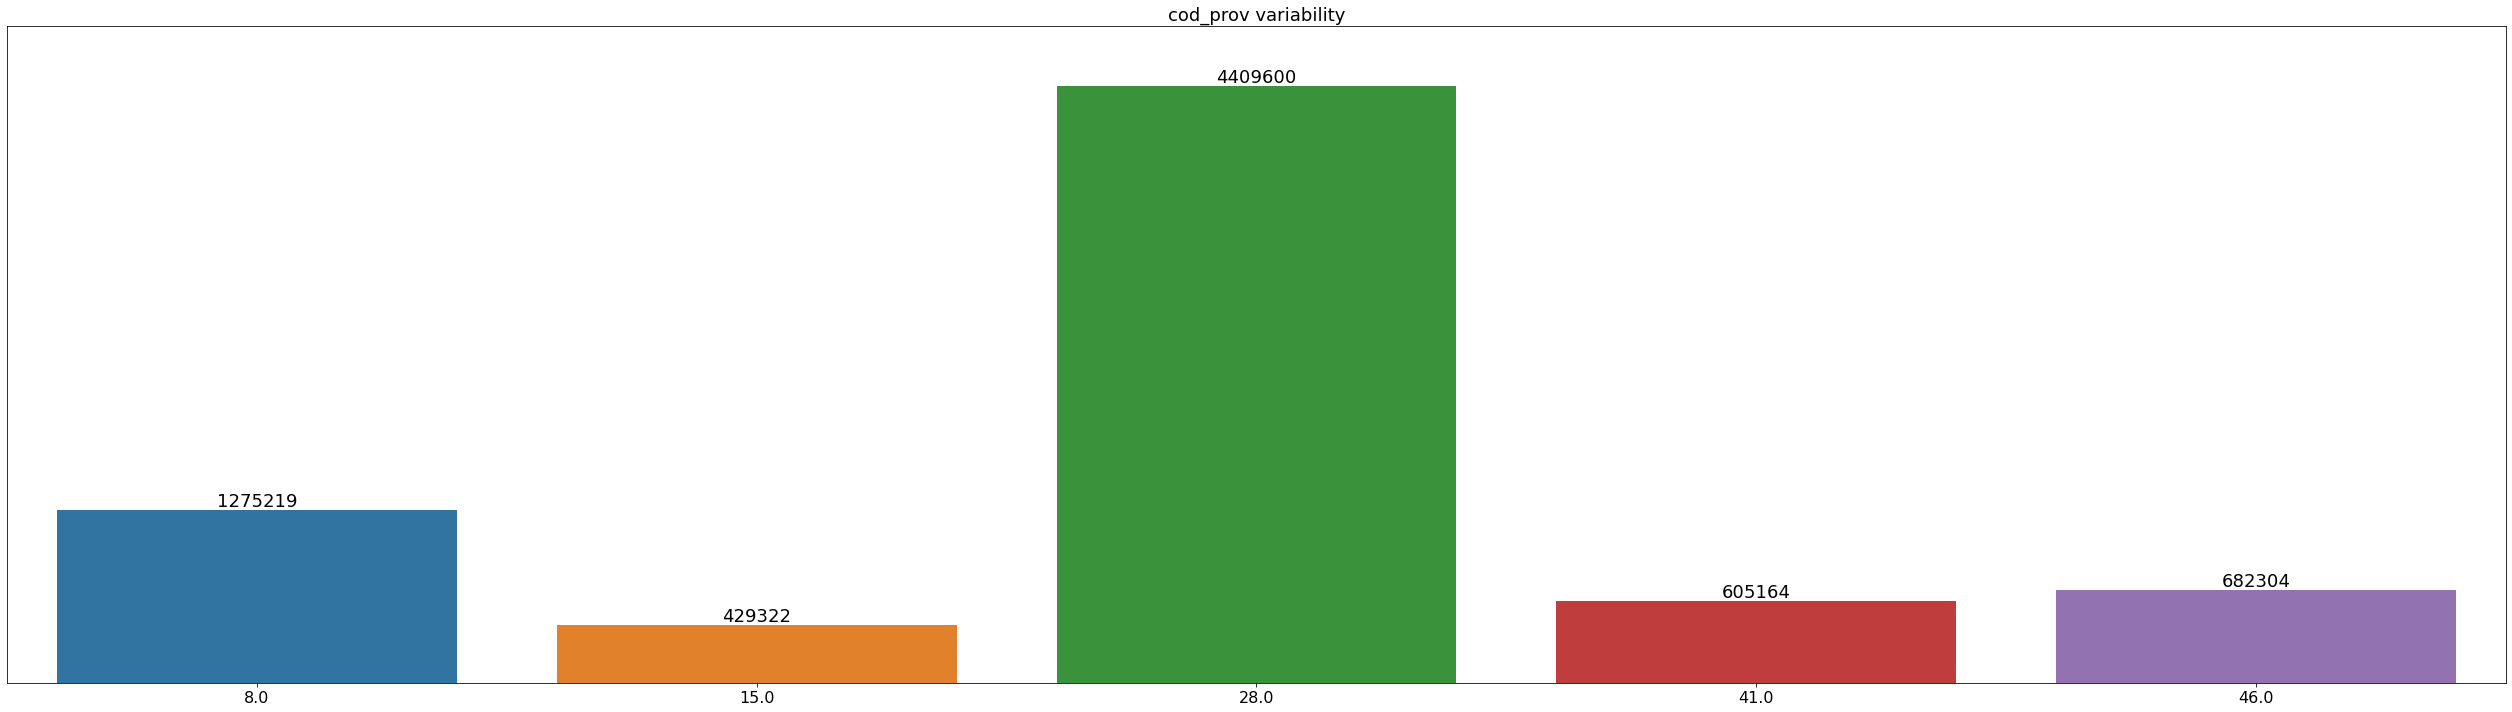

#################### nomprov #####################


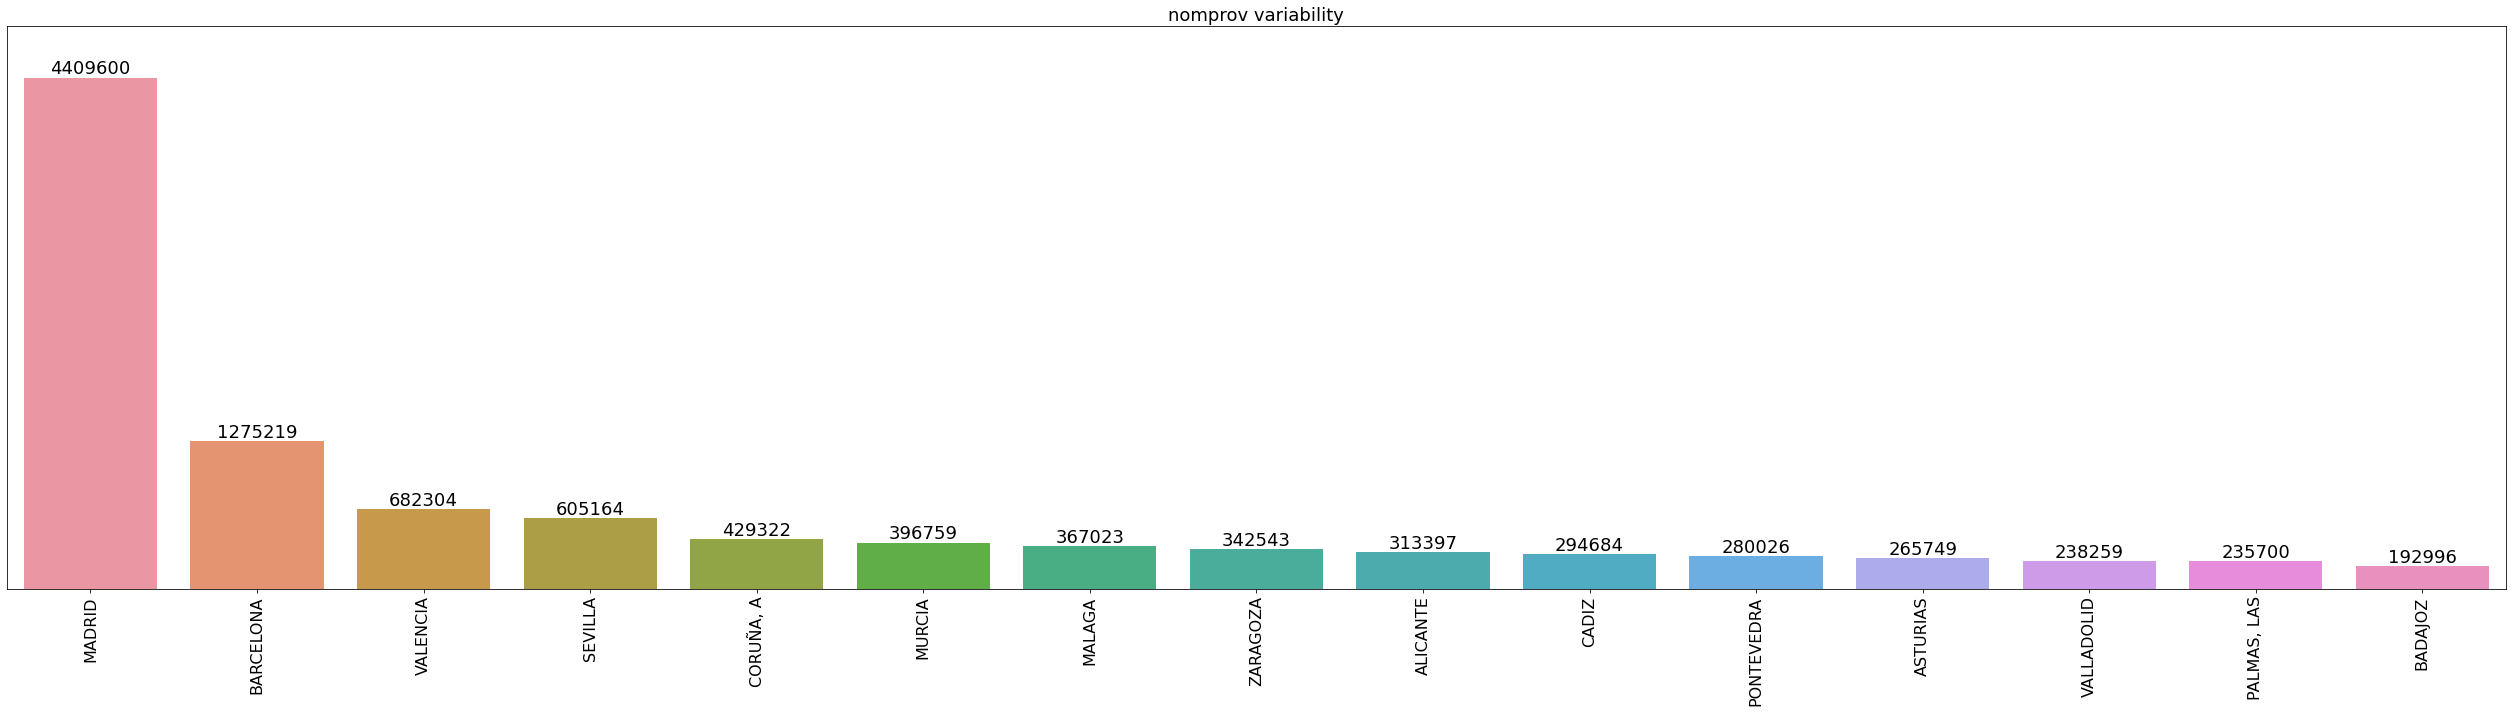

############# ind_actividad_cliente ##############


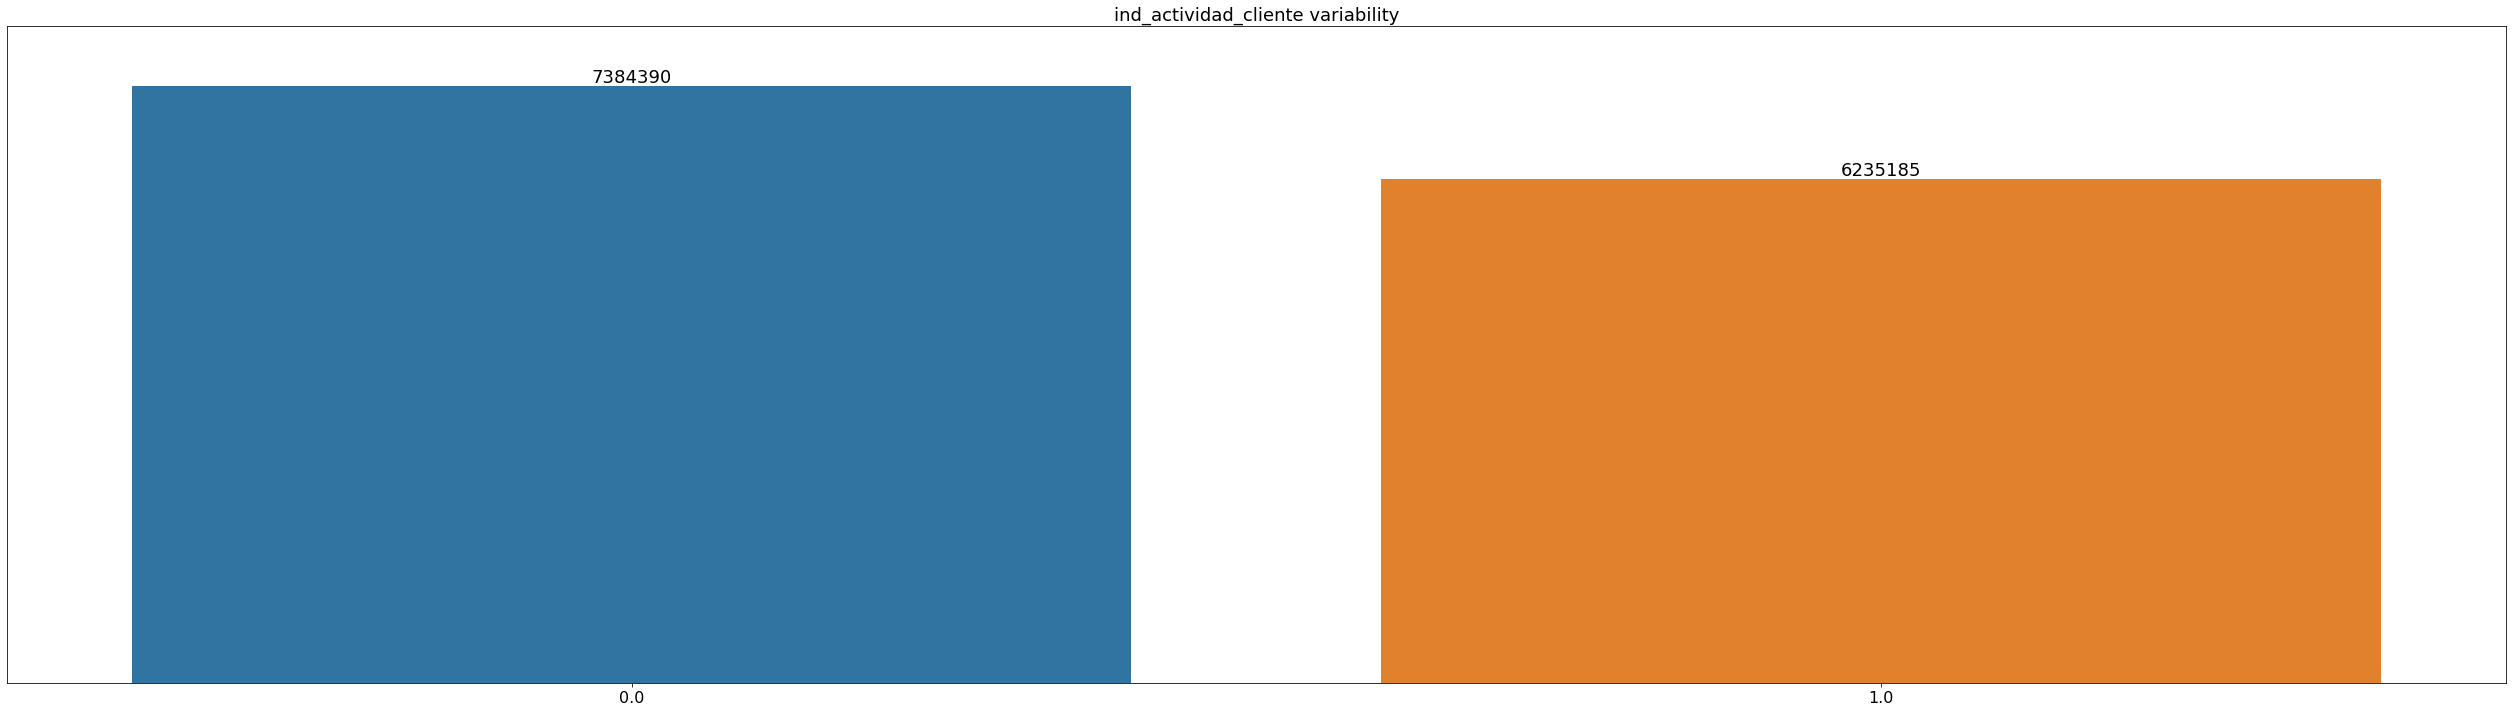

#################### segmento ####################


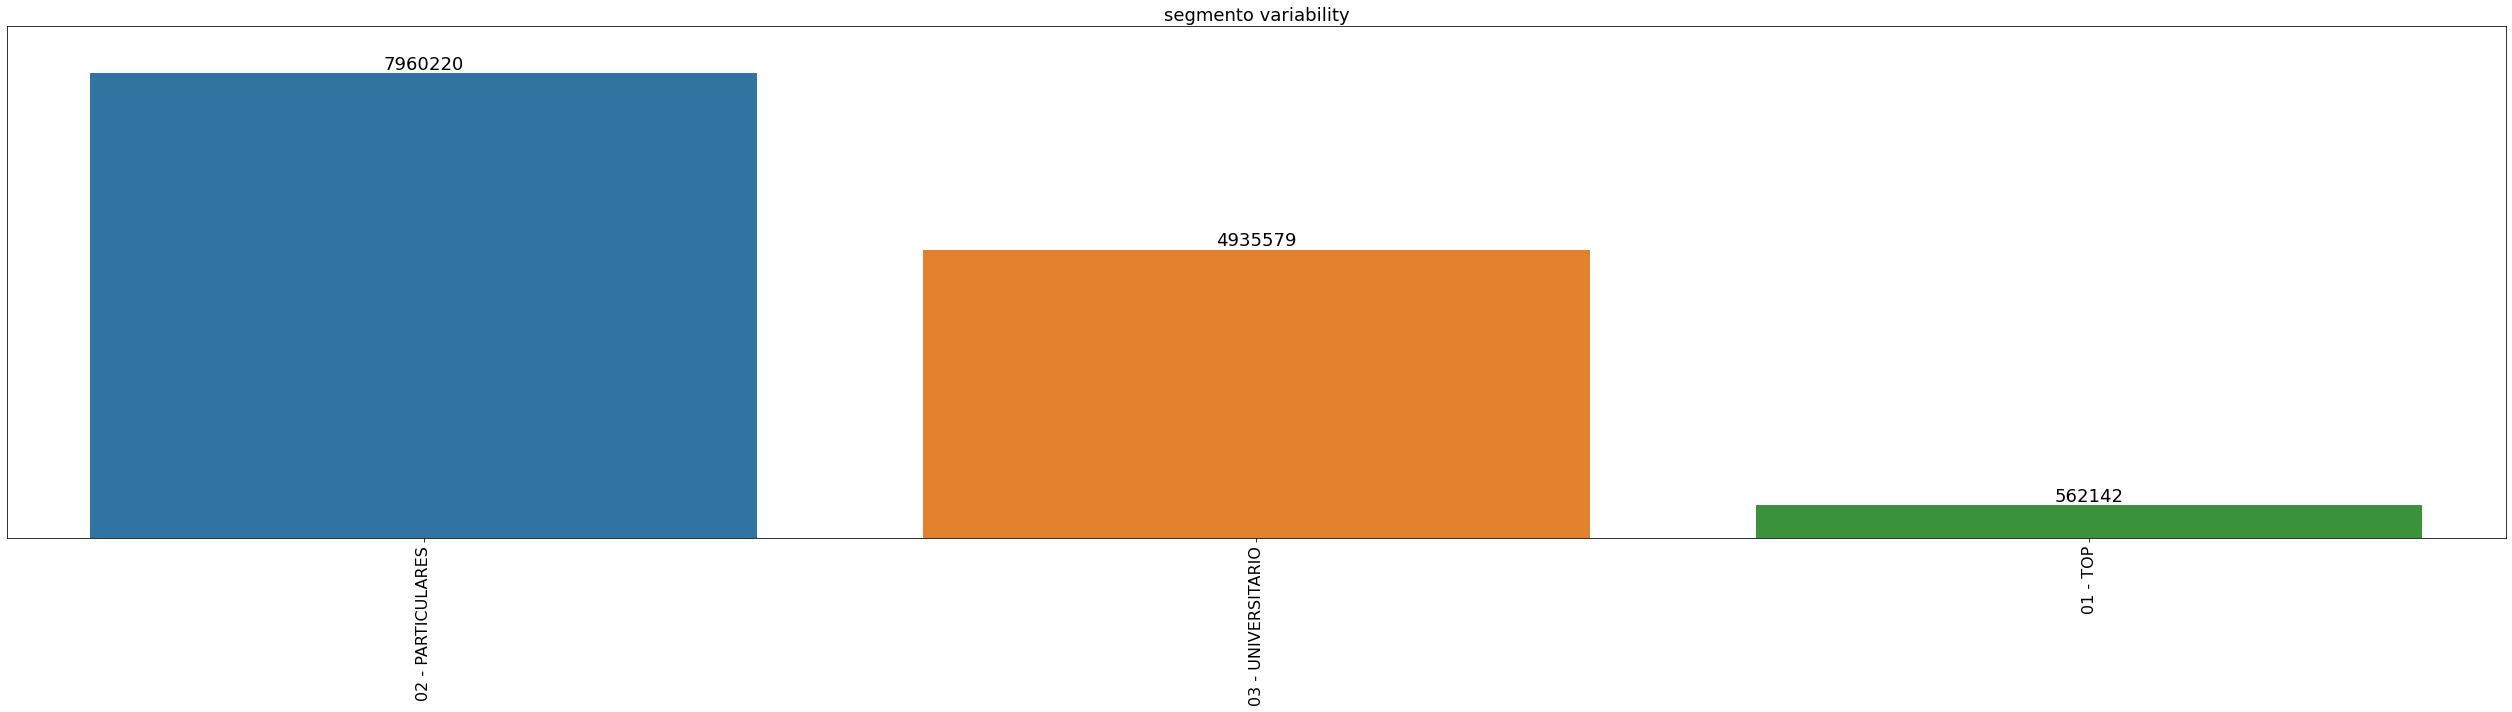

############### ind_ahor_fin_ult1 ################


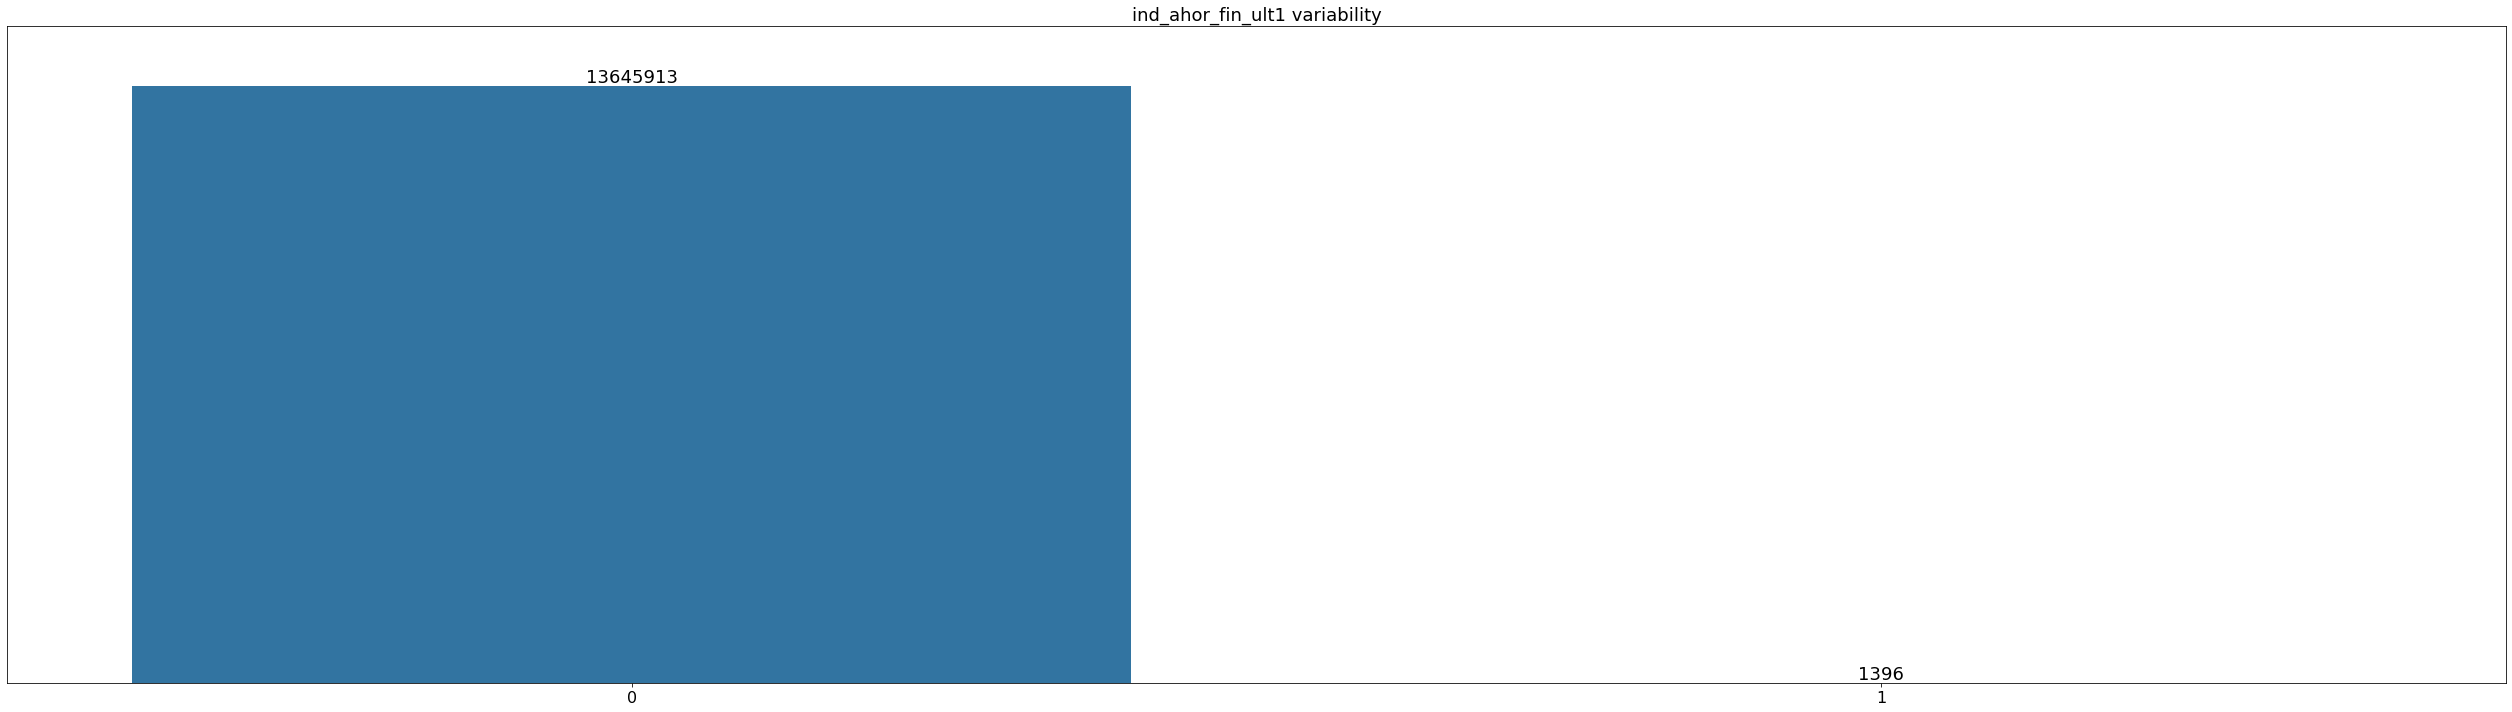

############### ind_aval_fin_ult1 ################


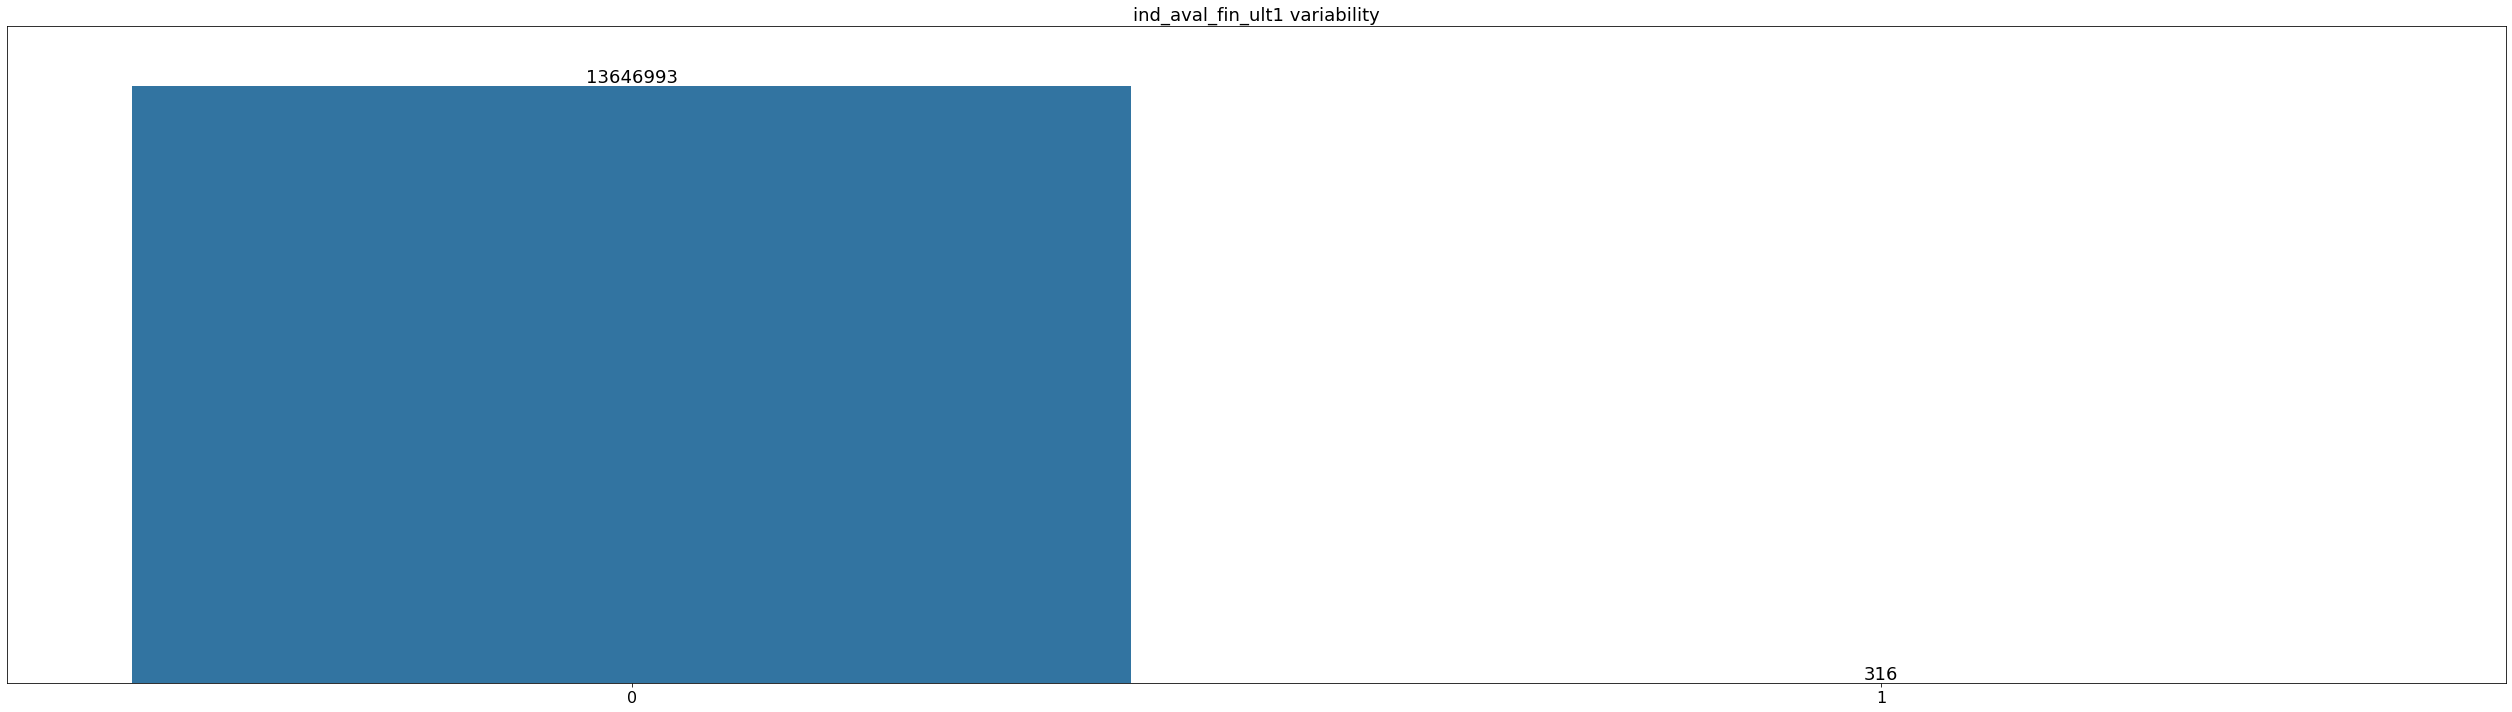

################ ind_cco_fin_ult1 ################


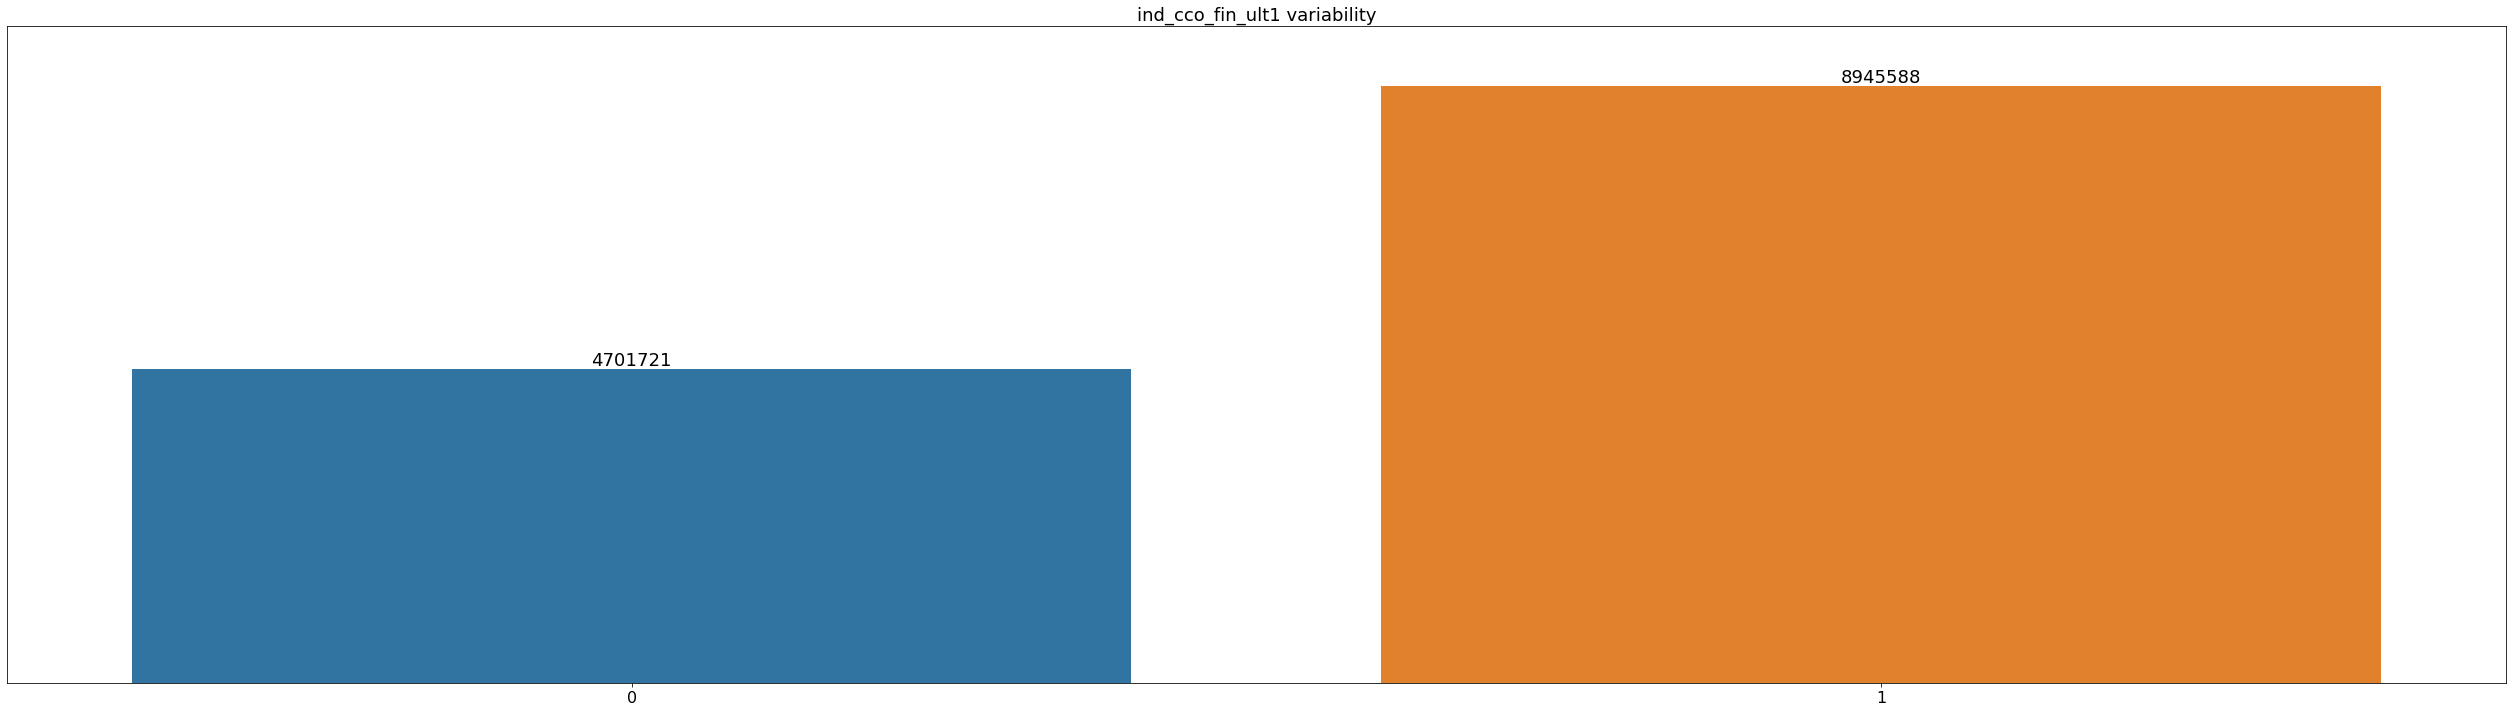

############### ind_cder_fin_ult1 ################


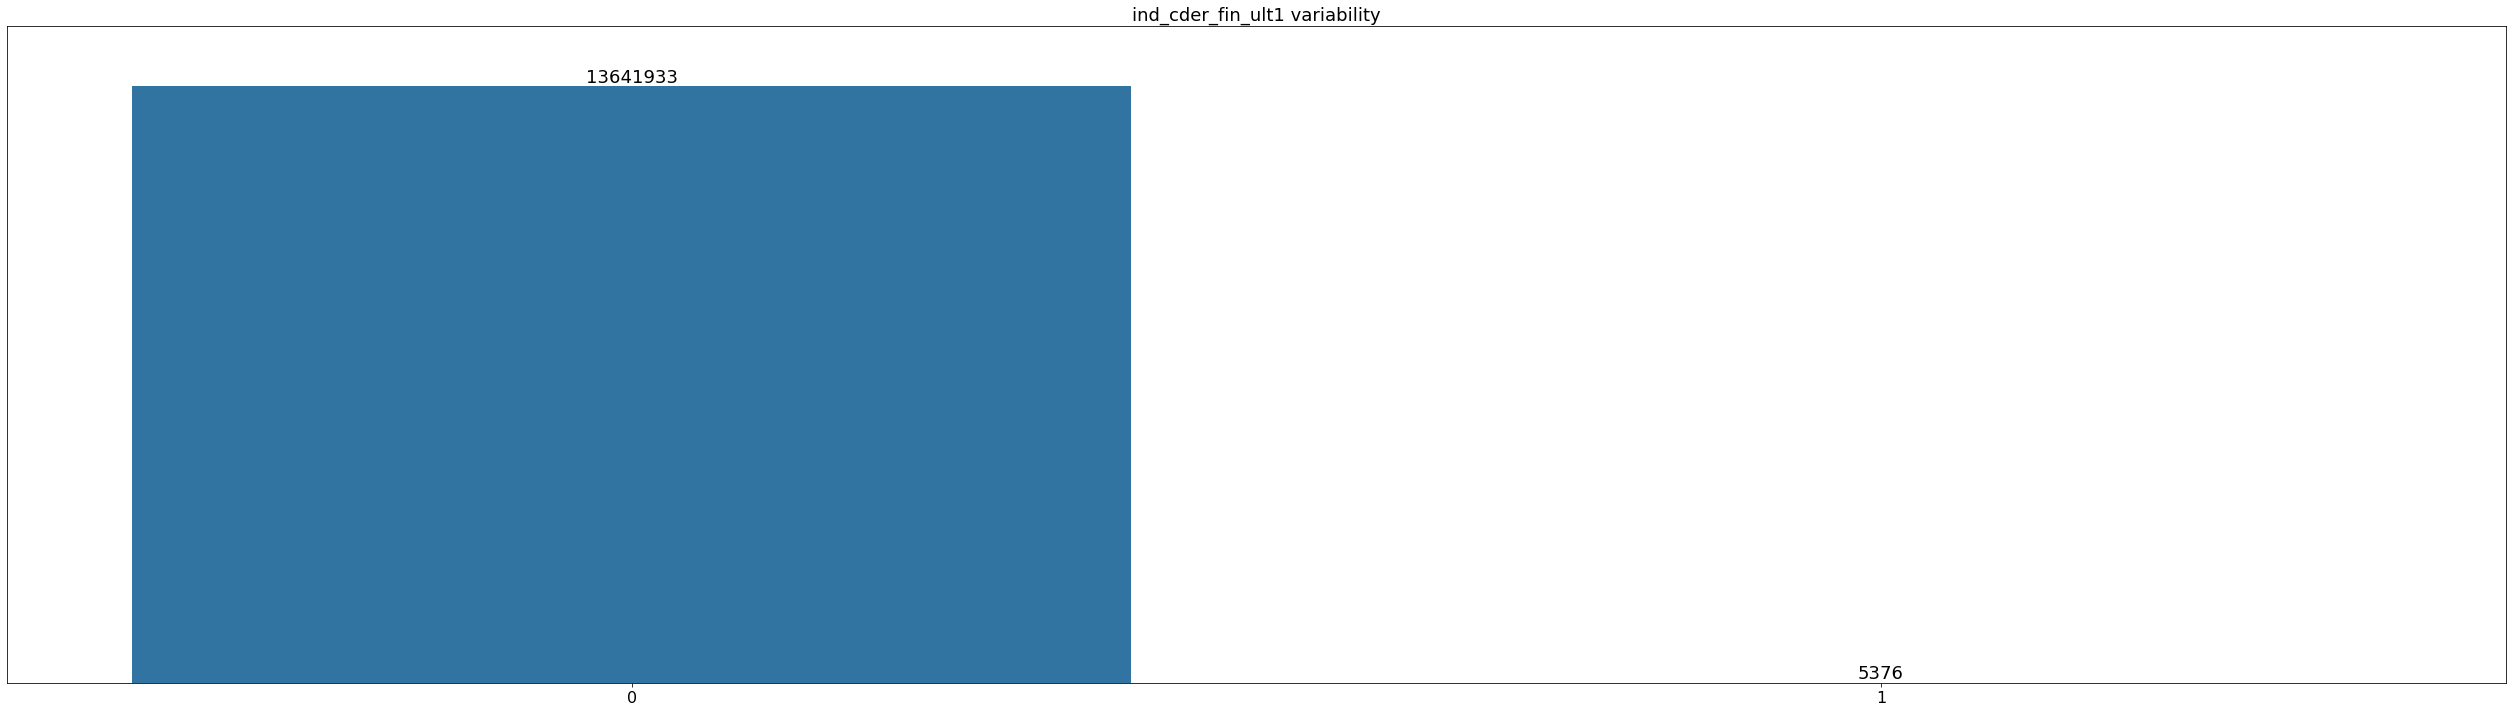

################ ind_cno_fin_ult1 ################


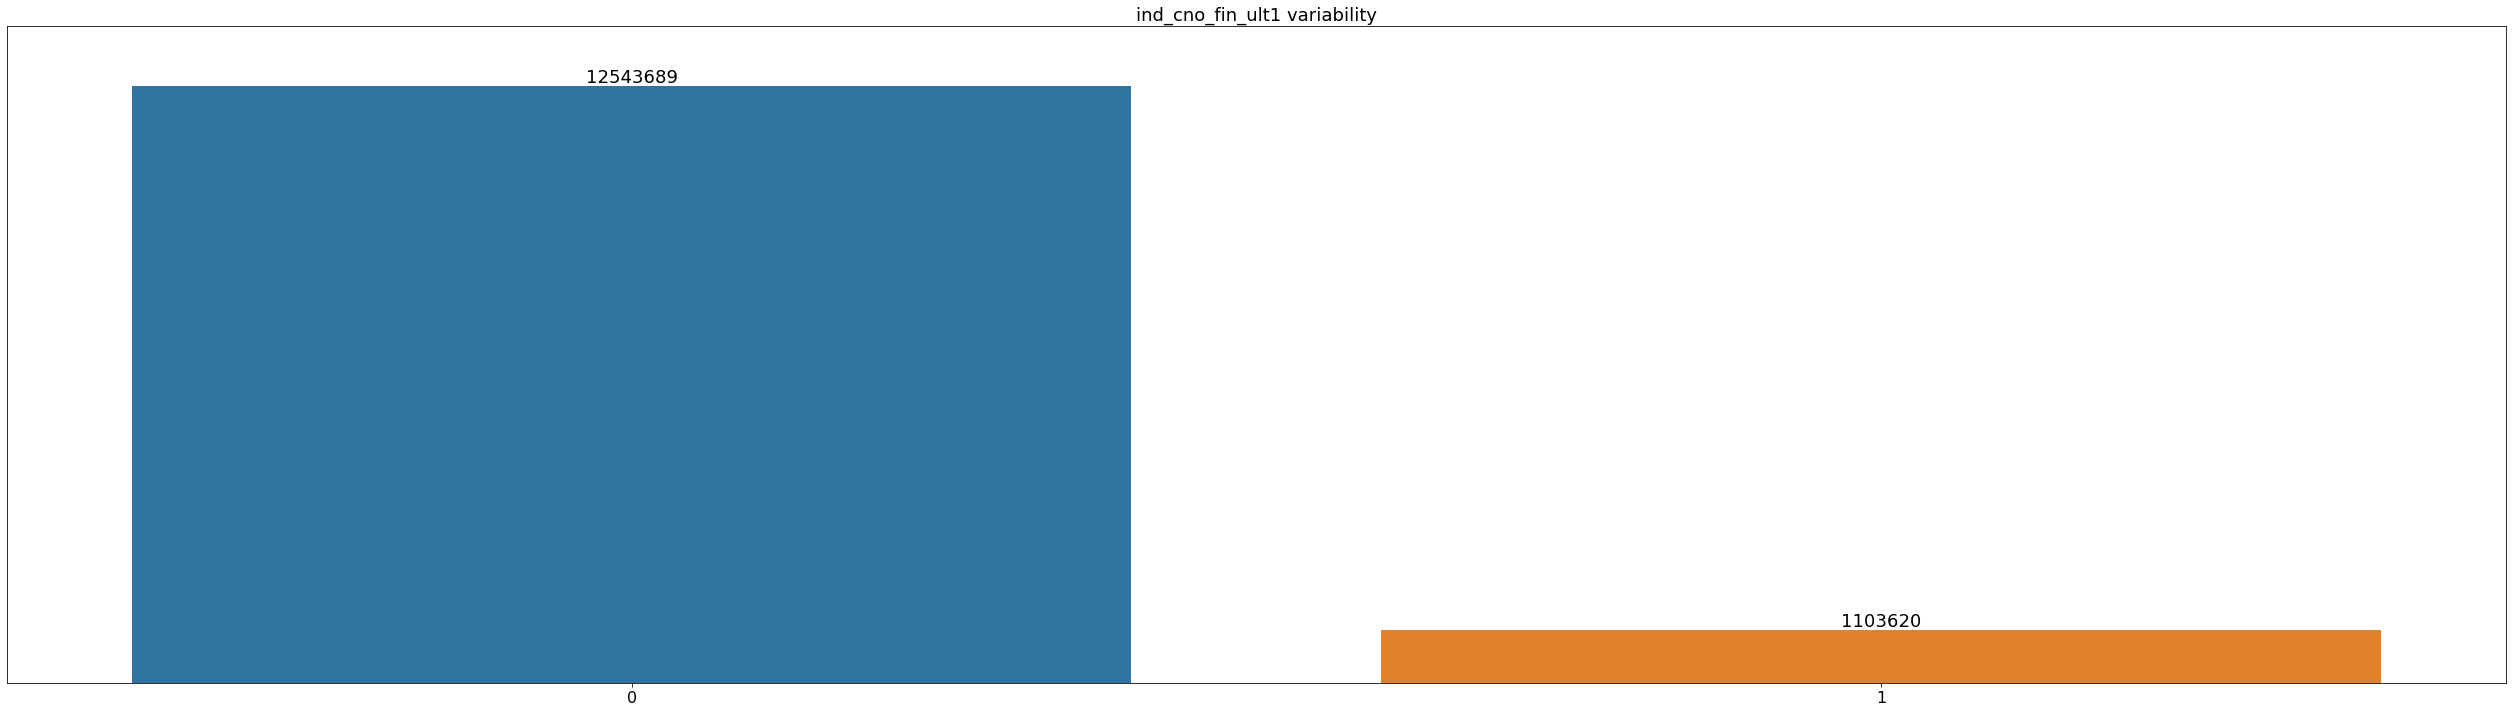

############### ind_ctju_fin_ult1 ################


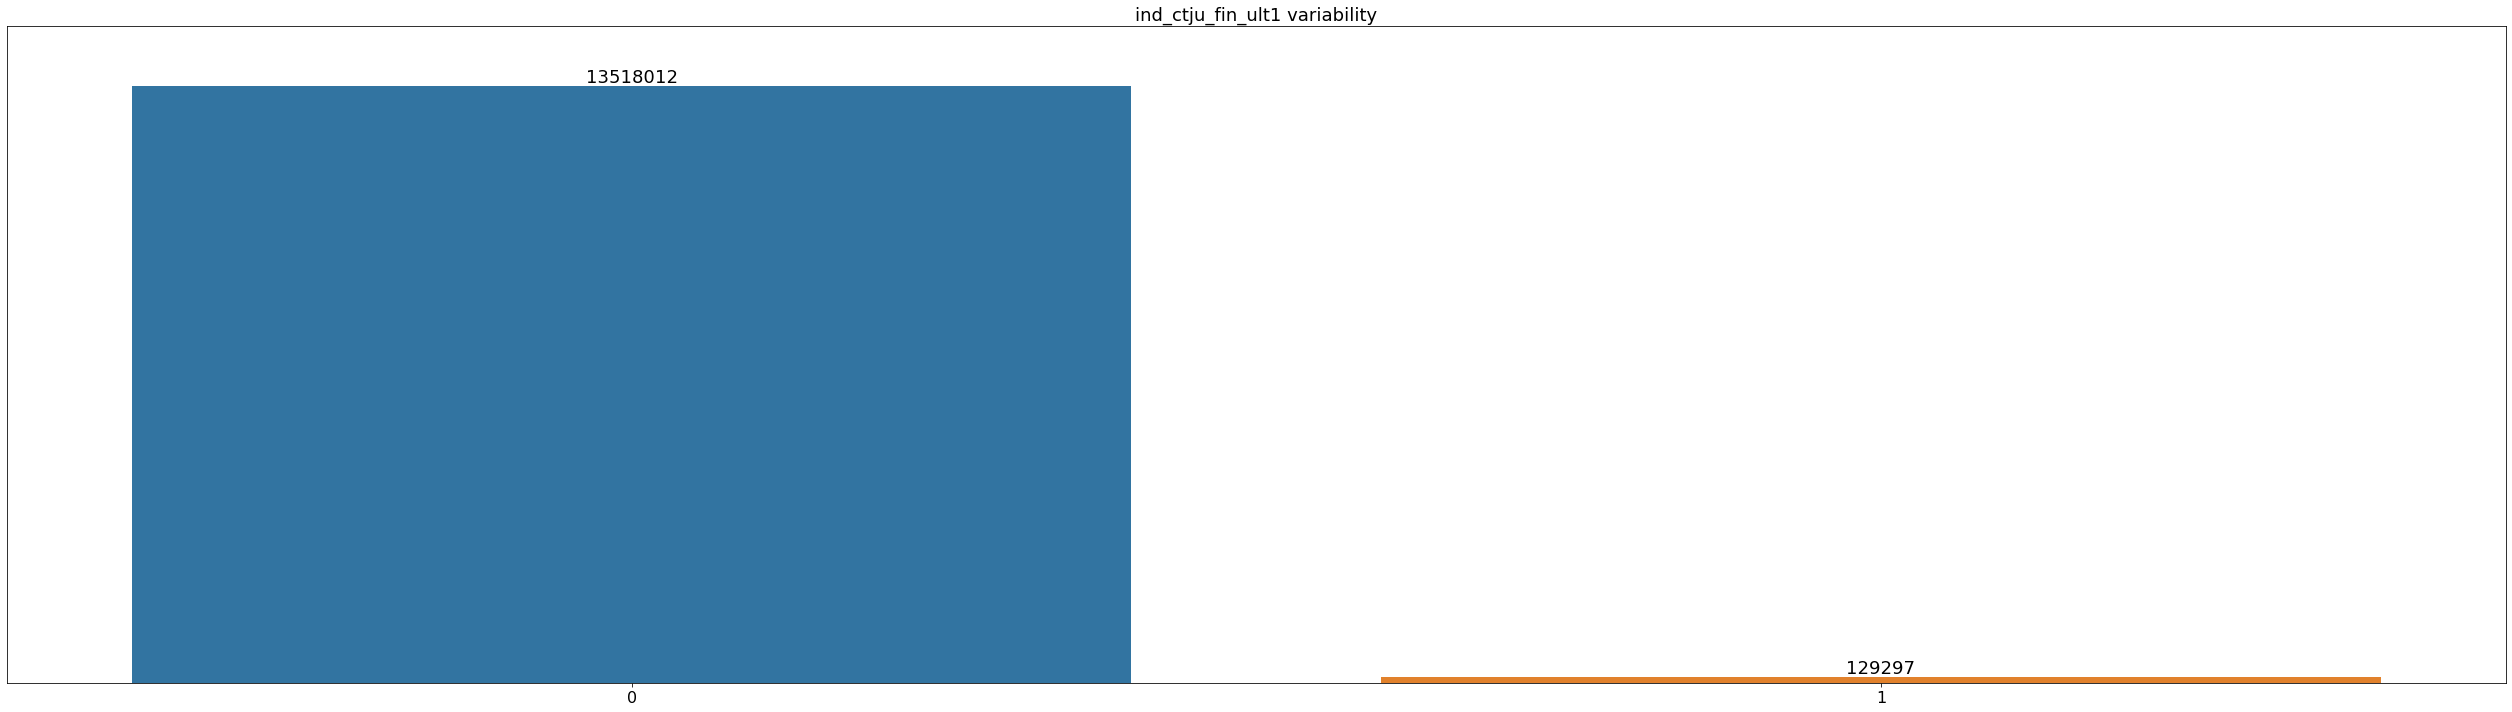

############### ind_ctma_fin_ult1 ################


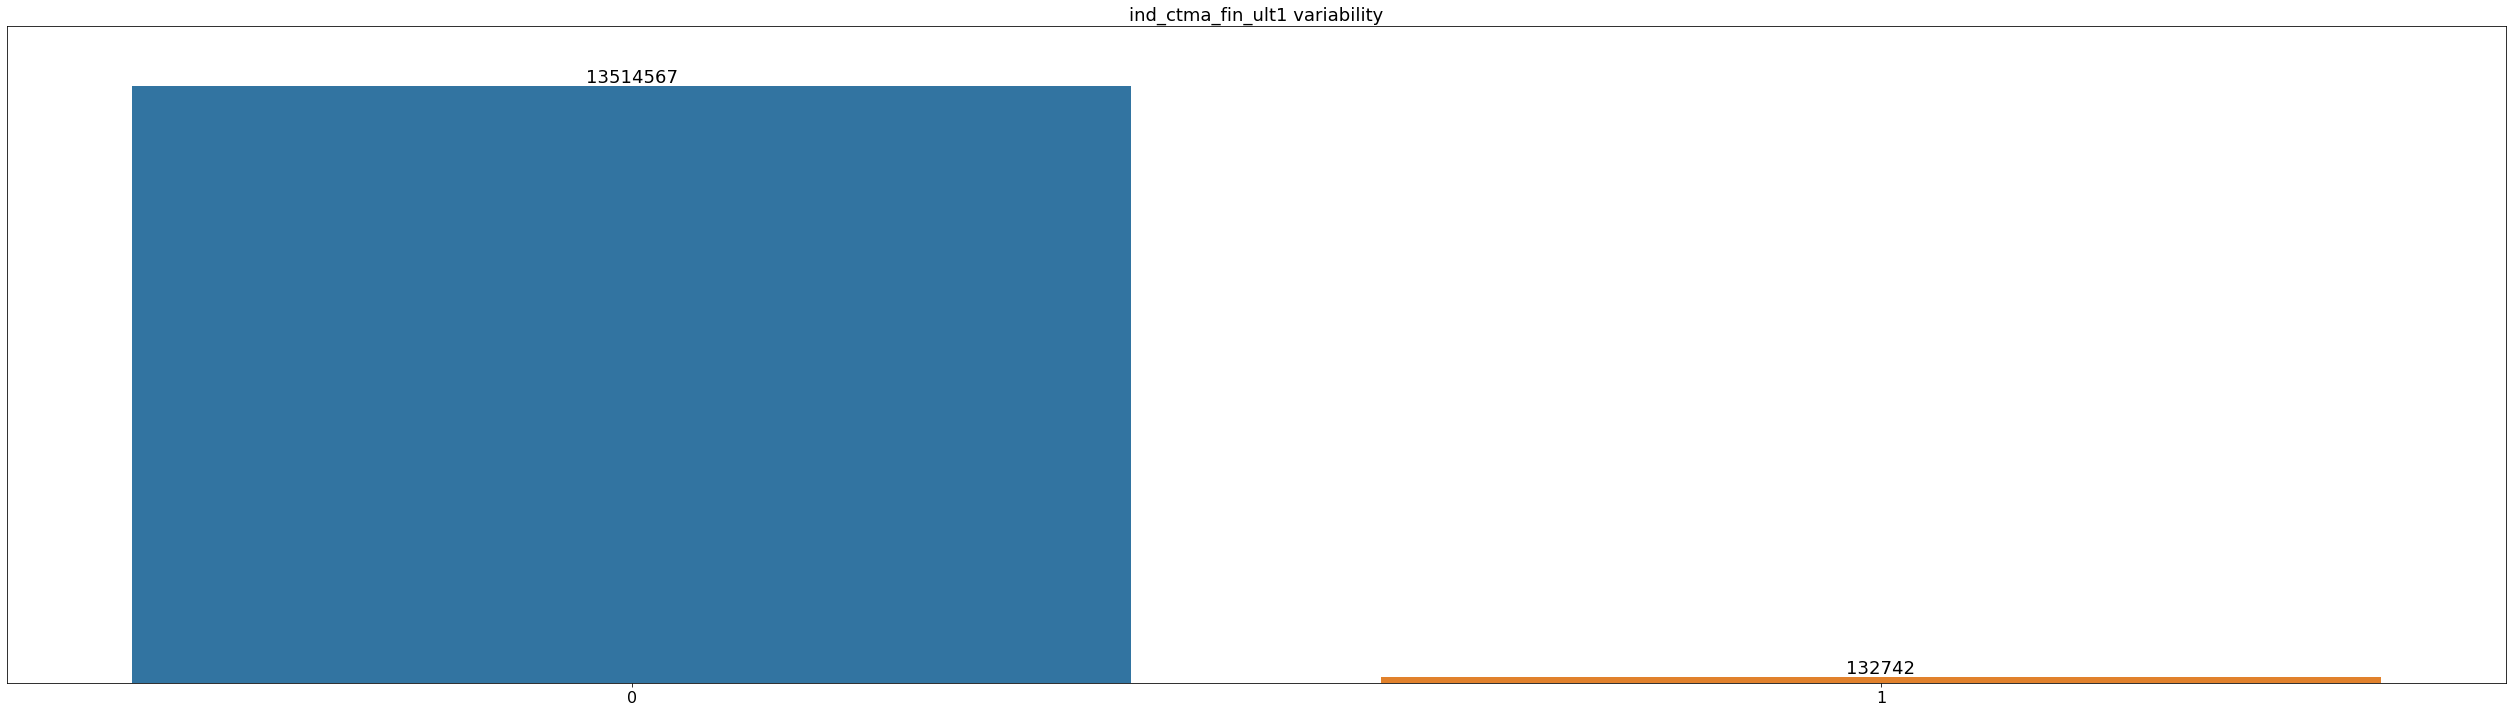

############### ind_ctop_fin_ult1 ################


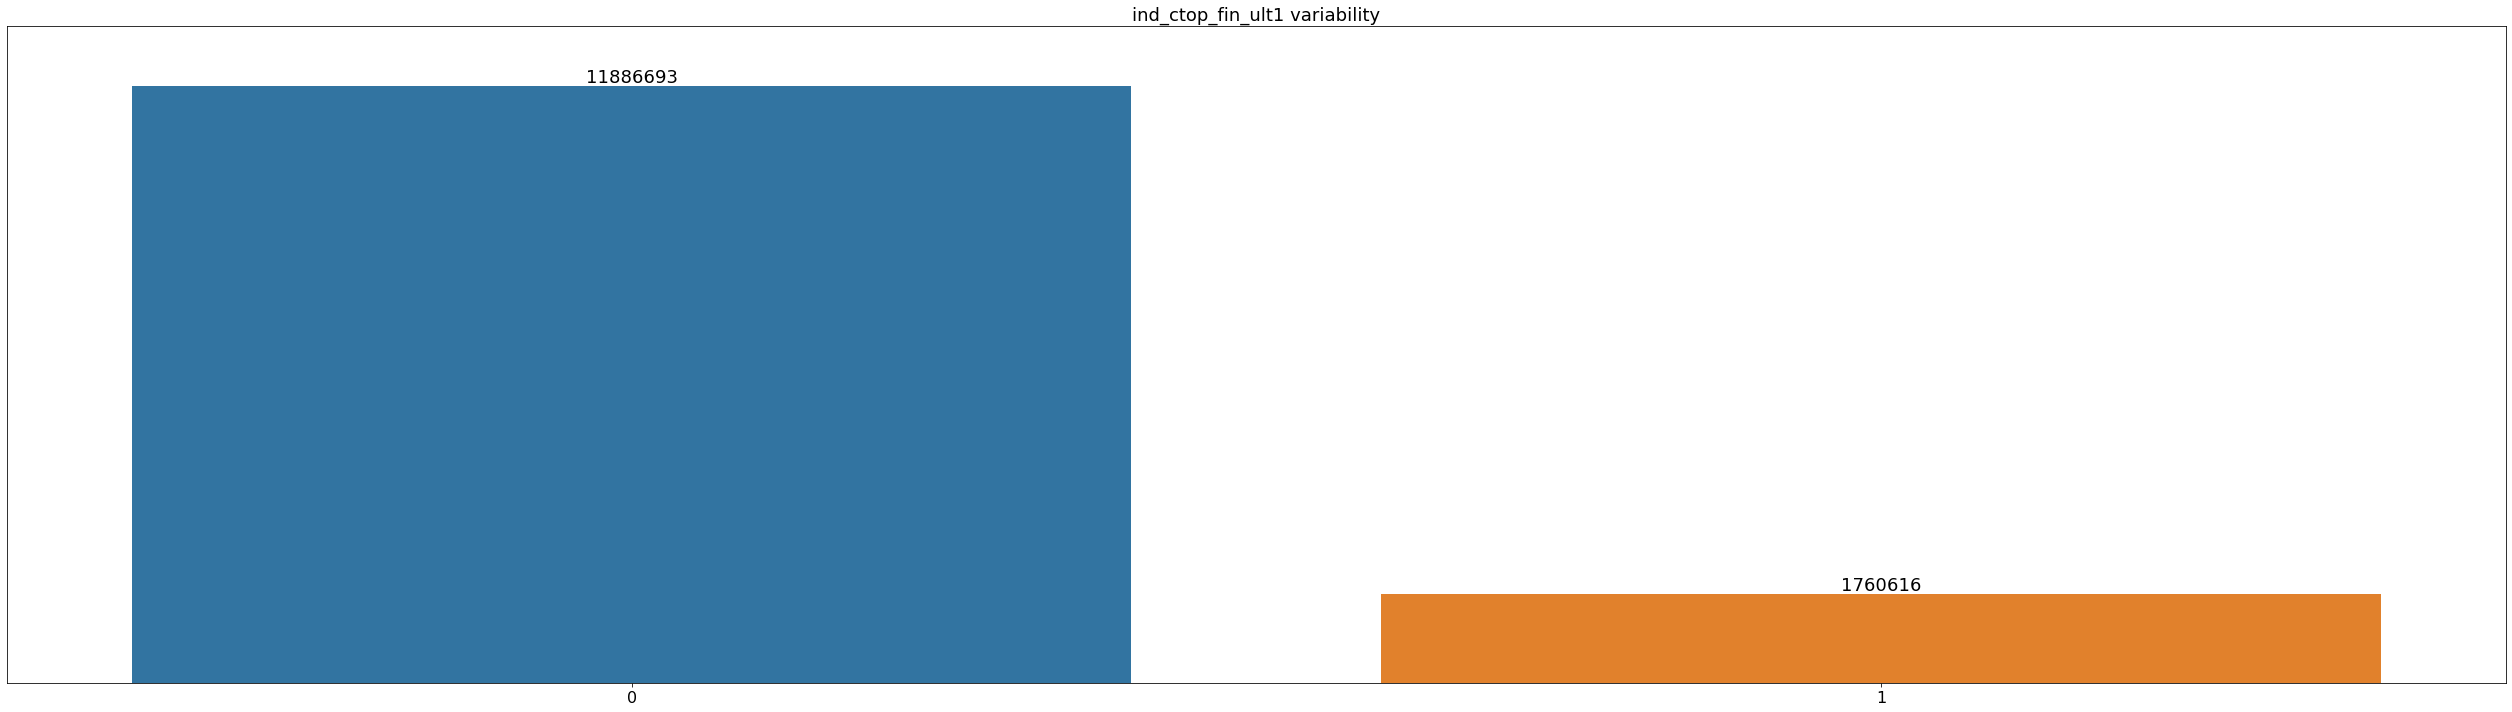

############### ind_ctpp_fin_ult1 ################


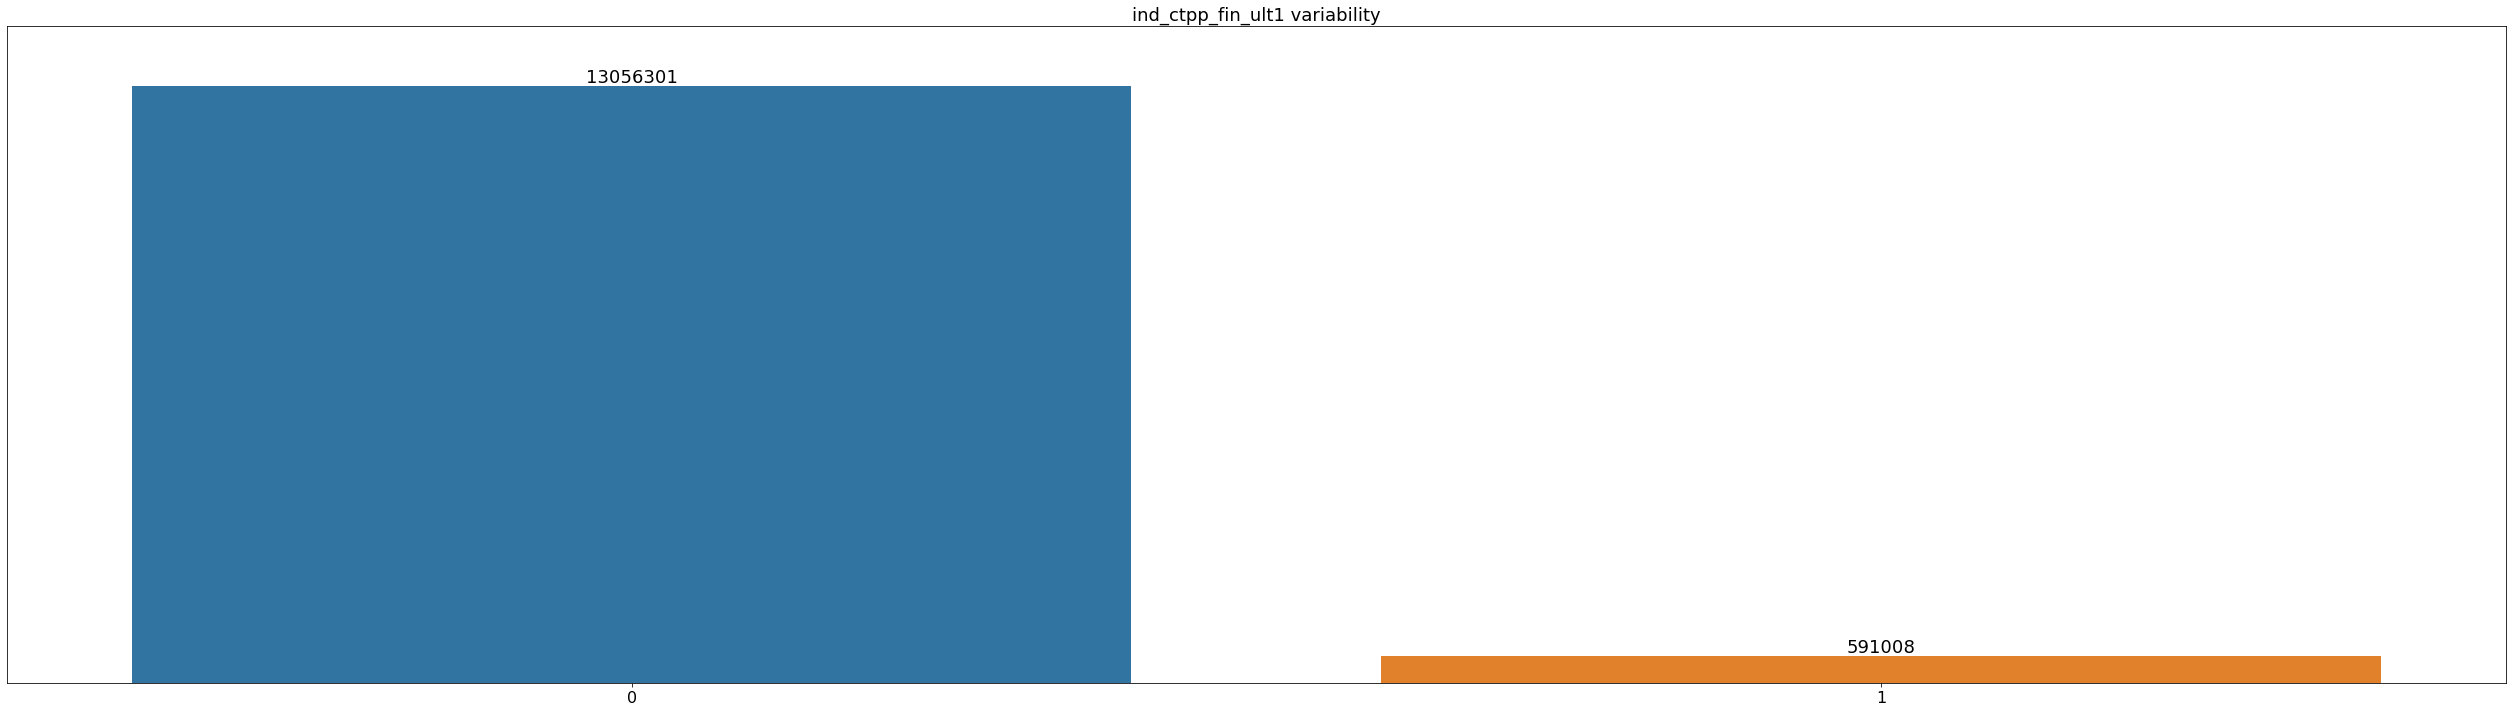

############### ind_deco_fin_ult1 ################


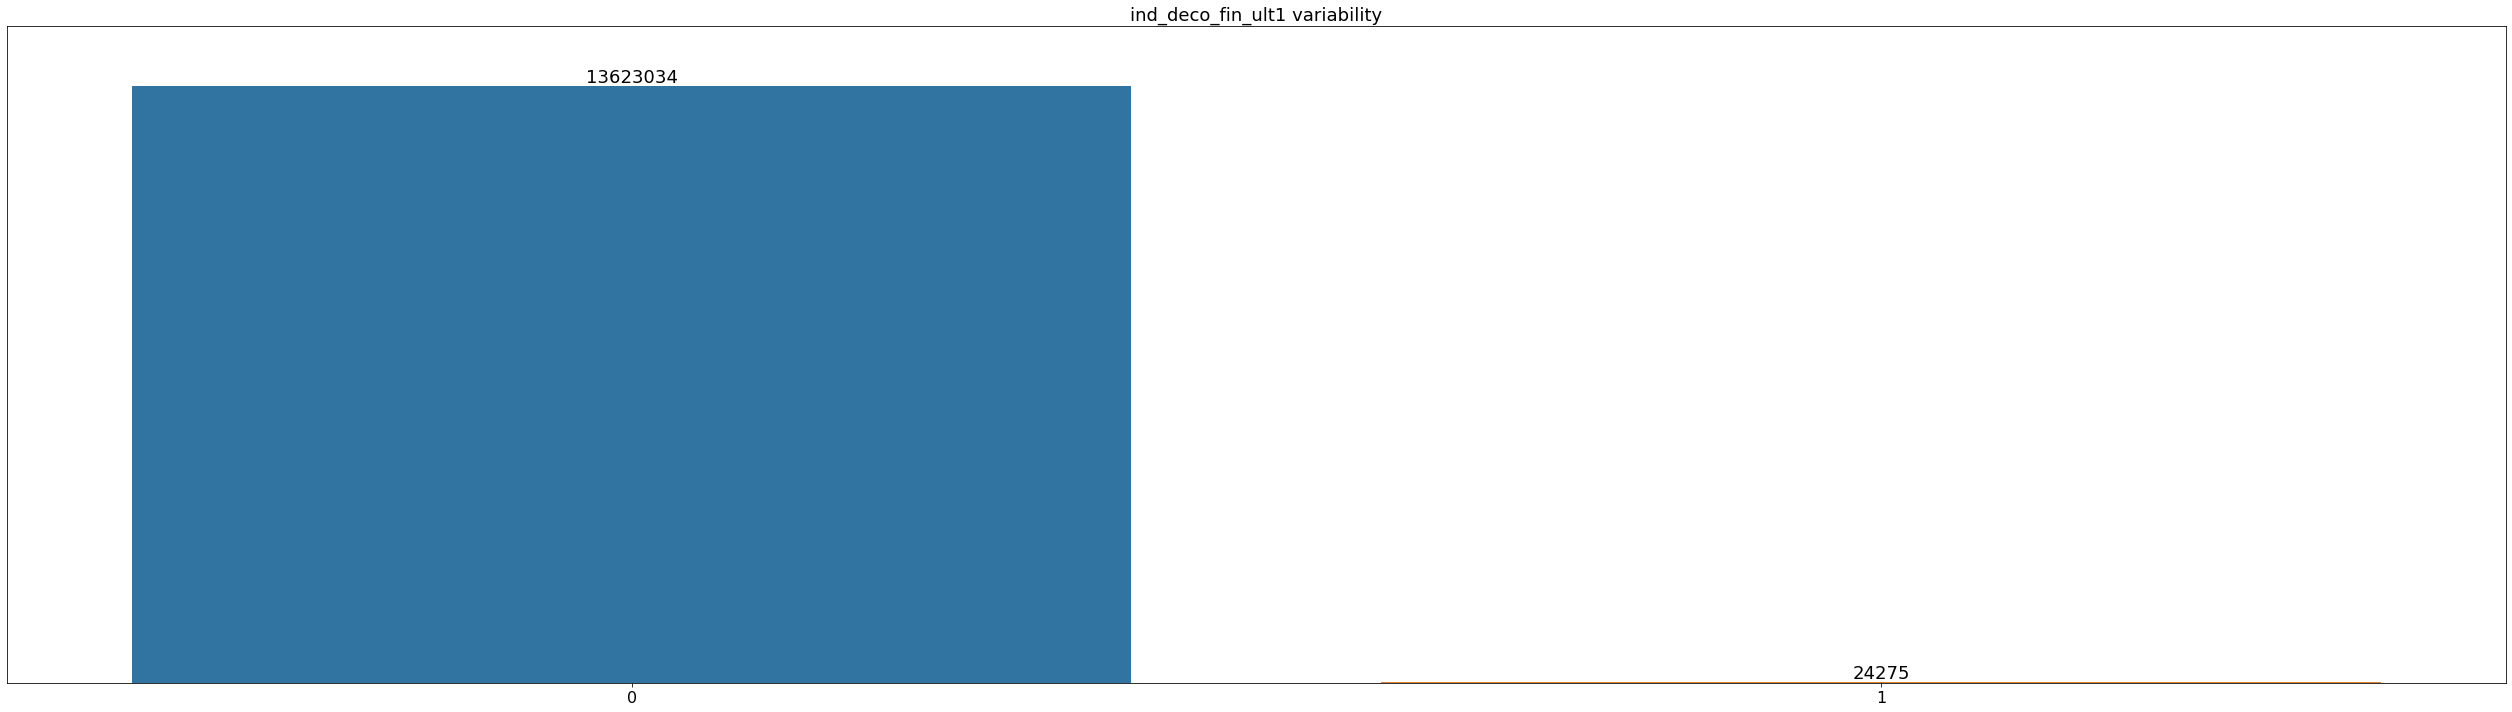

############### ind_deme_fin_ult1 ################


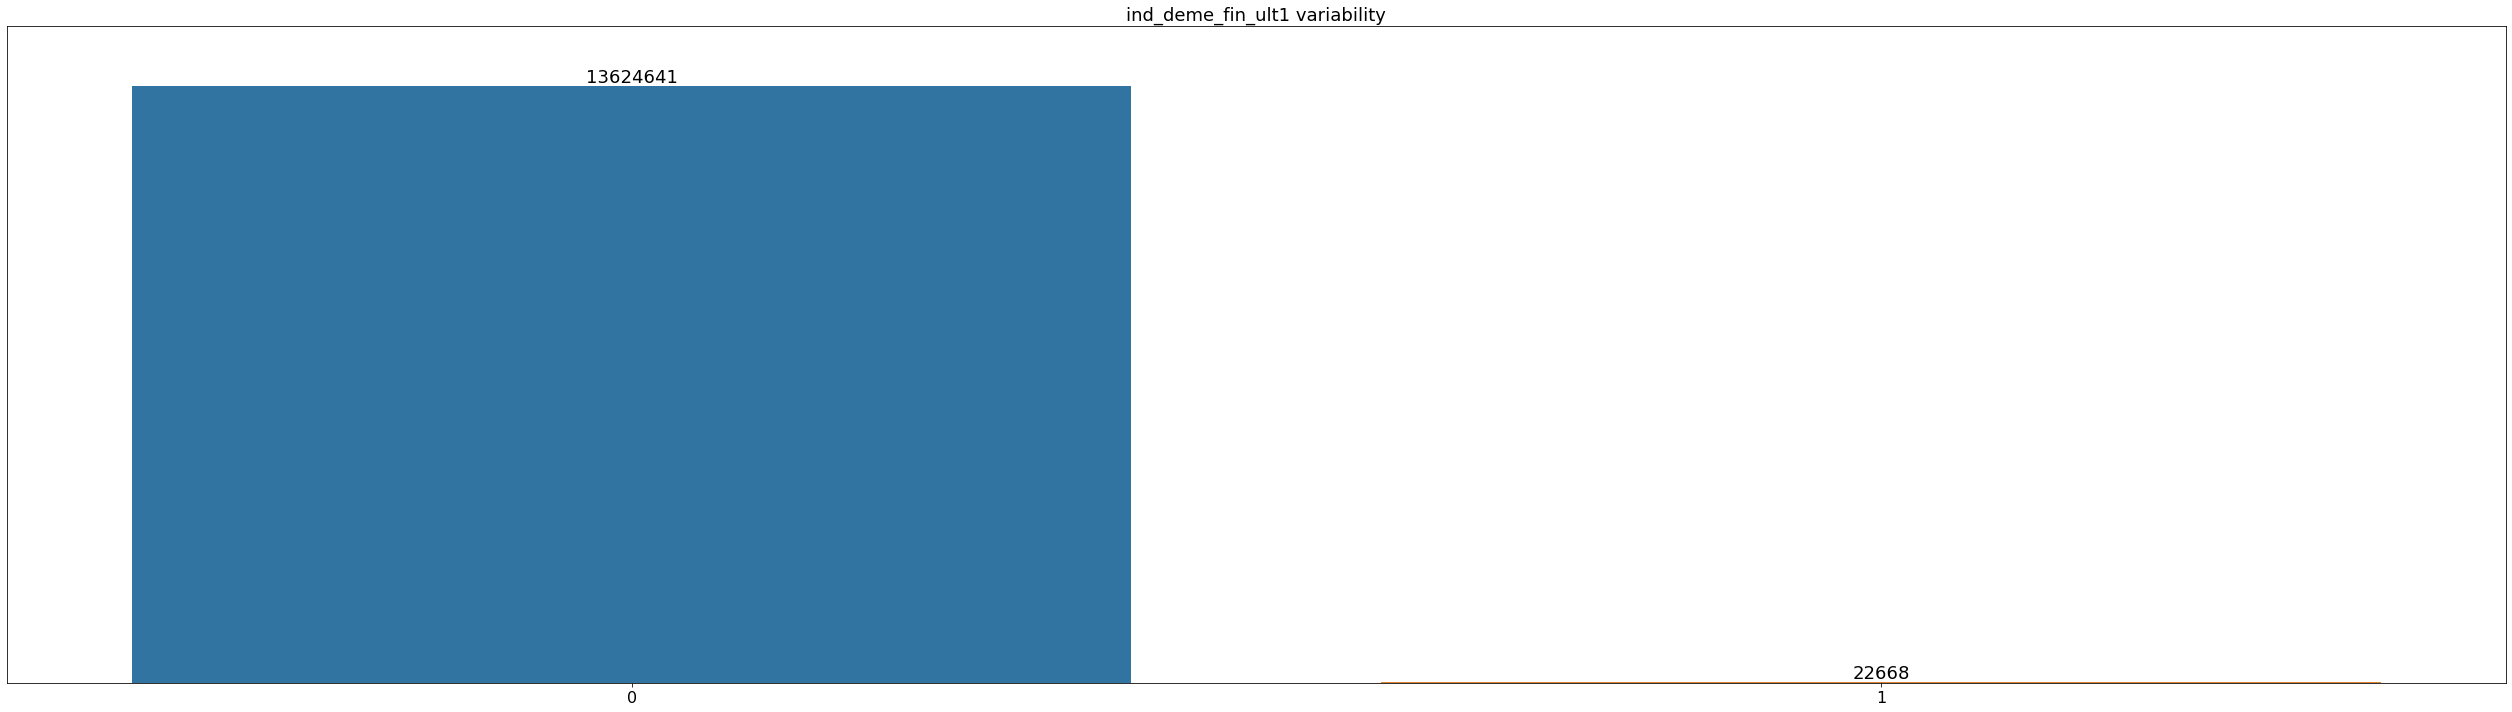

############### ind_dela_fin_ult1 ################


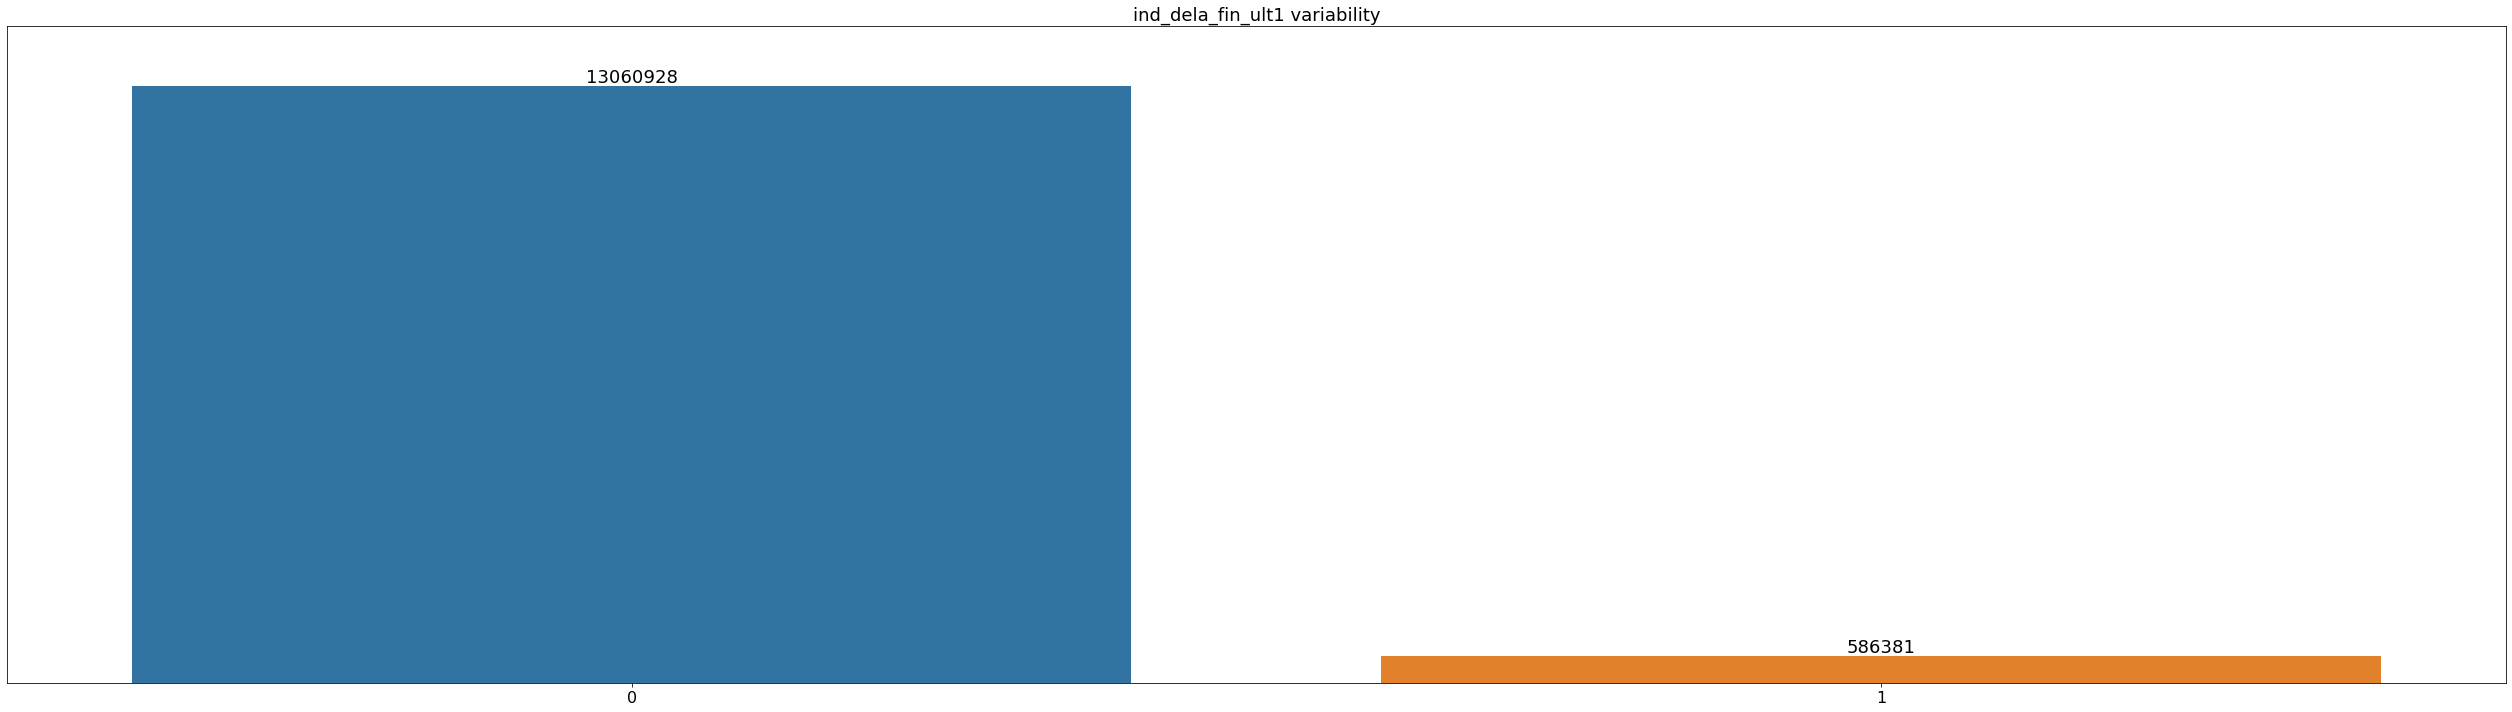

############### ind_ecue_fin_ult1 ################


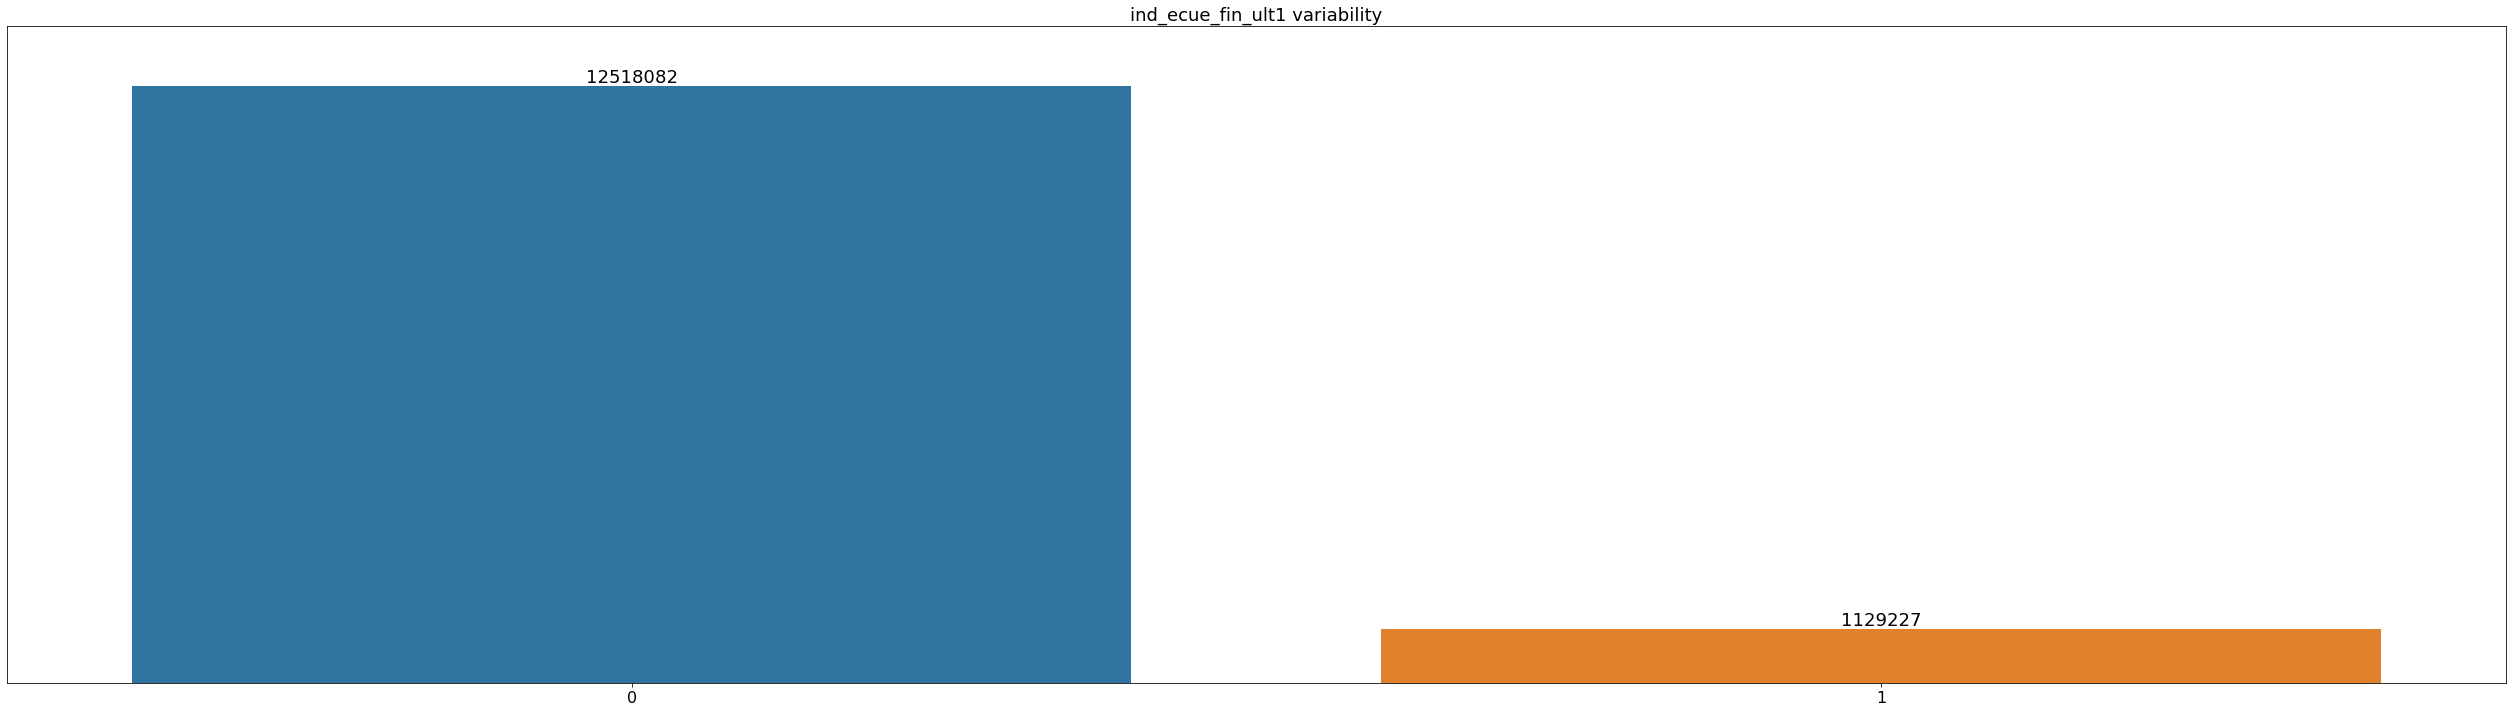

############### ind_fond_fin_ult1 ################


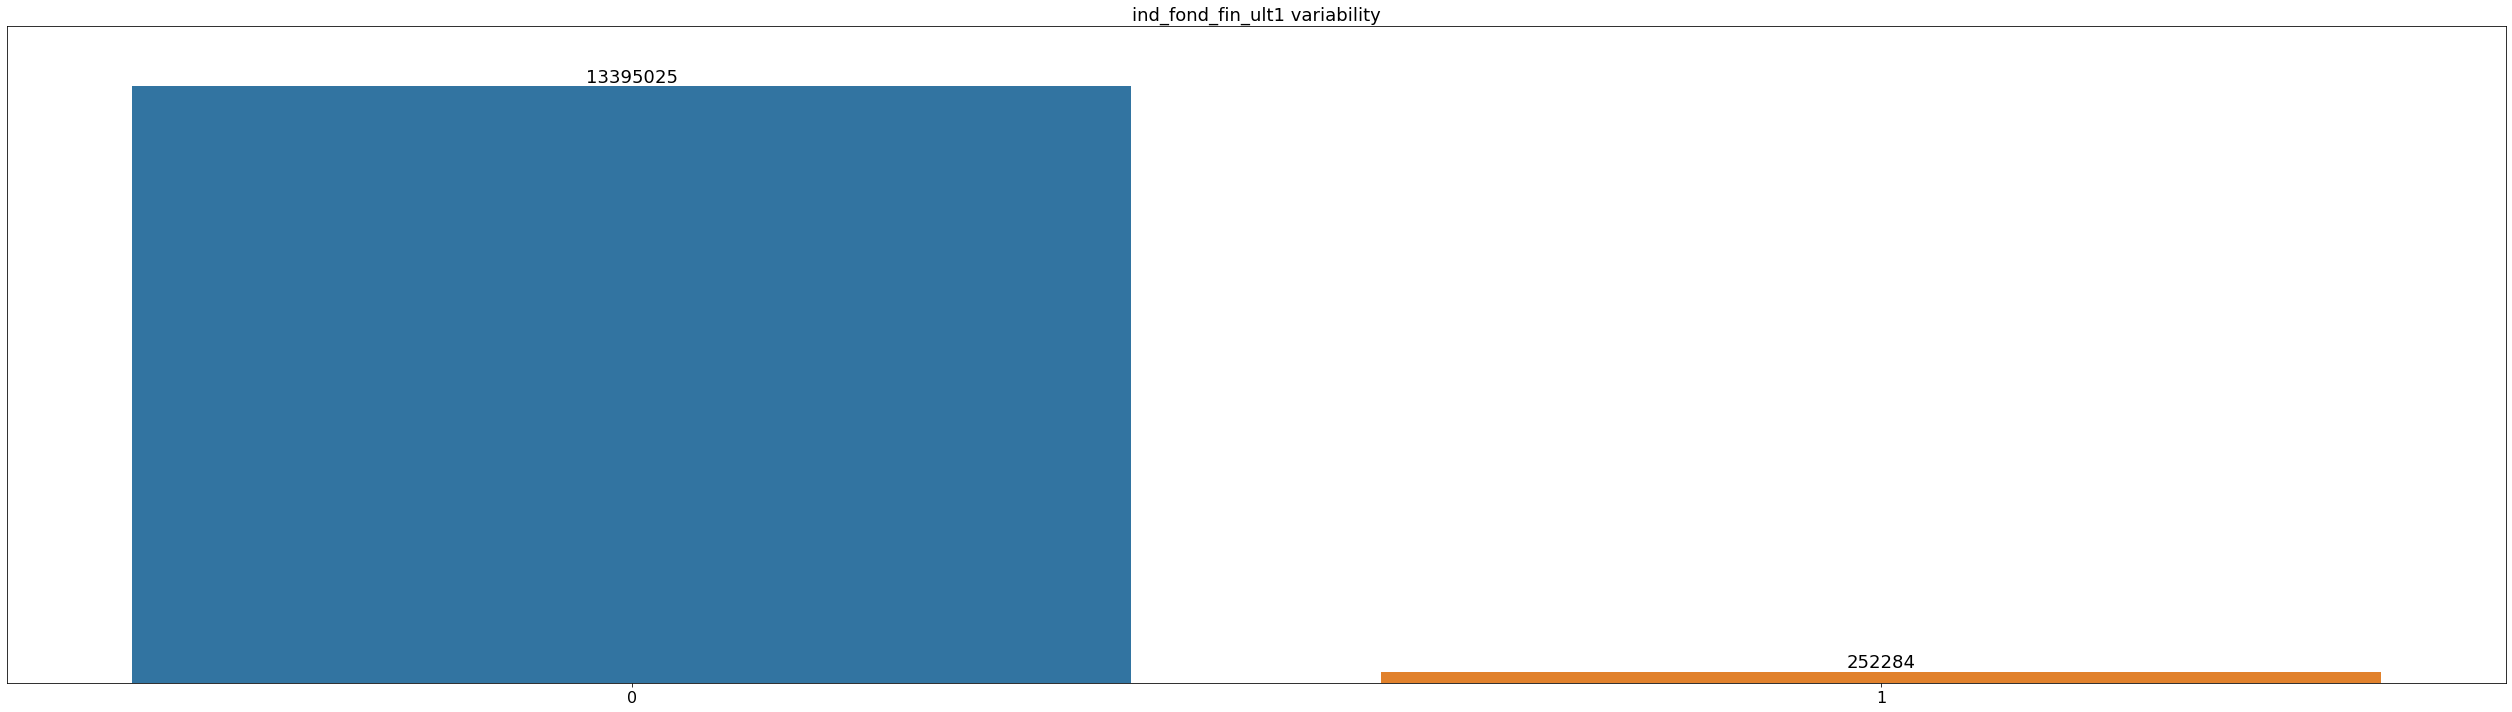

################ ind_hip_fin_ult1 ################


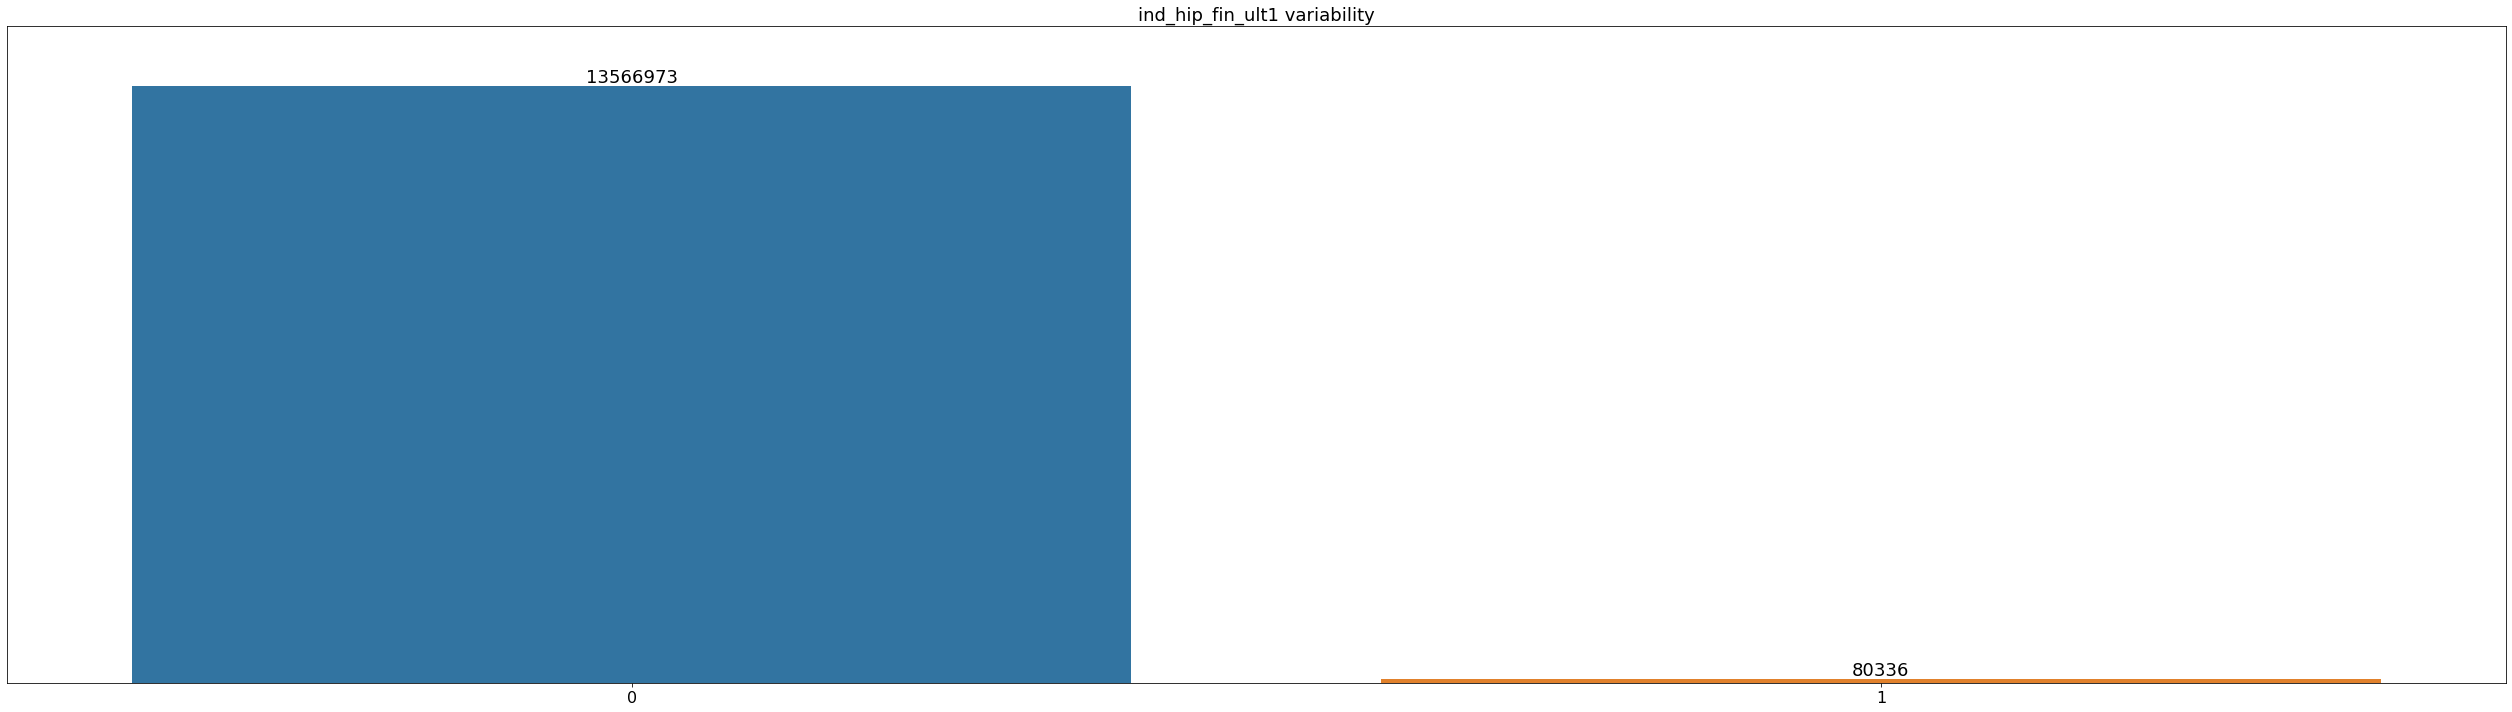

############### ind_plan_fin_ult1 ################


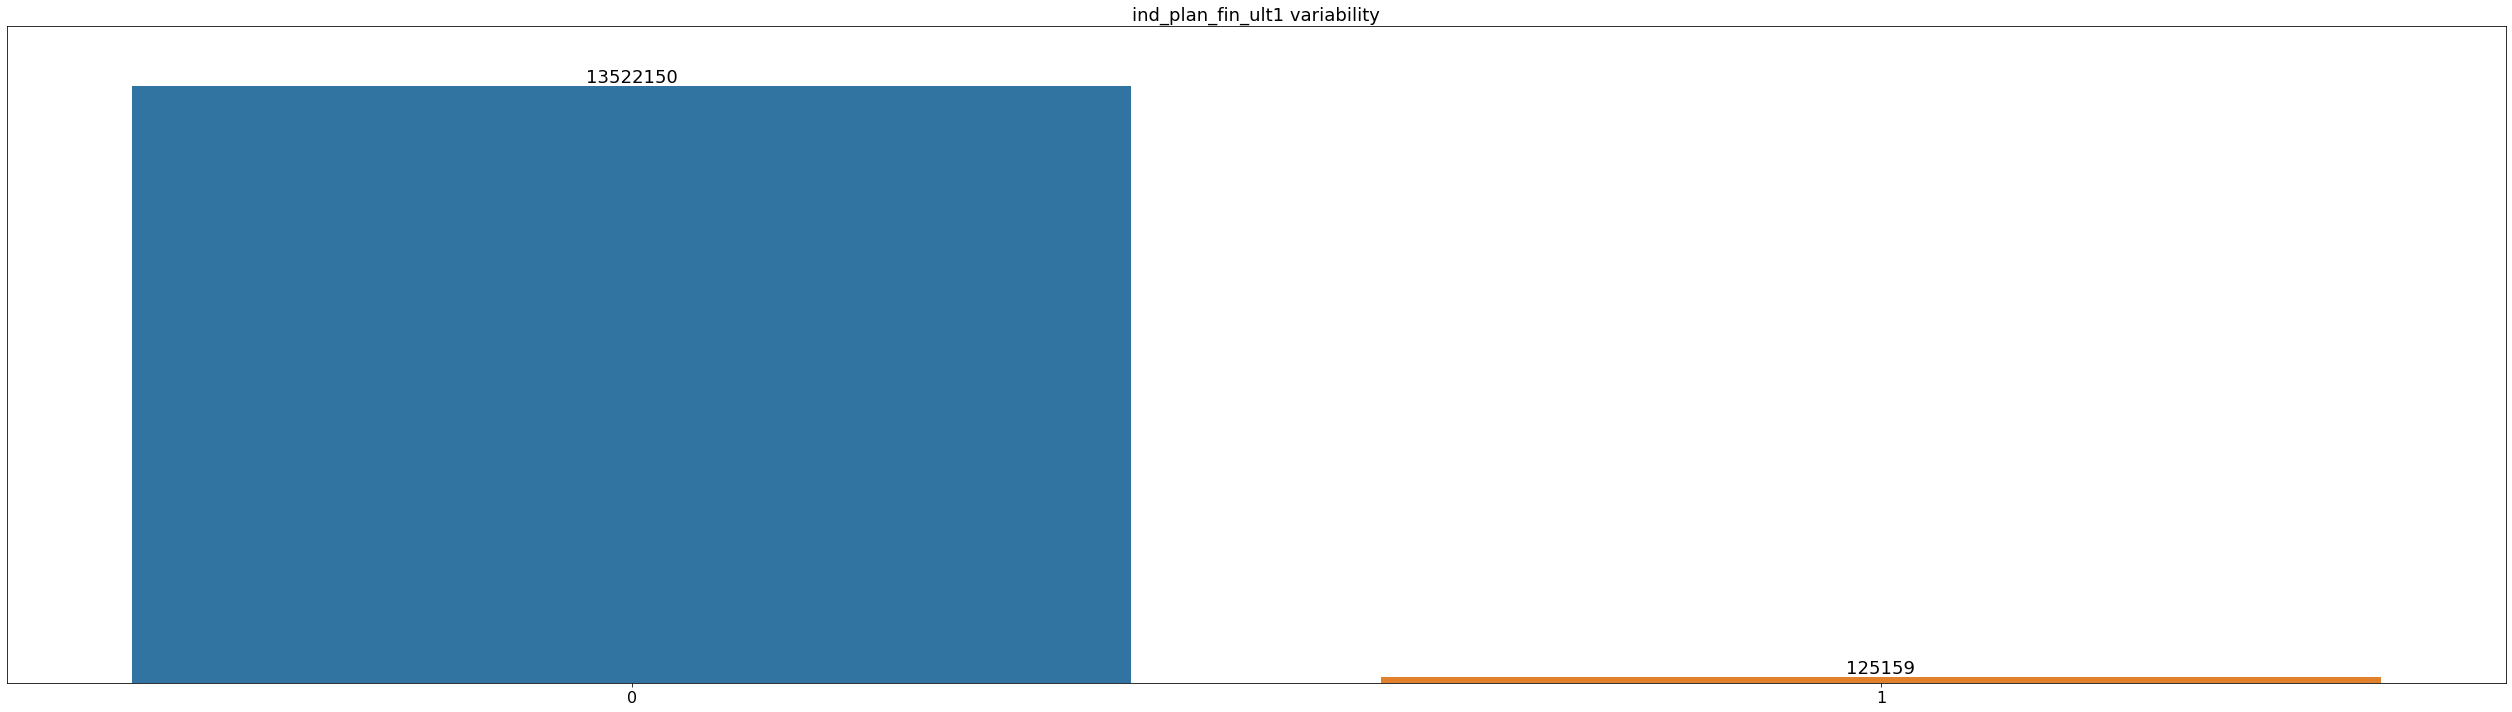

############### ind_pres_fin_ult1 ################


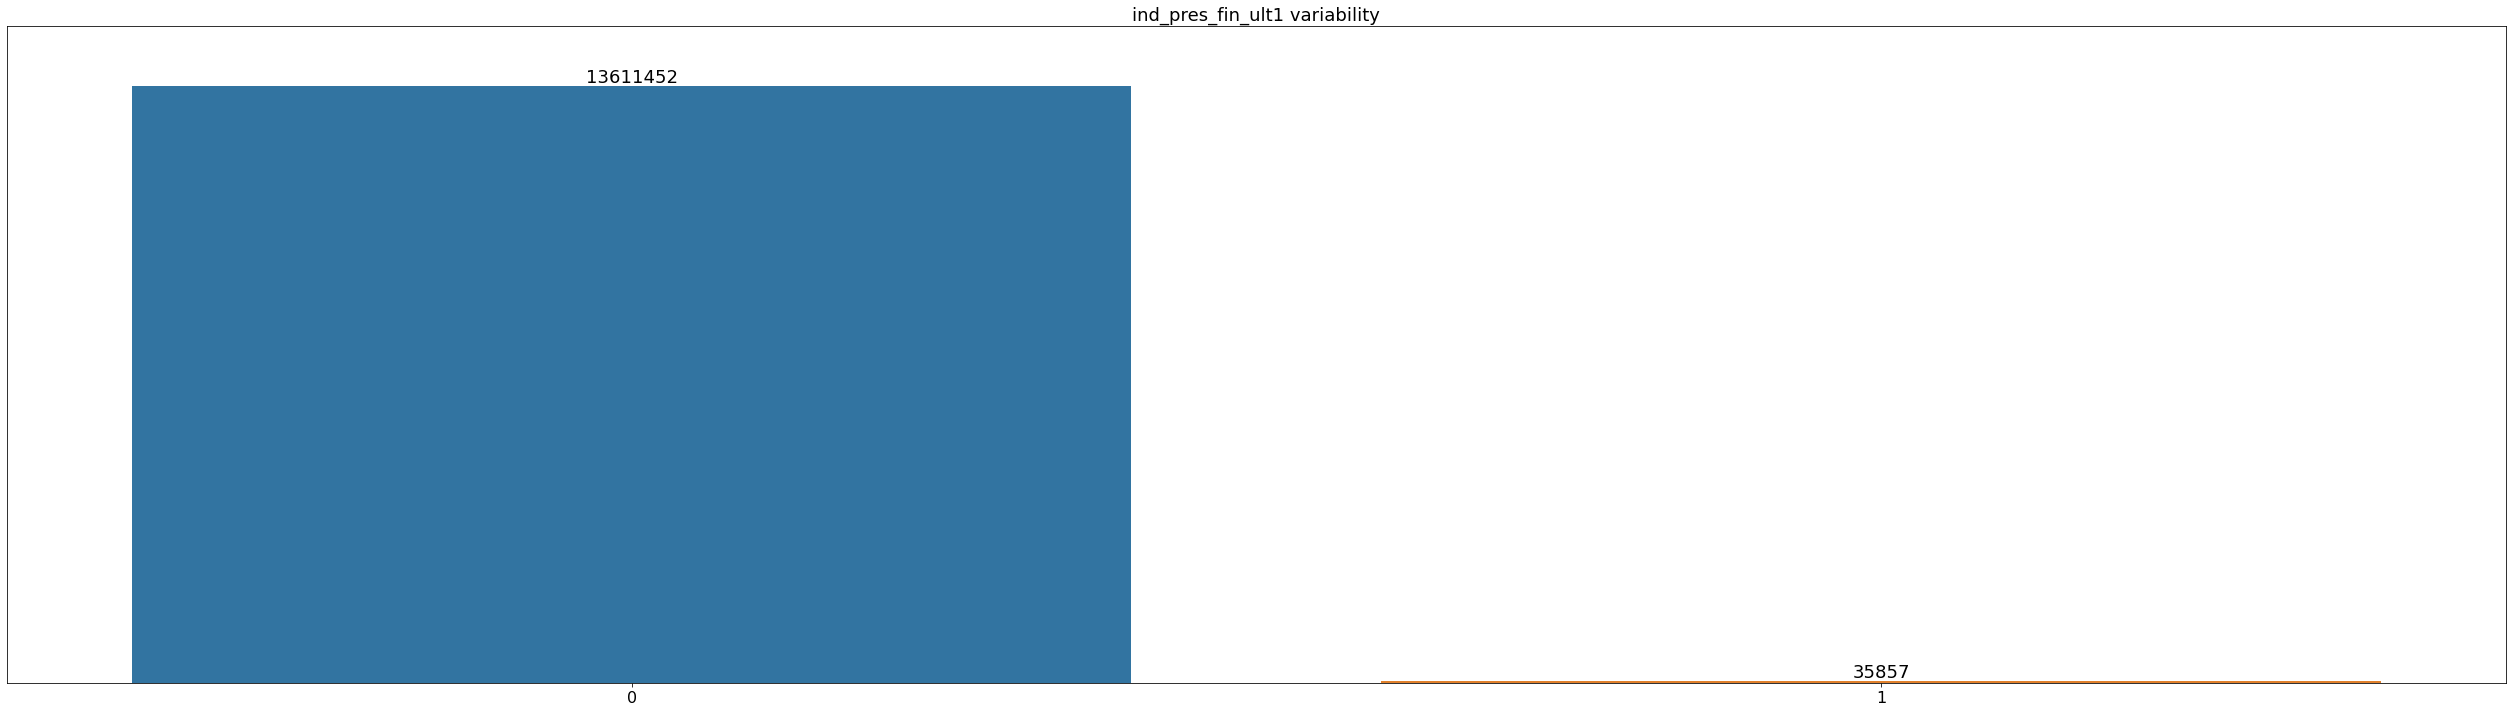

############### ind_reca_fin_ult1 ################


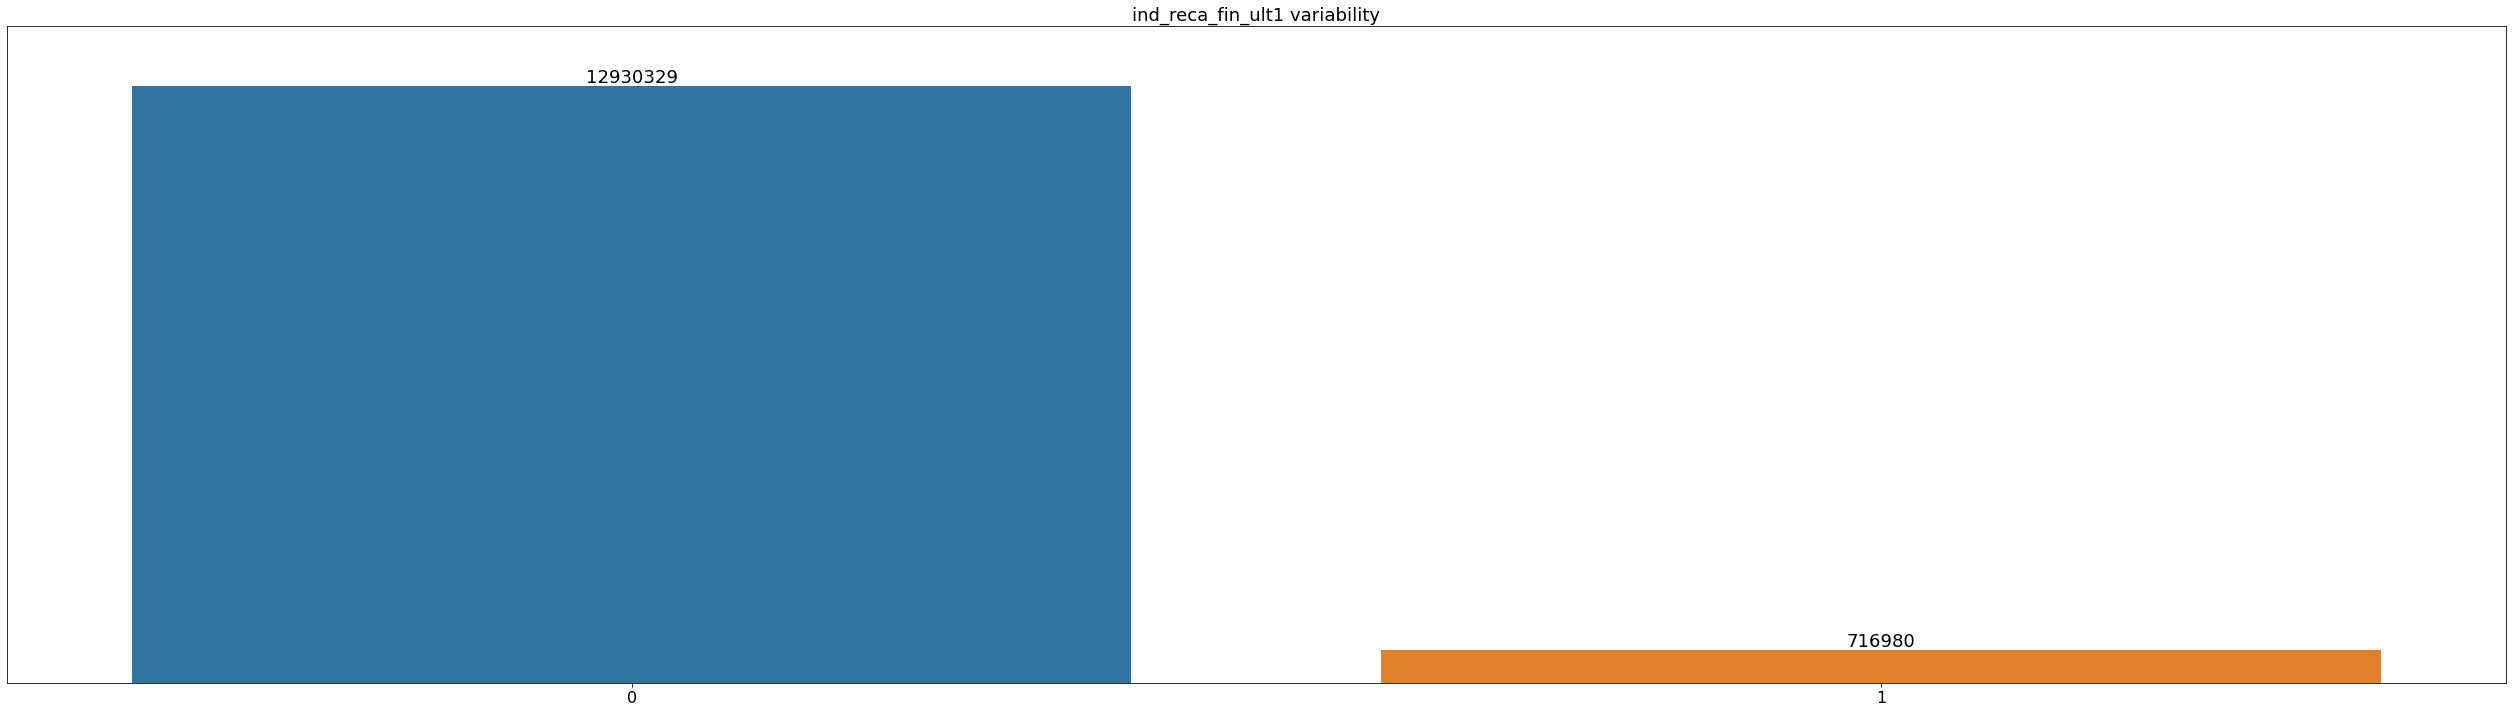

############### ind_tjcr_fin_ult1 ################


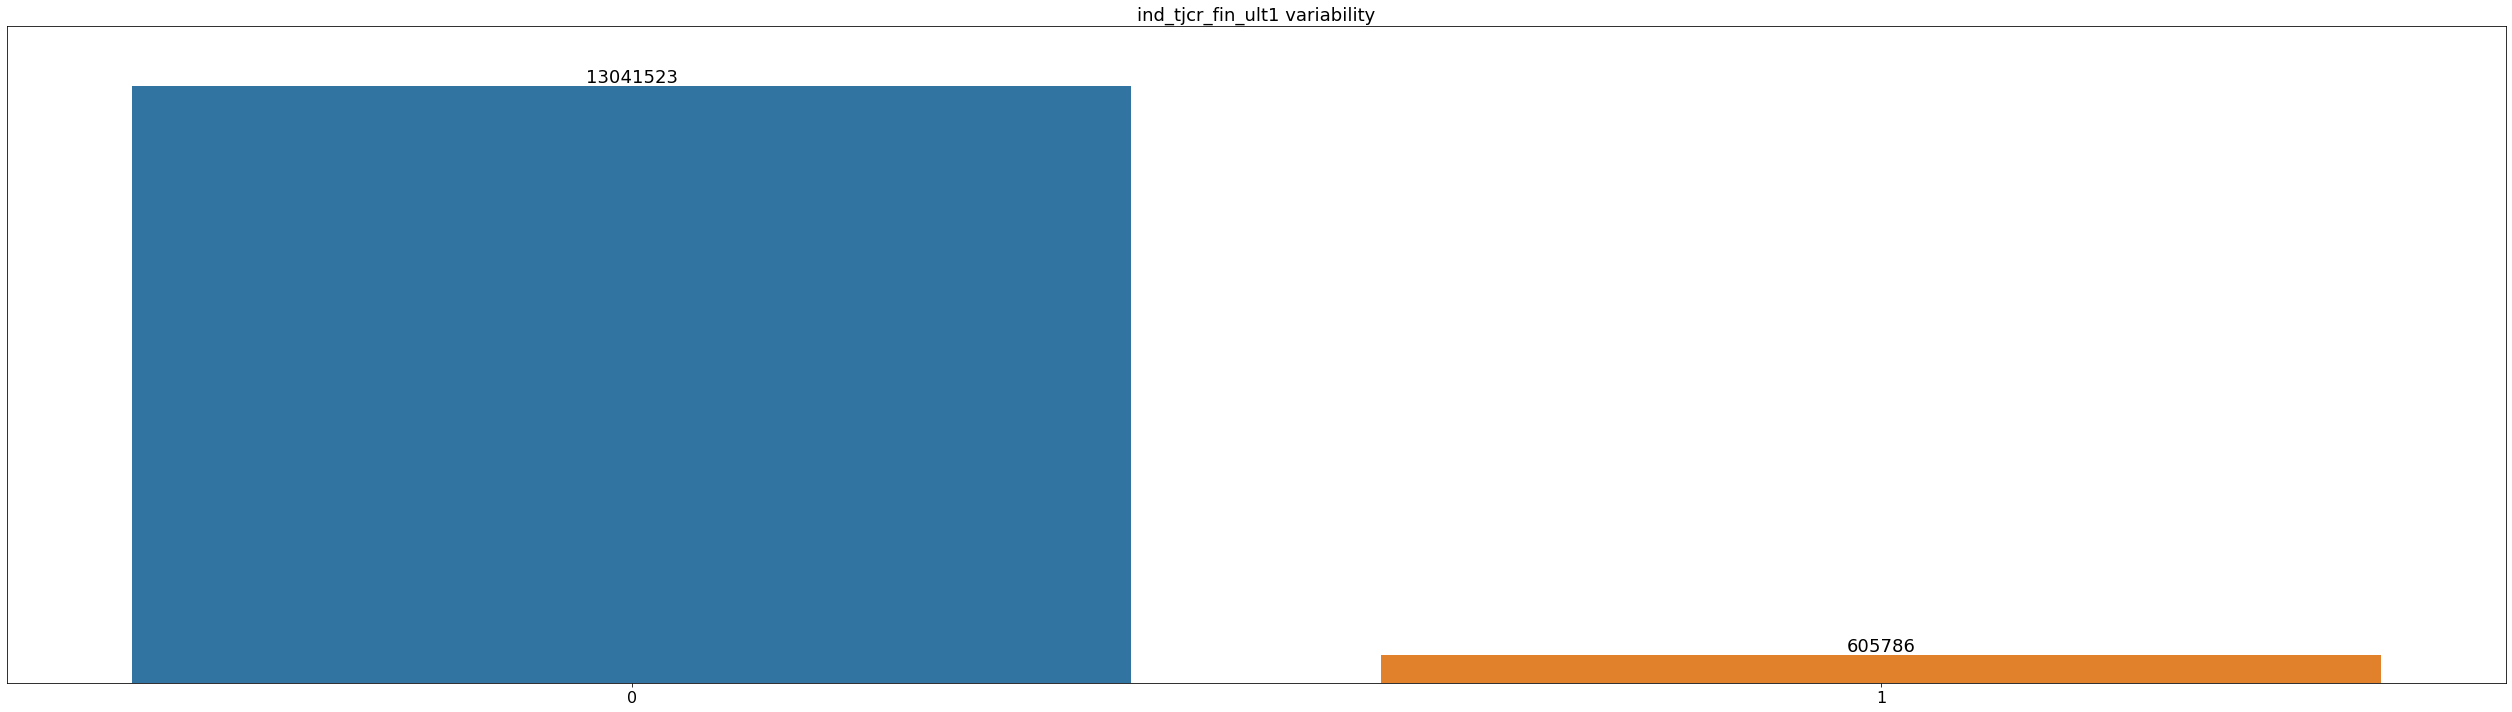

############### ind_valo_fin_ult1 ################


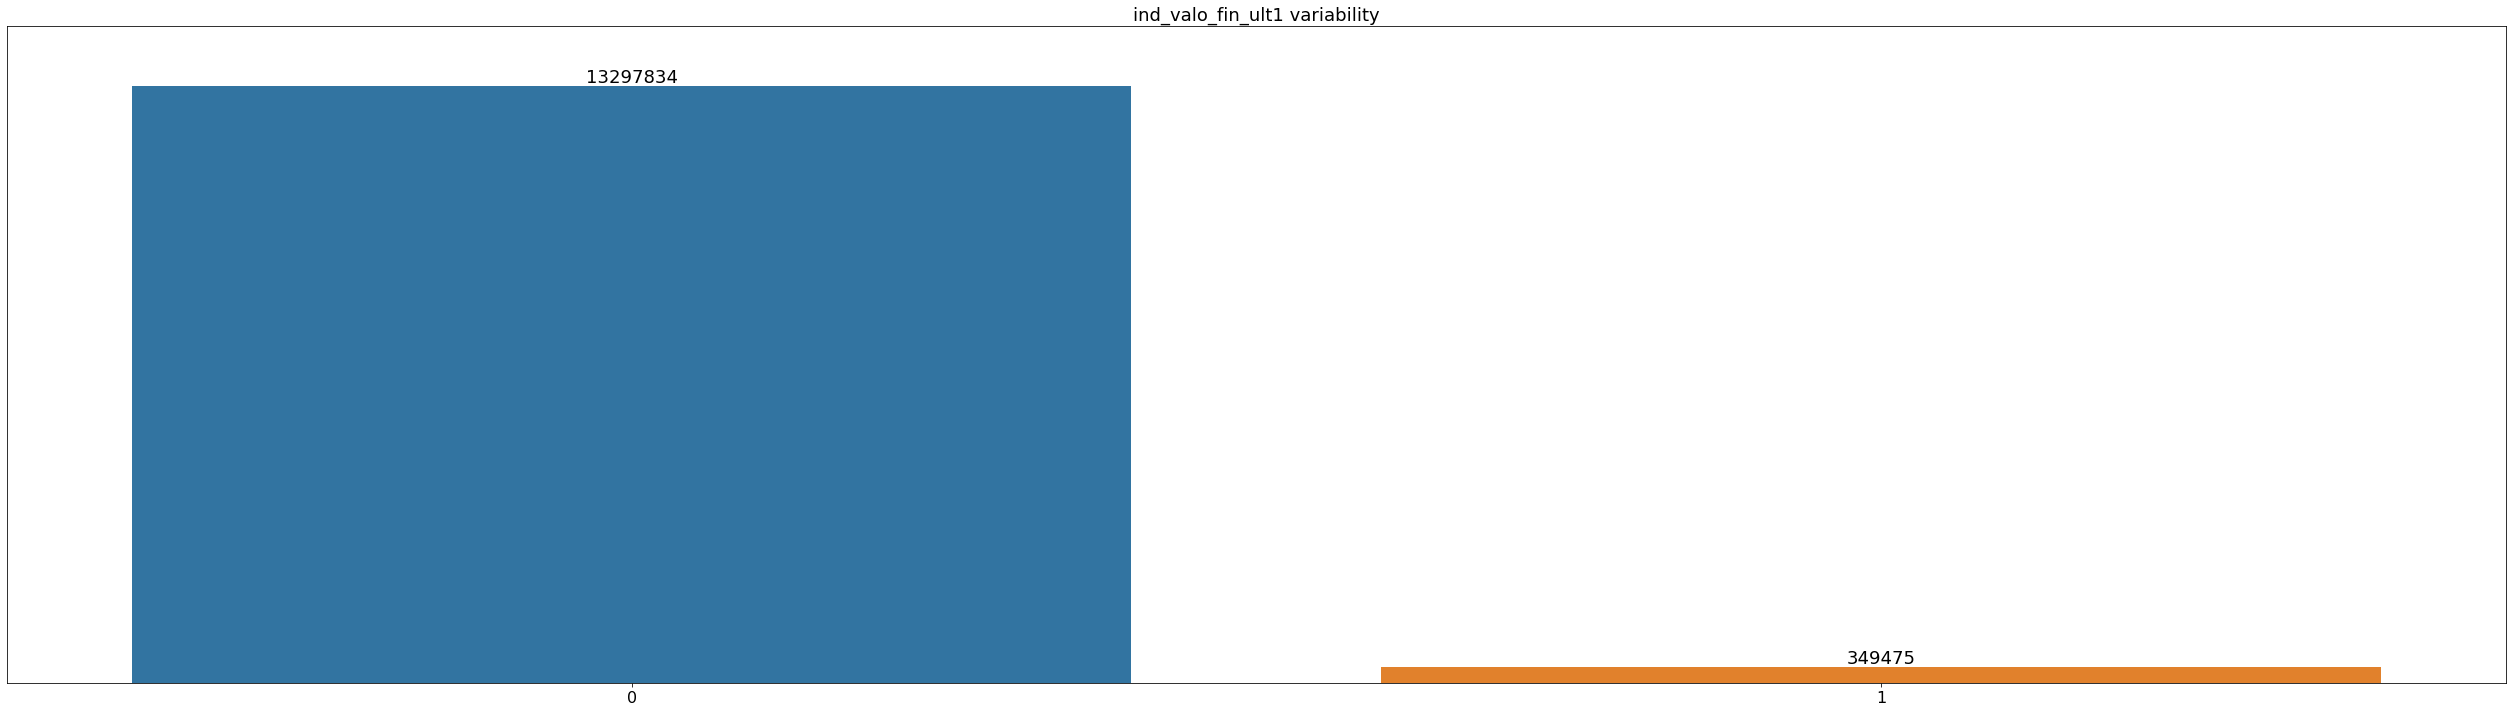

################ ind_viv_fin_ult1 ################


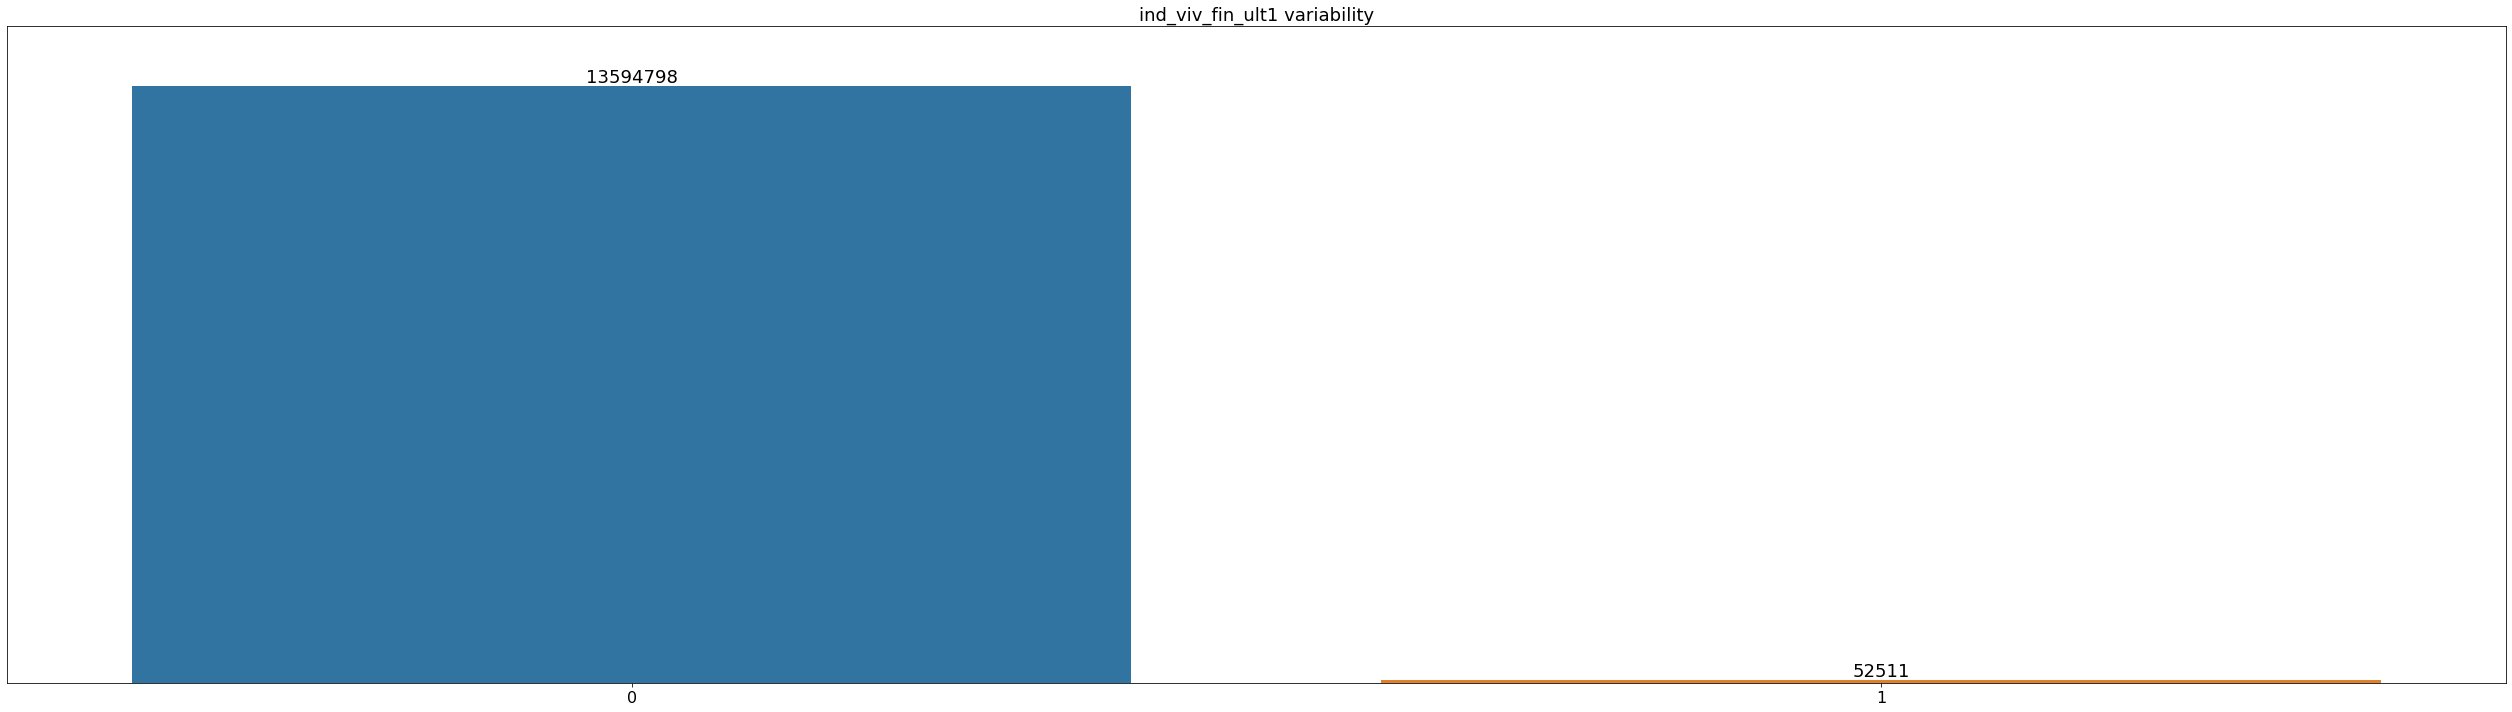

################ ind_nomina_ult1 #################


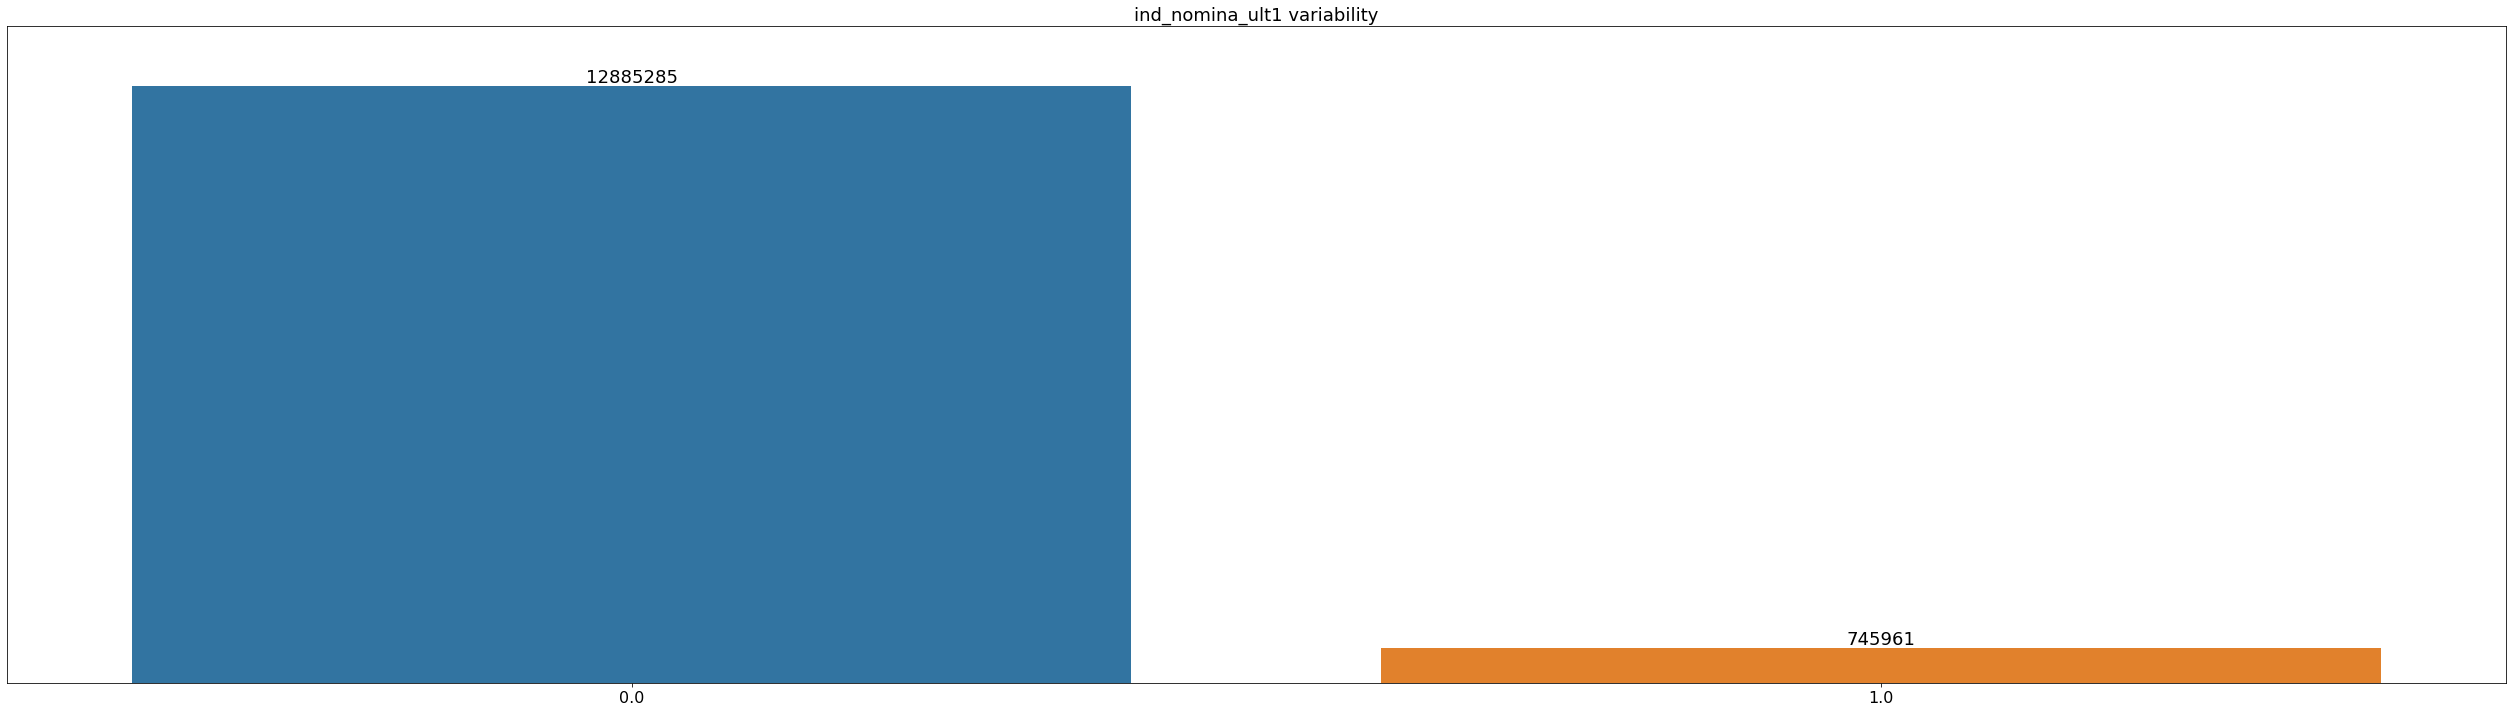

############### ind_nom_pens_ult1 ################


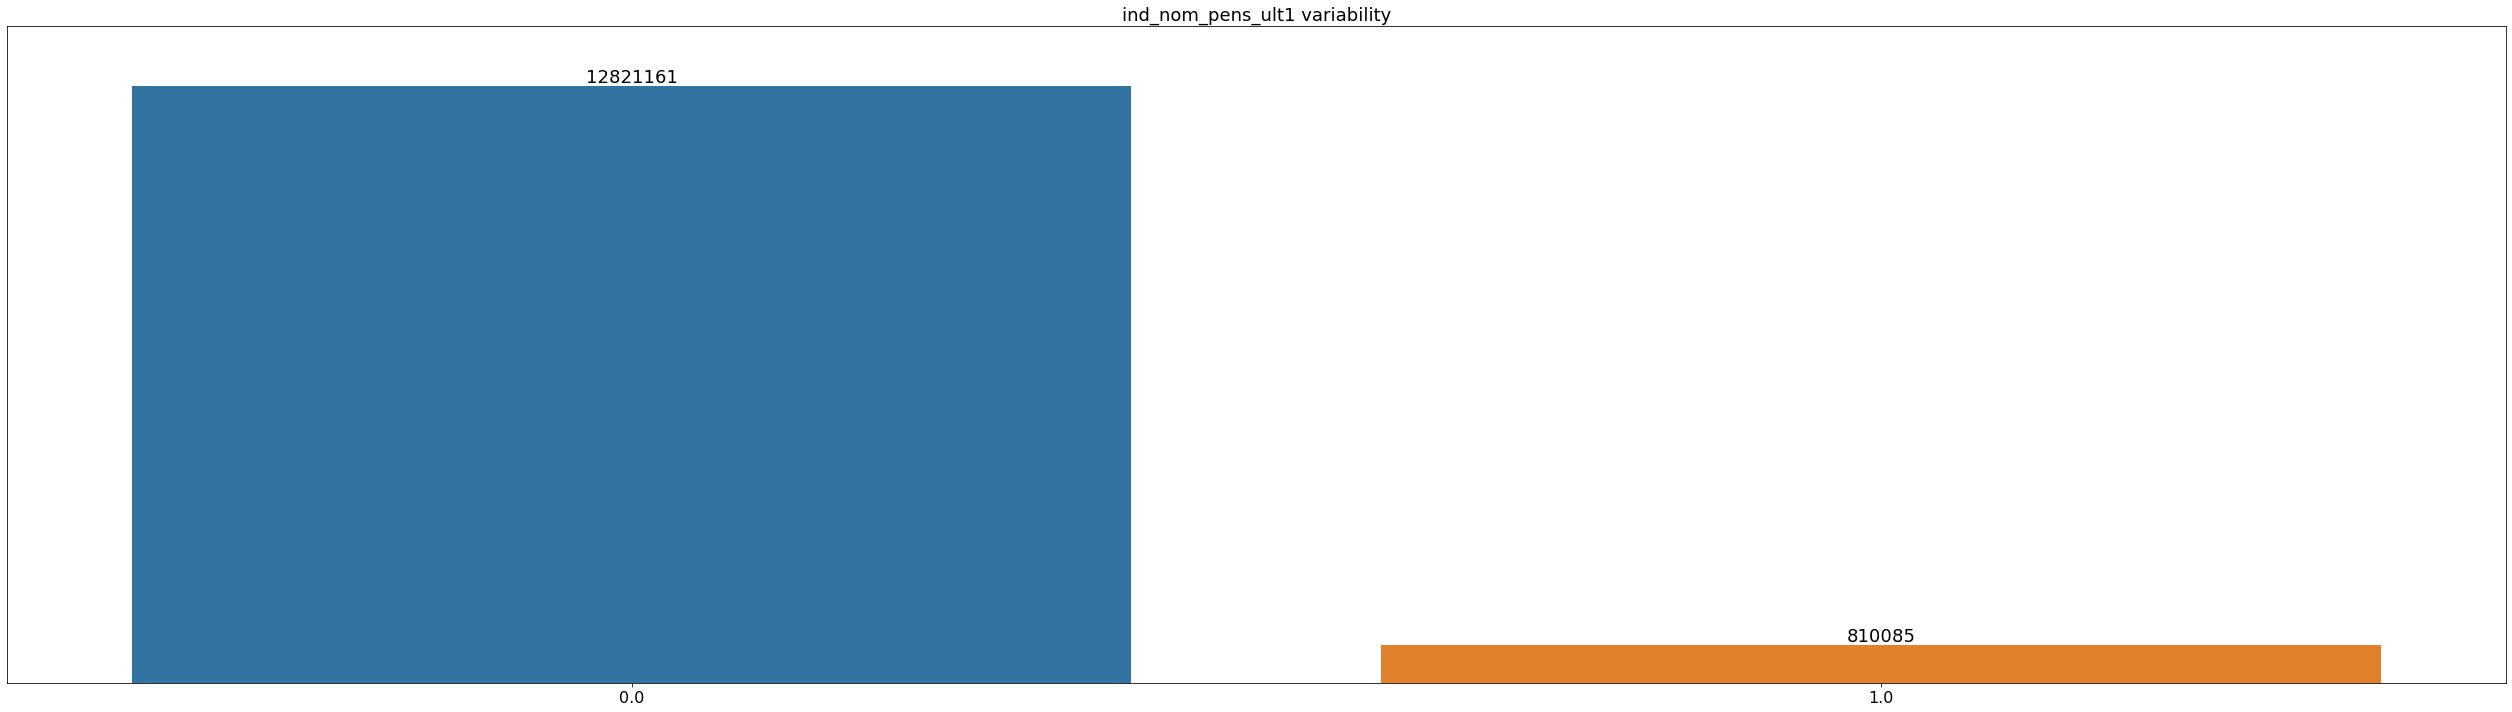

################ ind_recibo_ult1 #################


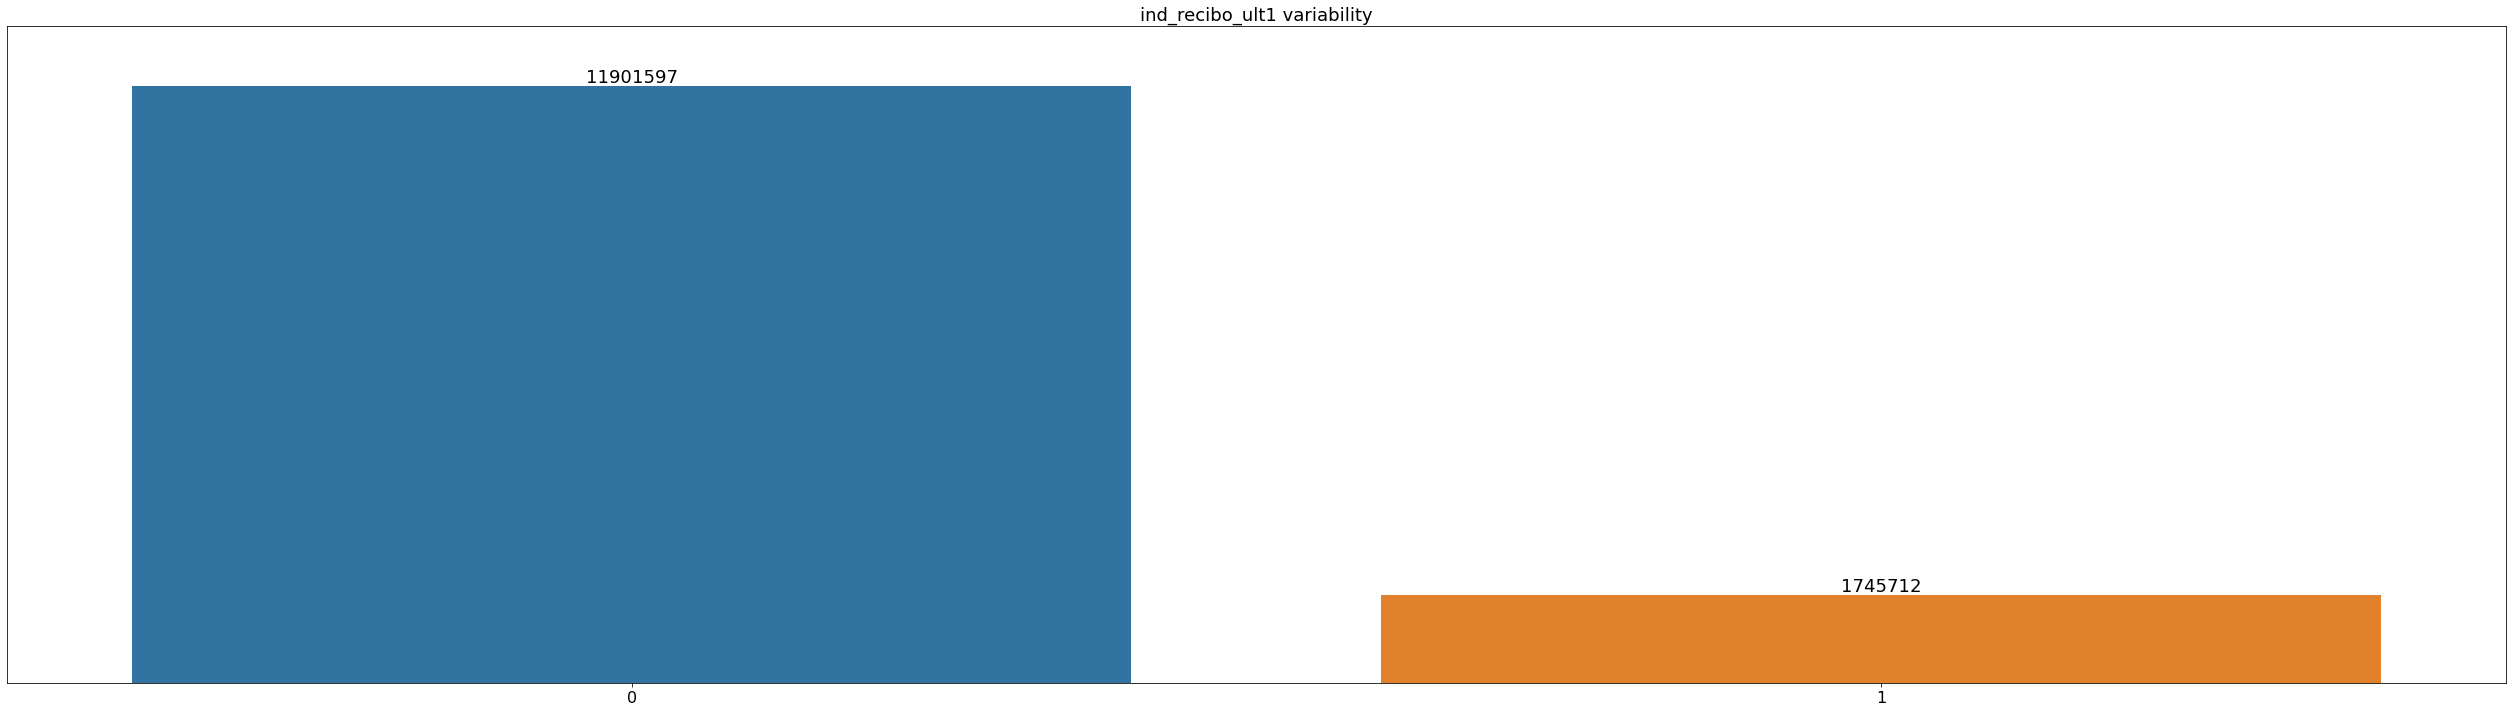

In [5]:
##### Now I check variability of some columns

columns = list(df)
for delete in ['fecha_dato','ncodpers','pais_residencia','fecha_alta','renta']:
    columns.remove(delete)
    
for col in columns:
    print(f' {col} '.center(50,'#'))
    countplot(col, values = True)

# Data Cleaning

In [9]:
##### Filtered by only currently active clients and from Spain
# I also filtered to obtain clients with information of whole 17 months (1 year and 4 months because 18th month
# is the one I'll try to predict) from users
# Number of persons ≠ number of transactions!

df = df.query('ind_actividad_cliente == 1')
df = df.query('pais_residencia == "ES"')
info_17 = df.ncodpers.value_counts()[df.ncodpers.value_counts()==17].index
df = df[df['ncodpers'].isin(info_17)].reset_index(drop = True)
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050617,N,ES,H,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050623,N,ES,H,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050626,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050610,N,ES,V,24,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129065,2016-05-28,1166741,N,ES,H,22,2013-08-14,0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5129066,2016-05-28,1166759,N,ES,H,22,2013-08-14,0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5129067,2016-05-28,1166761,N,ES,H,23,2013-08-14,0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5129068,2016-05-28,1166778,N,ES,V,23,2013-08-14,0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [10]:
##### Check % of NaNs of each column of the sataset

for col in df.columns:
    print(col, '=','{:.2%}'.format(df[col].isna().sum() / df.shape[0]))

fecha_dato = 0.00%
ncodpers = 0.00%
ind_empleado = 0.00%
pais_residencia = 0.00%
sexo = 0.00%
age = 0.00%
fecha_alta = 0.00%
ind_nuevo = 0.00%
antiguedad = 0.00%
indrel = 0.00%
ult_fec_cli_1t = 100.00%
indrel_1mes = 0.00%
tiprel_1mes = 0.00%
indresi = 0.00%
indext = 0.00%
conyuemp = 99.97%
canal_entrada = 0.00%
indfall = 0.00%
tipodom = 0.00%
cod_prov = 0.00%
nomprov = 0.00%
ind_actividad_cliente = 0.00%
renta = 14.77%
segmento = 0.00%
ind_ahor_fin_ult1 = 0.00%
ind_aval_fin_ult1 = 0.00%
ind_cco_fin_ult1 = 0.00%
ind_cder_fin_ult1 = 0.00%
ind_cno_fin_ult1 = 0.00%
ind_ctju_fin_ult1 = 0.00%
ind_ctma_fin_ult1 = 0.00%
ind_ctop_fin_ult1 = 0.00%
ind_ctpp_fin_ult1 = 0.00%
ind_deco_fin_ult1 = 0.00%
ind_deme_fin_ult1 = 0.00%
ind_dela_fin_ult1 = 0.00%
ind_ecue_fin_ult1 = 0.00%
ind_fond_fin_ult1 = 0.00%
ind_hip_fin_ult1 = 0.00%
ind_plan_fin_ult1 = 0.00%
ind_pres_fin_ult1 = 0.00%
ind_reca_fin_ult1 = 0.00%
ind_tjcr_fin_ult1 = 0.00%
ind_valo_fin_ult1 = 0.00%
ind_viv_fin_ult1 = 0.00%
ind_nomina_ult1 = 

In [120]:
##### Creation of two variables date-time related
# Customers are more likely to buy products at certain months of the year (seasonality)

df['fecha_dato'] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df['fecha_alta'] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")

df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["year_month"] = df["fecha_dato"].apply(lambda x: str(x.year) + '_' + str(x.month))

In [12]:
##### Two columns has a big number of NaNs that will cause NaNs-imputation problems so I delete them

print('Before:',df.shape)
for col in ['ult_fec_cli_1t','conyuemp']:
    del df[col]
print('After:',df.shape)

Before: (5129070, 49)
After: (5129070, 47)


In [13]:
##### Then I delete rows where sexo, canal_entrada, segmento or nomprov values are NaN

print('Before:',df.shape)
for col in ['sexo','canal_entrada','segmento','nomprov']:
    df.dropna(axis = 0, subset = [col], inplace = True)
    
df.reset_index(drop = True, inplace = True)
print('After:',df.shape)

Before: (5129070, 47)
After: (5128898, 47)


In [14]:
##### I delete some columns that don't seem relevant to the model

print('Before:',df.shape)
features_deleted = ["cod_prov",'ind_actividad_cliente',"indrel_1mes",'indresi',"tipodom","ind_empleado",
                    "pais_residencia","indrel","indext","indfall","ind_nuevo"]

df.drop(features_deleted, axis = "columns", inplace = True)
print('After:',df.shape)

Before: (5128898, 47)
After: (5128898, 36)


In [15]:
##### I also delete the products that nobody buys

print('Before:',df.shape)
features_deleted = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cder_fin_ult1','ind_ctju_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
                    'ind_pres_fin_ult1','ind_viv_fin_ult1']

df.drop(features_deleted, axis = "columns", inplace = True)
print('After:',df.shape)

Before: (5128898, 36)
After: (5128898, 28)


In [16]:
##### Replace of missing values using most frequent imputation strategy

print(f'Nº of missing values before replacement: {df.isna().sum().sum()}')

col_imp = [col for col in df.columns if df[col].isna().sum() != 0]
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
for col in col_imp:
    df[col] = imputer.fit_transform(df[[col]])

print(f'Nº of missing values after replacement: {df.isna().sum().sum()}')

Nº of missing values before replacement: 757689
Nº of missing values after replacement: 0


In [17]:
##### Due to imputation strategy, I reapply previous filter to prevent unexpected values 

info_17 = df.ncodpers.value_counts()[df.ncodpers.value_counts()==17].index
df = df[df['ncodpers'].isin(info_17)].reset_index(drop = True)
df

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,...,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
0,2015-01-28,1050614,V,23,2012-08-10,35,A,KHE,ZARAGOZA,451931.22,...,0,0,0,0,0,0,0.0,0.0,0,1
1,2015-01-28,1050617,H,23,2012-08-10,35,A,KHE,ZARAGOZA,113316.66,...,0,0,0,0,0,0,0.0,0.0,0,1
2,2015-01-28,1050623,H,23,2012-08-10,35,A,KHE,ZAMORA,113538.81,...,0,0,0,0,0,0,0.0,0.0,0,1
3,2015-01-28,1050626,V,23,2012-08-10,35,A,KHE,BARCELONA,451931.22,...,0,0,0,0,0,0,0.0,0.0,0,1
4,2015-01-28,1050610,V,24,2012-08-10,35,I,KHE,SALAMANCA,68318.46,...,0,0,0,0,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128674,2016-05-28,1166741,H,22,2013-08-14,33,A,KHE,VALLADOLID,40134.90,...,0,0,0,0,0,0,0.0,0.0,0,5
5128675,2016-05-28,1166759,H,22,2013-08-14,33,A,KHE,VALENCIA,161098.71,...,0,0,0,0,0,0,0.0,0.0,0,5
5128676,2016-05-28,1166761,H,23,2013-08-14,33,A,KHE,ZARAGOZA,451931.22,...,0,0,0,0,0,0,0.0,0.0,0,5
5128677,2016-05-28,1166778,V,23,2013-08-14,33,A,KHE,ZARAGOZA,451931.22,...,0,0,0,0,0,0,0.0,0.0,0,5


In [18]:
##### Change of dtype of numeric columns to int32

int_col = ['age','ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
           'ind_fond_fin_ult1','ind_hip_fin_ult1', 'ind_plan_fin_ult1','ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1','ind_nomina_ult1',
           'ind_nom_pens_ult1','ind_recibo_ult1','antiguedad']

df[int_col] = df[int_col].astype('int32')

In [19]:
##### Filter to get clients without age outliers values

print('Before:',df.shape)
df = df.query('age >= 18 & age <= 100')
print('After:',df.shape)

Before: (5128679, 28)
After: (5048060, 28)


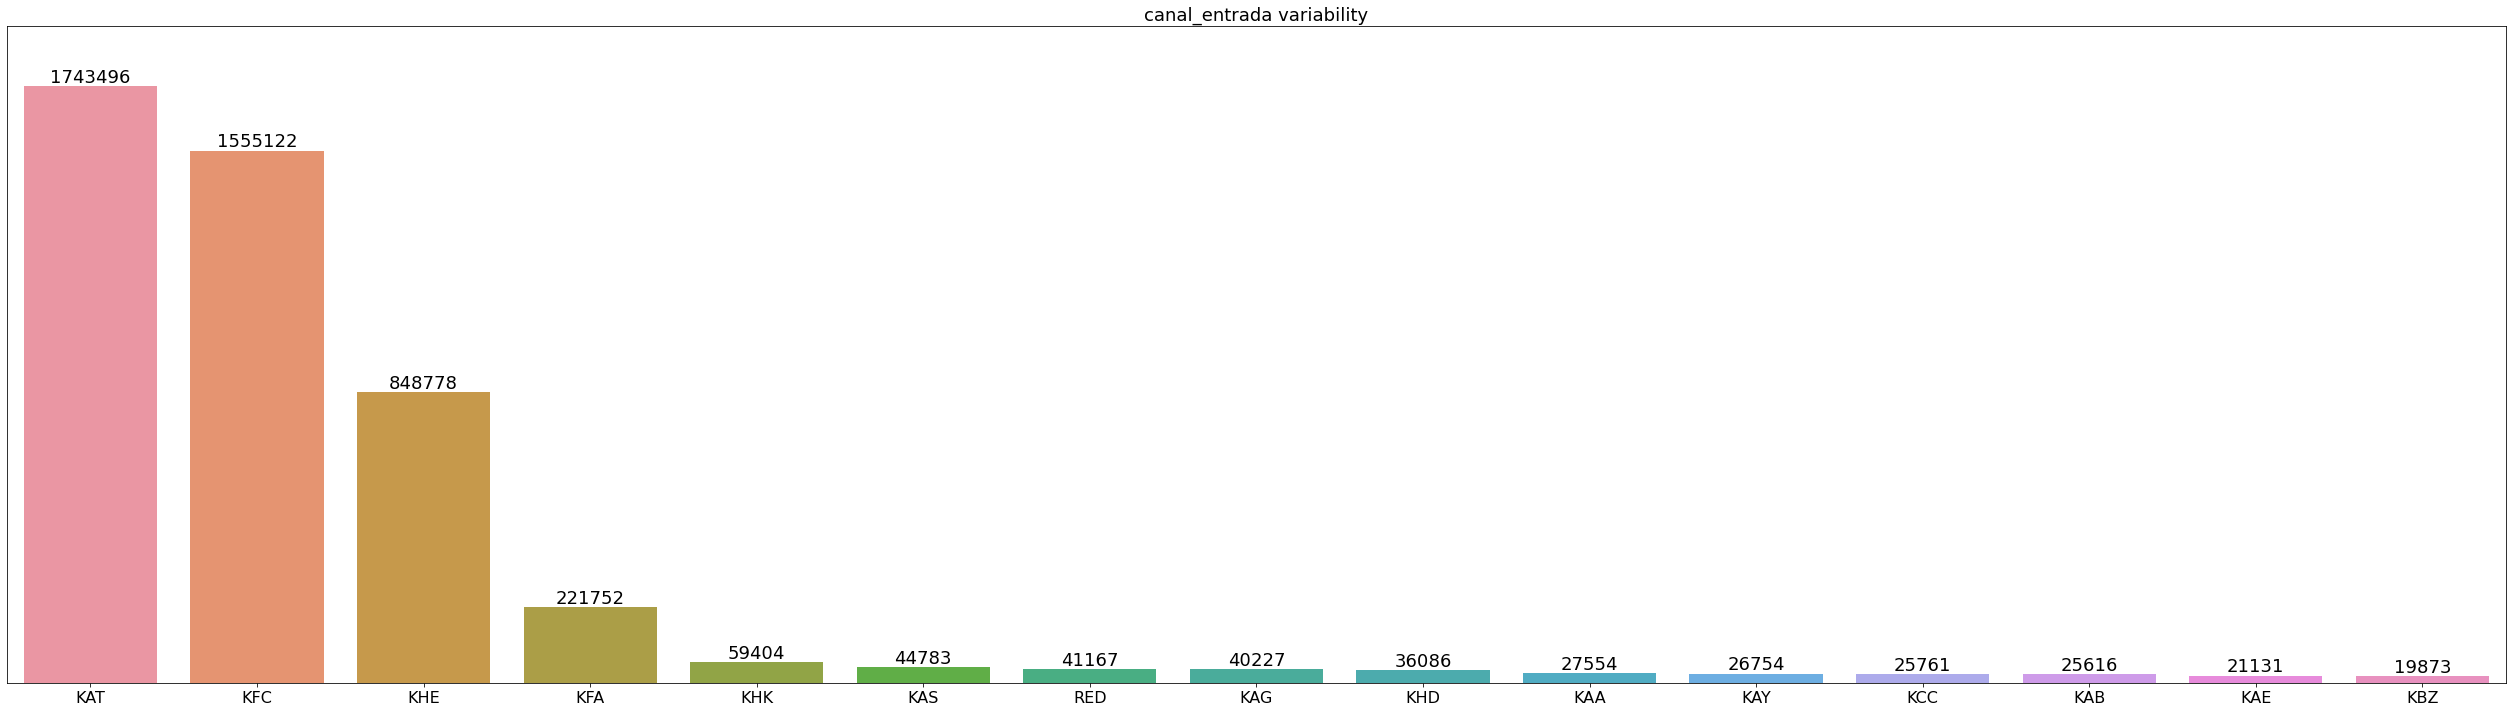

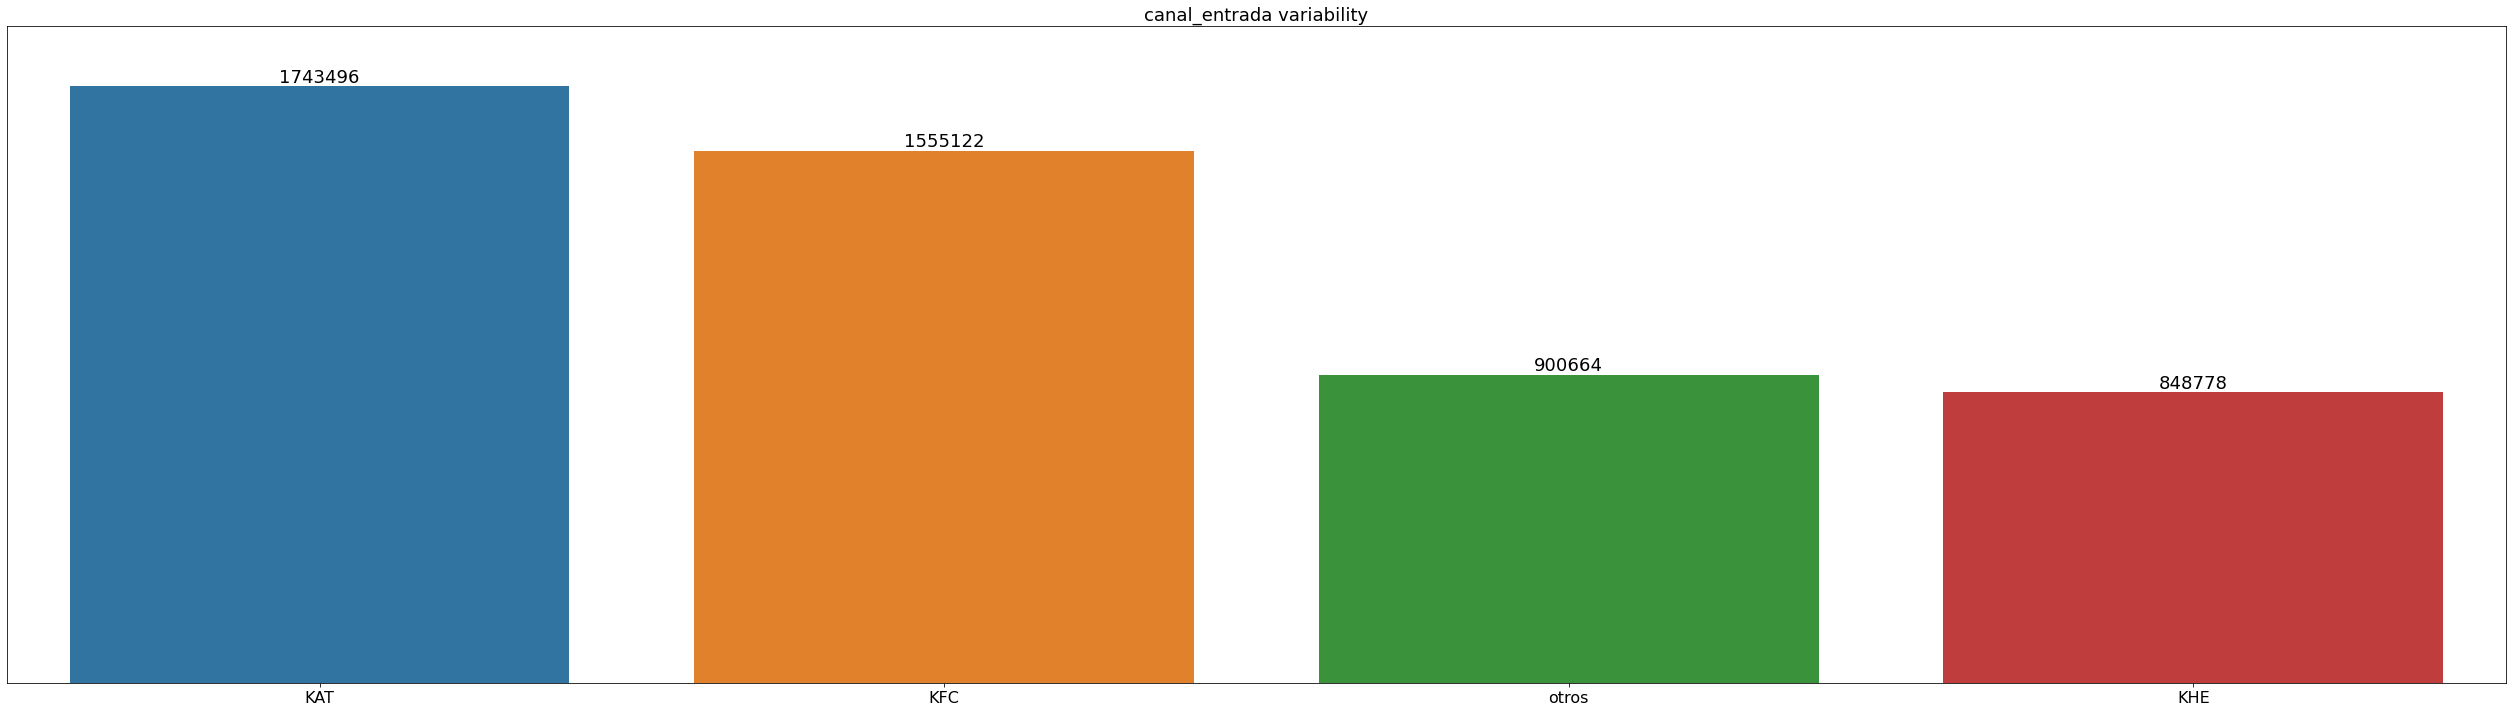

In [20]:
##### Binning of canal_entrada
# Keep only the 3 biggest values and convert the rest to the same unique group 'Others'

countplot('canal_entrada', values = True)

canal_entrada_values = list(df.canal_entrada.unique())
for col in ['KAT','KFC','KHE']:
    canal_entrada_values.remove(col)
df.canal_entrada = df.canal_entrada.replace(canal_entrada_values, 'otros')

countplot('canal_entrada', values = True)

# Brief Exploratory Data Analysis

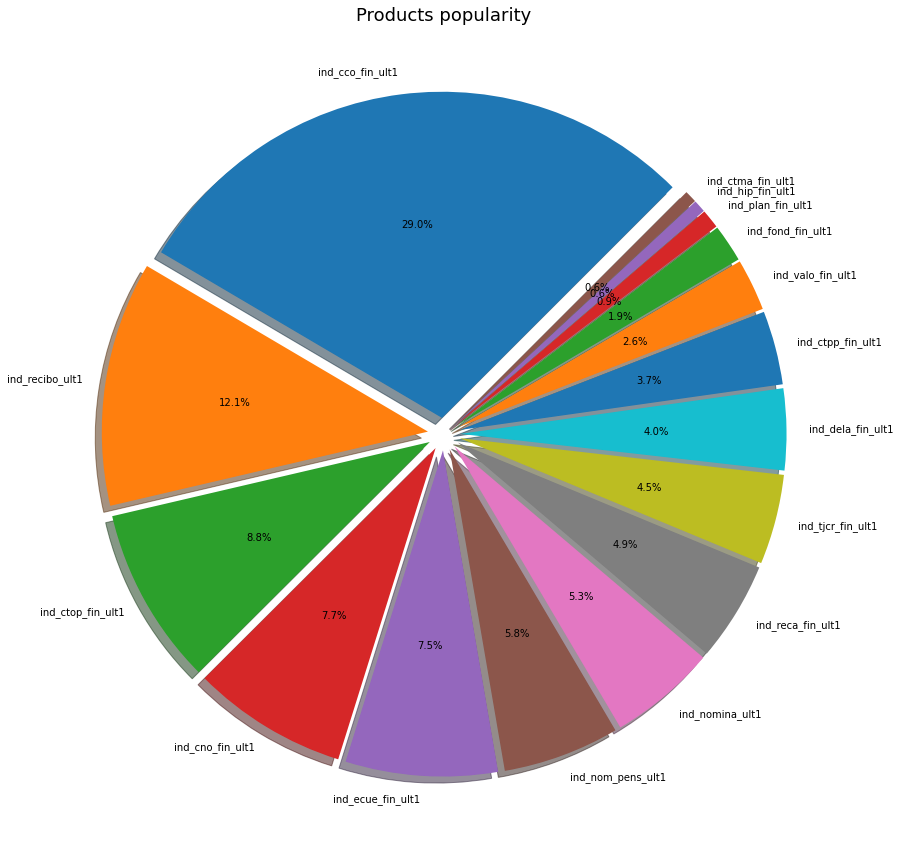

In [57]:
##### Products popularity

products_name = [i for i in list(df) if i.startswith('ind_')]
products_count = dict()
for col in products_name:
    products_count[col] = df[col].sum(axis=0)
products_count = dict(sorted(products_count.items(), key = lambda item: item[1], reverse=True))

plt.figure(figsize=(15, 15))
plt.title('Products popularity', fontsize = 18)
plt.pie(products_count.values(), labels = products_count.keys(), explode = [0.05 for i in range(len(products_count))],
        autopct='%.1f%%', shadow = True, labeldistance = 1.07, startangle = 45, rotatelabels = False)
plt.show()

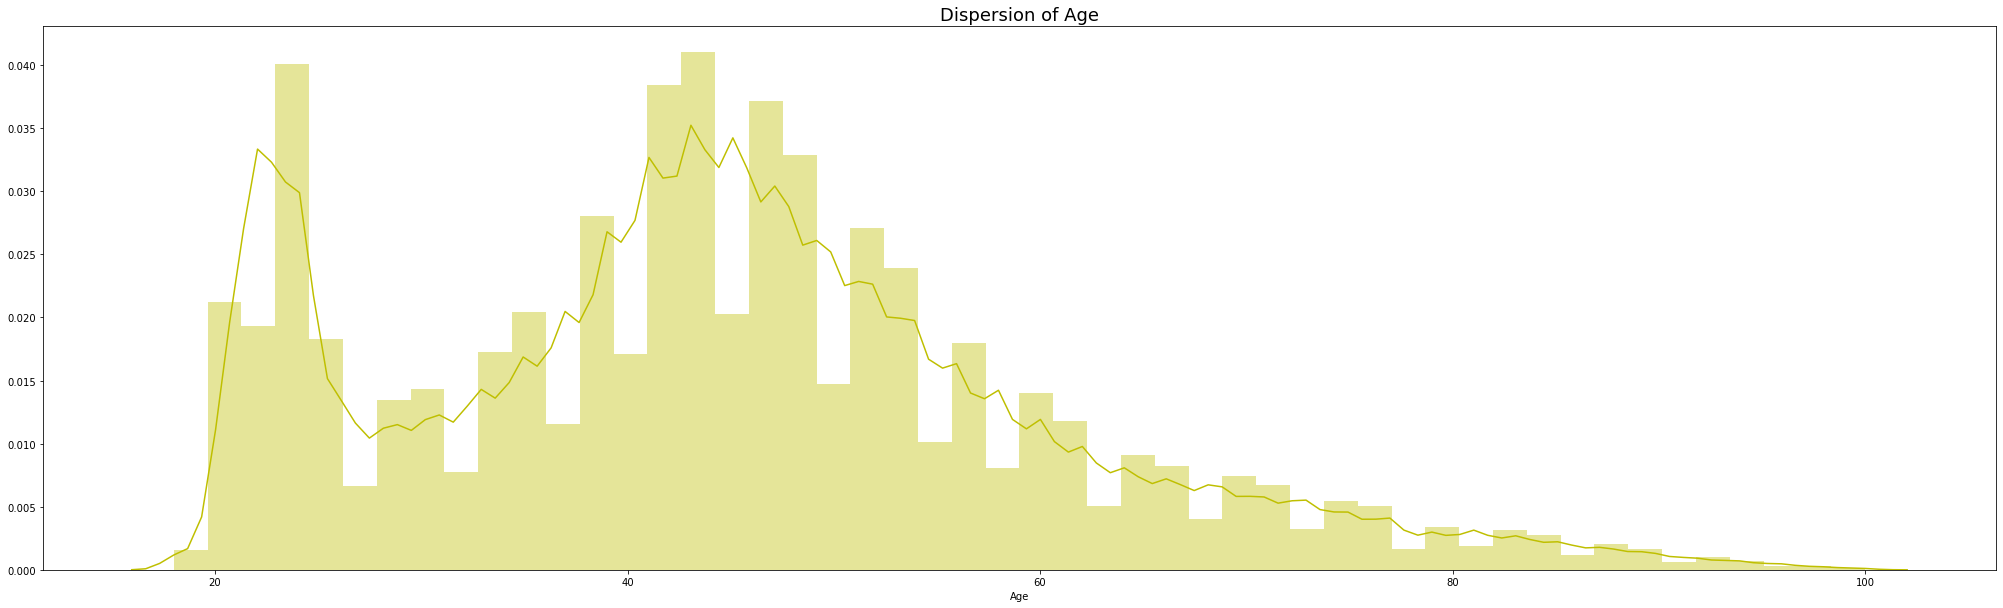

In [37]:
##### Age histogram to show client profile

plt.figure(figsize=(35, 10))
sns.distplot(df.age, axlabel = "Age", color = "y")
plt.title("Dispersion of Age", fontsize = 18)
plt.show()

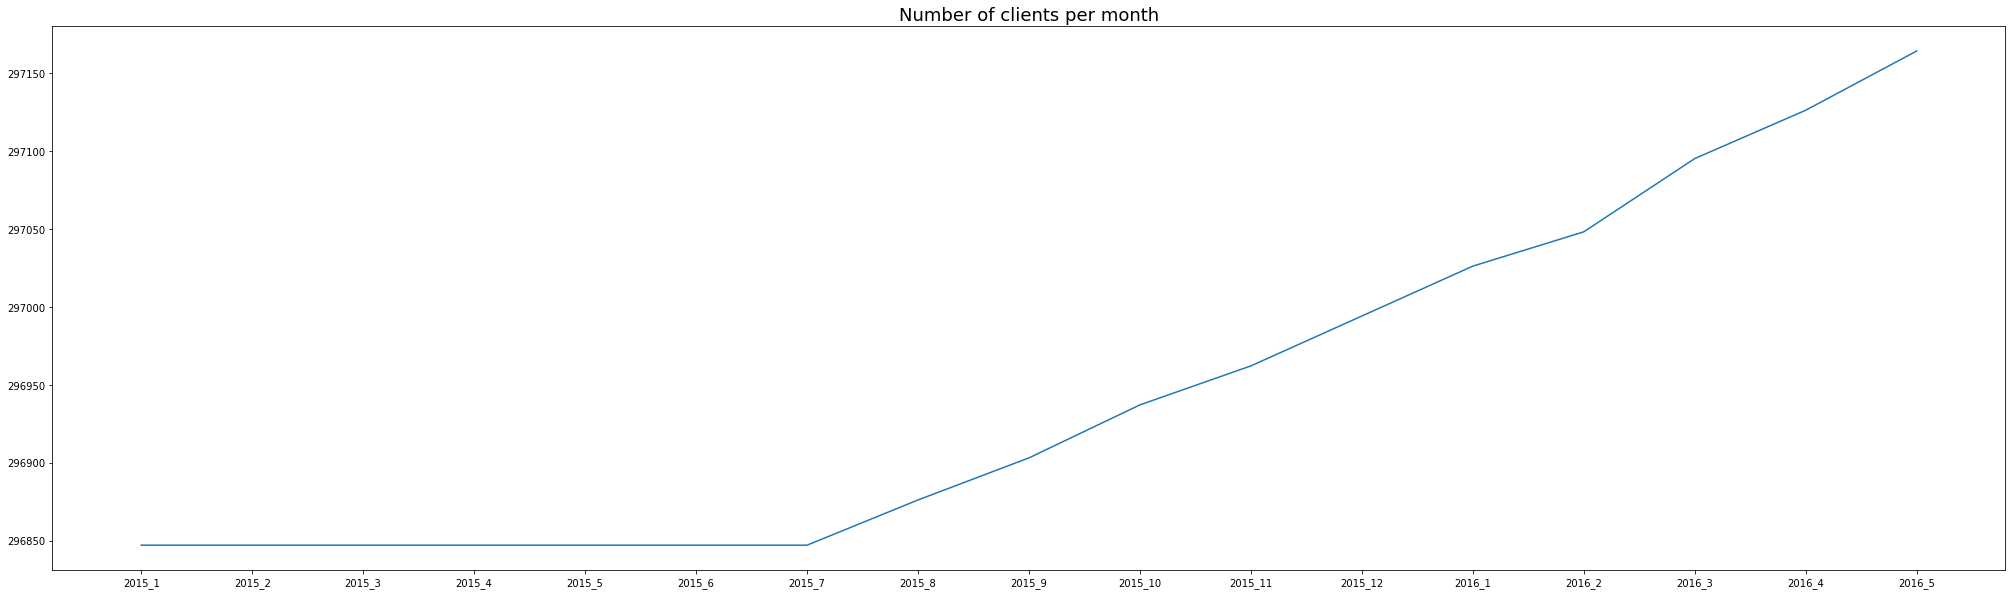

In [152]:
##### Number of clients per month

data = df.groupby(['year_month','ncodpers']).size().reset_index()['year_month'].value_counts()
data_2015_name = [f'2015_{i}' for i in range(1,13)]
data_2015_value = [data.loc[f'2015_{i}'] for i in range(1,13)]
data_2016_name = [f'2016_{i}' for i in range(1,6)]
data_2016_value = [data.loc[f'2016_{i}'] for i in range(1,6)]
data_name = data_2015_name + data_2016_name
data_value = data_2015_value + data_2016_value

plt.figure(figsize=(35, 10))
plot = sns.lineplot(x = data_name, y = data_value, sort = False)
plt.title("Number of clients per month", fontsize = 18)
plt.show()

In [ ]:
df = mr(df, verbose = False)
df.to_pickle('data_modelling_memred.pkl')
print('Done!')